This data only covers england and wales for the police force data

# Importing Relevant Libraries

In [273]:
#import all libraries
library(readr) #for reading csv files
library(dplyr) #for data manipulation
library(ggplot2)    #for plotting
library(tidyr) #to convert data from wide to long format
library(stringr) #to manipulate strings
library(zoo)  #to convert date to month_year
library(moments) #to calculate skewness and kurtosis
library(patchwork) #to combine plots
library(gridExtra) #to combine plots
library(GGally) #to plot correlation matrix
library(corrplot) #to plot correlation matrix




# Data Reading

In [274]:

#set working directory
root_folder <- "C:/Users/user/Documents/Masters - Glous/LECTURES/Data Visualization - R/Assessment/dataset"

In [275]:
# Get a list of all CSV files in subfolders
csv_files <- list.files(path = root_folder, pattern = "\\.csv$", recursive = TRUE, full.names = TRUE)

# Create an empty data frame to store the combined data
combined_data_df<- data.frame()

# Loop through the file paths and read each CSV file
for (file in csv_files) {
  # Read the CSV file
  csv_data <- read.csv(file)

   # Extract the subfolder name
  subfolder <- dirname(file)
  subfolder_name <- basename(subfolder)

  csv_data$subfolder_name <- subfolder_name

  file_name <- basename(file)
  csv_data$file_name <- file_name  #extract file name




  
  # Combine the data with the existing data frame
  combined_data_df <- rbind(combined_data_df, csv_data)
}

In [276]:
head(combined_data_df,5)

,X,Number.of.Homicide.Convictions,Percentage.of.Homicide.Convictions,Number.of.Homicide.Unsuccessful,Percentage.of.Homicide.Unsuccessful,Number.of.Offences.Against.The.Person.Convictions,Percentage.of.Offences.Against.The.Person.Convictions,Number.of.Offences.Against.The.Person.Unsuccessful,Percentage.of.Offences.Against.The.Person.Unsuccessful,Number.of.Sexual.Offences.Convictions,⋯,Number.of.All.Other.Offences..excluding.Motoring..Unsuccessful,Percentage.of.All.Other.Offences..excluding.Motoring..Unsuccessful,Number.of.Motoring.Offences.Convictions,Percentage.of.Motoring.Offences.Convictions,Number.of.Motoring.Offences.Unsuccessful,Percentage.of.Motoring.Offences.Unsuccessful,Number.of.Admin.Finalised.Unsuccessful,Percentage.of.L.Motoring.Offences.Unsuccessful,subfolder_name,file_name
,<chr>,<int>,<chr>,<int>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,⋯,<int>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
1,National,51,82.3%,11,17.7%,"9,087",75.6%,"2,930",24.4%,736,⋯,586,15.1%,"12,945",89.8%,"1,466",10.2%,890,100.0%,2014,201401_principal_offence_category_january_2014.csv
2,Avon and Somerset,0,-,0,-,228,78.6%,62,21.4%,35,⋯,9,12.5%,256,86.5%,40,13.5%,20,100.0%,2014,201401_principal_offence_category_january_2014.csv
3,Bedfordshire,0,0.0%,1,100.0%,68,70.1%,29,29.9%,2,⋯,2,13.3%,171,92.9%,13,7.1%,12,100.0%,2014,201401_principal_offence_category_january_2014.csv
4,Cambridgeshire,0,-,0,-,101,82.8%,21,17.2%,10,⋯,9,24.3%,103,86.6%,16,13.4%,14,100.0%,2014,201401_principal_offence_category_january_2014.csv
5,Cheshire,0,-,0,-,170,81.0%,40,19.0%,15,⋯,5,9.1%,264,94.3%,16,5.7%,13,100.0%,2014,201401_principal_offence_category_january_2014.csv


In [277]:
glimpse(combined_data_df)

Rows: 2,150
Columns: 53
$ X                                                                  <chr> "Na…
$ Number.of.Homicide.Convictions                                     <int> 51,…
$ Percentage.of.Homicide.Convictions                                 <chr> "82…
$ Number.of.Homicide.Unsuccessful                                    <int> 11,…
$ Percentage.of.Homicide.Unsuccessful                                <chr> "17…
$ Number.of.Offences.Against.The.Person.Convictions                  <chr> "9,…
$ Percentage.of.Offences.Against.The.Person.Convictions              <chr> "75…
$ Number.of.Offences.Against.The.Person.Unsuccessful                 <chr> "2,…
$ Percentage.of.Offences.Against.The.Person.Unsuccessful             <chr> "24…
$ Number.of.Sexual.Offences.Convictions                              <chr> "73…
$ Percentage.of.Sexual.Offences.Convictions                          <chr> "72…
$ Number.of.Sexual.Offences.Unsuccessful                             <int> 286…
$ Percentage.of.

In [278]:
dim(combined_data_df)

[1] 2150   53

In [279]:
class(combined_data_df)

[1] "data.frame"

### Adding Date Column to Data

In [280]:
#let us convert the file_name column to lower case before we preprocess it
combined_data_df$file_name <- tolower(combined_data_df$file_name)

In [281]:

combined_data_df$extracted_text <- gsub("^.*category_", "", combined_data_df$file_name)

In [282]:
head(combined_data_df)

,X,Number.of.Homicide.Convictions,Percentage.of.Homicide.Convictions,Number.of.Homicide.Unsuccessful,Percentage.of.Homicide.Unsuccessful,Number.of.Offences.Against.The.Person.Convictions,Percentage.of.Offences.Against.The.Person.Convictions,Number.of.Offences.Against.The.Person.Unsuccessful,Percentage.of.Offences.Against.The.Person.Unsuccessful,Number.of.Sexual.Offences.Convictions,⋯,Percentage.of.All.Other.Offences..excluding.Motoring..Unsuccessful,Number.of.Motoring.Offences.Convictions,Percentage.of.Motoring.Offences.Convictions,Number.of.Motoring.Offences.Unsuccessful,Percentage.of.Motoring.Offences.Unsuccessful,Number.of.Admin.Finalised.Unsuccessful,Percentage.of.L.Motoring.Offences.Unsuccessful,subfolder_name,file_name,extracted_text
,<chr>,<int>,<chr>,<int>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,⋯,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
1,National,51,82.3%,11,17.7%,"9,087",75.6%,"2,930",24.4%,736,⋯,15.1%,"12,945",89.8%,"1,466",10.2%,890,100.0%,2014,201401_principal_offence_category_january_2014.csv,january_2014.csv
2,Avon and Somerset,0,-,0,-,228,78.6%,62,21.4%,35,⋯,12.5%,256,86.5%,40,13.5%,20,100.0%,2014,201401_principal_offence_category_january_2014.csv,january_2014.csv
3,Bedfordshire,0,0.0%,1,100.0%,68,70.1%,29,29.9%,2,⋯,13.3%,171,92.9%,13,7.1%,12,100.0%,2014,201401_principal_offence_category_january_2014.csv,january_2014.csv
4,Cambridgeshire,0,-,0,-,101,82.8%,21,17.2%,10,⋯,24.3%,103,86.6%,16,13.4%,14,100.0%,2014,201401_principal_offence_category_january_2014.csv,january_2014.csv
5,Cheshire,0,-,0,-,170,81.0%,40,19.0%,15,⋯,9.1%,264,94.3%,16,5.7%,13,100.0%,2014,201401_principal_offence_category_january_2014.csv,january_2014.csv
6,Cleveland,2,40.0%,3,60.0%,119,73.0%,44,27.0%,11,⋯,29.2%,228,93.4%,16,6.6%,3,100.0%,2014,201401_principal_offence_category_january_2014.csv,january_2014.csv


In [283]:
#checking the unique entries in the subfolder name - this looks like the year, so let us rename the column to year
cat(paste(unique(combined_data_df$subfolder_name), collapse = "\n"))

2014
2015
2016
2017
2018

In [284]:
#we can see that some file naem contain month in full name and year, while others containg just the abbreviated month name.
cat(paste(unique(combined_data_df$extracted_text), collapse = "\n"))

january_2014.csv
february_2014.csv
march_2014.csv
april_2014.csv
may_2014.csv
june_2014.csv
july_2014.csv
august_2014.csv
september_2014.csv
october_2014.csv
november_2014.csv
december_2014.csv
april_2015.csv
august_2015.csv
december_2015.csv
february_2015.csv
january_2015.csv
july_2015.csv
june_2015.csv
march_2015.csv
may_2015.csv
october_2015.csv
september_2015.csv
april_2016.csv
august_2016.csv
december_2016.csv
january_2016.csv
july_2016.csv
june_2016.csv
may_2016.csv
november_2016.csv
october_2016.csv
september_2016.csv
aug.csv
dec.csv
february_2017.csv
january_2017.csv
jul.csv
march_2017.csv
nov.csv
oct.csv
sep.csv
feb.csv
jan.csv
mar.csv

In [285]:
#let us rename the column to year
combined_data_df <- combined_data_df %>% rename(year = subfolder_name)

In [286]:
head(combined_data_df)

,X,Number.of.Homicide.Convictions,Percentage.of.Homicide.Convictions,Number.of.Homicide.Unsuccessful,Percentage.of.Homicide.Unsuccessful,Number.of.Offences.Against.The.Person.Convictions,Percentage.of.Offences.Against.The.Person.Convictions,Number.of.Offences.Against.The.Person.Unsuccessful,Percentage.of.Offences.Against.The.Person.Unsuccessful,Number.of.Sexual.Offences.Convictions,⋯,Percentage.of.All.Other.Offences..excluding.Motoring..Unsuccessful,Number.of.Motoring.Offences.Convictions,Percentage.of.Motoring.Offences.Convictions,Number.of.Motoring.Offences.Unsuccessful,Percentage.of.Motoring.Offences.Unsuccessful,Number.of.Admin.Finalised.Unsuccessful,Percentage.of.L.Motoring.Offences.Unsuccessful,year,file_name,extracted_text
,<chr>,<int>,<chr>,<int>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,⋯,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
1,National,51,82.3%,11,17.7%,"9,087",75.6%,"2,930",24.4%,736,⋯,15.1%,"12,945",89.8%,"1,466",10.2%,890,100.0%,2014,201401_principal_offence_category_january_2014.csv,january_2014.csv
2,Avon and Somerset,0,-,0,-,228,78.6%,62,21.4%,35,⋯,12.5%,256,86.5%,40,13.5%,20,100.0%,2014,201401_principal_offence_category_january_2014.csv,january_2014.csv
3,Bedfordshire,0,0.0%,1,100.0%,68,70.1%,29,29.9%,2,⋯,13.3%,171,92.9%,13,7.1%,12,100.0%,2014,201401_principal_offence_category_january_2014.csv,january_2014.csv
4,Cambridgeshire,0,-,0,-,101,82.8%,21,17.2%,10,⋯,24.3%,103,86.6%,16,13.4%,14,100.0%,2014,201401_principal_offence_category_january_2014.csv,january_2014.csv
5,Cheshire,0,-,0,-,170,81.0%,40,19.0%,15,⋯,9.1%,264,94.3%,16,5.7%,13,100.0%,2014,201401_principal_offence_category_january_2014.csv,january_2014.csv
6,Cleveland,2,40.0%,3,60.0%,119,73.0%,44,27.0%,11,⋯,29.2%,228,93.4%,16,6.6%,3,100.0%,2014,201401_principal_offence_category_january_2014.csv,january_2014.csv


In [287]:
#let us extract month from extracted_text column
combined_data_df$month <- str_extract(combined_data_df$extracted_text, "[a-z]+")

head(combined_data_df)

,X,Number.of.Homicide.Convictions,Percentage.of.Homicide.Convictions,Number.of.Homicide.Unsuccessful,Percentage.of.Homicide.Unsuccessful,Number.of.Offences.Against.The.Person.Convictions,Percentage.of.Offences.Against.The.Person.Convictions,Number.of.Offences.Against.The.Person.Unsuccessful,Percentage.of.Offences.Against.The.Person.Unsuccessful,Number.of.Sexual.Offences.Convictions,⋯,Number.of.Motoring.Offences.Convictions,Percentage.of.Motoring.Offences.Convictions,Number.of.Motoring.Offences.Unsuccessful,Percentage.of.Motoring.Offences.Unsuccessful,Number.of.Admin.Finalised.Unsuccessful,Percentage.of.L.Motoring.Offences.Unsuccessful,year,file_name,extracted_text,month
,<chr>,<int>,<chr>,<int>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,⋯,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
1,National,51,82.3%,11,17.7%,"9,087",75.6%,"2,930",24.4%,736,⋯,"12,945",89.8%,"1,466",10.2%,890,100.0%,2014,201401_principal_offence_category_january_2014.csv,january_2014.csv,january
2,Avon and Somerset,0,-,0,-,228,78.6%,62,21.4%,35,⋯,256,86.5%,40,13.5%,20,100.0%,2014,201401_principal_offence_category_january_2014.csv,january_2014.csv,january
3,Bedfordshire,0,0.0%,1,100.0%,68,70.1%,29,29.9%,2,⋯,171,92.9%,13,7.1%,12,100.0%,2014,201401_principal_offence_category_january_2014.csv,january_2014.csv,january
4,Cambridgeshire,0,-,0,-,101,82.8%,21,17.2%,10,⋯,103,86.6%,16,13.4%,14,100.0%,2014,201401_principal_offence_category_january_2014.csv,january_2014.csv,january
5,Cheshire,0,-,0,-,170,81.0%,40,19.0%,15,⋯,264,94.3%,16,5.7%,13,100.0%,2014,201401_principal_offence_category_january_2014.csv,january_2014.csv,january
6,Cleveland,2,40.0%,3,60.0%,119,73.0%,44,27.0%,11,⋯,228,93.4%,16,6.6%,3,100.0%,2014,201401_principal_offence_category_january_2014.csv,january_2014.csv,january


In [288]:
cat(paste(unique(combined_data_df$month), collapse = "\n"))

january
february
march
april
may
june
july
august
september
october
november
december
aug
dec
jul
nov
oct
sep
feb
jan
mar

In [289]:
#combine month and year to create a new column
combined_data_df$month_year <- paste(combined_data_df$month, combined_data_df$year, sep = " ")

In [290]:
head(combined_data_df)

,X,Number.of.Homicide.Convictions,Percentage.of.Homicide.Convictions,Number.of.Homicide.Unsuccessful,Percentage.of.Homicide.Unsuccessful,Number.of.Offences.Against.The.Person.Convictions,Percentage.of.Offences.Against.The.Person.Convictions,Number.of.Offences.Against.The.Person.Unsuccessful,Percentage.of.Offences.Against.The.Person.Unsuccessful,Number.of.Sexual.Offences.Convictions,⋯,Percentage.of.Motoring.Offences.Convictions,Number.of.Motoring.Offences.Unsuccessful,Percentage.of.Motoring.Offences.Unsuccessful,Number.of.Admin.Finalised.Unsuccessful,Percentage.of.L.Motoring.Offences.Unsuccessful,year,file_name,extracted_text,month,month_year
,<chr>,<int>,<chr>,<int>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,⋯,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
1,National,51,82.3%,11,17.7%,"9,087",75.6%,"2,930",24.4%,736,⋯,89.8%,"1,466",10.2%,890,100.0%,2014,201401_principal_offence_category_january_2014.csv,january_2014.csv,january,january 2014
2,Avon and Somerset,0,-,0,-,228,78.6%,62,21.4%,35,⋯,86.5%,40,13.5%,20,100.0%,2014,201401_principal_offence_category_january_2014.csv,january_2014.csv,january,january 2014
3,Bedfordshire,0,0.0%,1,100.0%,68,70.1%,29,29.9%,2,⋯,92.9%,13,7.1%,12,100.0%,2014,201401_principal_offence_category_january_2014.csv,january_2014.csv,january,january 2014
4,Cambridgeshire,0,-,0,-,101,82.8%,21,17.2%,10,⋯,86.6%,16,13.4%,14,100.0%,2014,201401_principal_offence_category_january_2014.csv,january_2014.csv,january,january 2014
5,Cheshire,0,-,0,-,170,81.0%,40,19.0%,15,⋯,94.3%,16,5.7%,13,100.0%,2014,201401_principal_offence_category_january_2014.csv,january_2014.csv,january,january 2014
6,Cleveland,2,40.0%,3,60.0%,119,73.0%,44,27.0%,11,⋯,93.4%,16,6.6%,3,100.0%,2014,201401_principal_offence_category_january_2014.csv,january_2014.csv,january,january 2014


In [291]:
#convert month_year to date
combined_data_df$month_year <- as.yearmon(combined_data_df$month_year, format = "%B %Y")

In [292]:
head(combined_data_df)

,X,Number.of.Homicide.Convictions,Percentage.of.Homicide.Convictions,Number.of.Homicide.Unsuccessful,Percentage.of.Homicide.Unsuccessful,Number.of.Offences.Against.The.Person.Convictions,Percentage.of.Offences.Against.The.Person.Convictions,Number.of.Offences.Against.The.Person.Unsuccessful,Percentage.of.Offences.Against.The.Person.Unsuccessful,Number.of.Sexual.Offences.Convictions,⋯,Percentage.of.Motoring.Offences.Convictions,Number.of.Motoring.Offences.Unsuccessful,Percentage.of.Motoring.Offences.Unsuccessful,Number.of.Admin.Finalised.Unsuccessful,Percentage.of.L.Motoring.Offences.Unsuccessful,year,file_name,extracted_text,month,month_year
,<chr>,<int>,<chr>,<int>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,⋯,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<yearmon>
1,National,51,82.3%,11,17.7%,"9,087",75.6%,"2,930",24.4%,736,⋯,89.8%,"1,466",10.2%,890,100.0%,2014,201401_principal_offence_category_january_2014.csv,january_2014.csv,january,Jan 2014
2,Avon and Somerset,0,-,0,-,228,78.6%,62,21.4%,35,⋯,86.5%,40,13.5%,20,100.0%,2014,201401_principal_offence_category_january_2014.csv,january_2014.csv,january,Jan 2014
3,Bedfordshire,0,0.0%,1,100.0%,68,70.1%,29,29.9%,2,⋯,92.9%,13,7.1%,12,100.0%,2014,201401_principal_offence_category_january_2014.csv,january_2014.csv,january,Jan 2014
4,Cambridgeshire,0,-,0,-,101,82.8%,21,17.2%,10,⋯,86.6%,16,13.4%,14,100.0%,2014,201401_principal_offence_category_january_2014.csv,january_2014.csv,january,Jan 2014
5,Cheshire,0,-,0,-,170,81.0%,40,19.0%,15,⋯,94.3%,16,5.7%,13,100.0%,2014,201401_principal_offence_category_january_2014.csv,january_2014.csv,january,Jan 2014
6,Cleveland,2,40.0%,3,60.0%,119,73.0%,44,27.0%,11,⋯,93.4%,16,6.6%,3,100.0%,2014,201401_principal_offence_category_january_2014.csv,january_2014.csv,january,Jan 2014


In [293]:
class(combined_data_df$month_year)

[1] "yearmon"

In [294]:
#date is now in the correct format, let us check the unique entries
cat(paste(unique(combined_data_df$month_year), collapse = "\n"))

Jan 2014
Feb 2014
Mar 2014
Apr 2014
May 2014
Jun 2014
Jul 2014
Aug 2014
Sep 2014
Oct 2014
Nov 2014
Dec 2014
Apr 2015
Aug 2015
Dec 2015
Feb 2015
Jan 2015
Jul 2015
Jun 2015
Mar 2015
May 2015
Oct 2015
Sep 2015
Apr 2016
Aug 2016
Dec 2016
Jan 2016
Jul 2016
Jun 2016
May 2016
Nov 2016
Oct 2016
Sep 2016
Aug 2017
Dec 2017
Feb 2017
Jan 2017
Jul 2017
Mar 2017
Nov 2017
Oct 2017
Sep 2017
Aug 2018
Dec 2018
Feb 2018
Jan 2018
Jul 2018
Mar 2018
Oct 2018
Sep 2018

In [295]:
#function to delete columns from dataframe
delete_columns <- function(df, col_names) {
  df <- df[, !(names(df) %in% col_names)]
  return(df)
}

In [296]:
#let us delete the columns we used for preprocessing date 
preprocess_column <- c('year', 'file_name', 'extracted_text', 'month')

combined_data_df <- delete_columns(combined_data_df, preprocess_column)

In [297]:
head(combined_data_df)

,X,Number.of.Homicide.Convictions,Percentage.of.Homicide.Convictions,Number.of.Homicide.Unsuccessful,Percentage.of.Homicide.Unsuccessful,Number.of.Offences.Against.The.Person.Convictions,Percentage.of.Offences.Against.The.Person.Convictions,Number.of.Offences.Against.The.Person.Unsuccessful,Percentage.of.Offences.Against.The.Person.Unsuccessful,Number.of.Sexual.Offences.Convictions,⋯,Percentage.of.All.Other.Offences..excluding.Motoring..Convictions,Number.of.All.Other.Offences..excluding.Motoring..Unsuccessful,Percentage.of.All.Other.Offences..excluding.Motoring..Unsuccessful,Number.of.Motoring.Offences.Convictions,Percentage.of.Motoring.Offences.Convictions,Number.of.Motoring.Offences.Unsuccessful,Percentage.of.Motoring.Offences.Unsuccessful,Number.of.Admin.Finalised.Unsuccessful,Percentage.of.L.Motoring.Offences.Unsuccessful,month_year
,<chr>,<int>,<chr>,<int>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,⋯,<chr>,<int>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<yearmon>
1,National,51,82.3%,11,17.7%,"9,087",75.6%,"2,930",24.4%,736,⋯,84.9%,586,15.1%,"12,945",89.8%,"1,466",10.2%,890,100.0%,Jan 2014
2,Avon and Somerset,0,-,0,-,228,78.6%,62,21.4%,35,⋯,87.5%,9,12.5%,256,86.5%,40,13.5%,20,100.0%,Jan 2014
3,Bedfordshire,0,0.0%,1,100.0%,68,70.1%,29,29.9%,2,⋯,86.7%,2,13.3%,171,92.9%,13,7.1%,12,100.0%,Jan 2014
4,Cambridgeshire,0,-,0,-,101,82.8%,21,17.2%,10,⋯,75.7%,9,24.3%,103,86.6%,16,13.4%,14,100.0%,Jan 2014
5,Cheshire,0,-,0,-,170,81.0%,40,19.0%,15,⋯,90.9%,5,9.1%,264,94.3%,16,5.7%,13,100.0%,Jan 2014
6,Cleveland,2,40.0%,3,60.0%,119,73.0%,44,27.0%,11,⋯,70.8%,14,29.2%,228,93.4%,16,6.6%,3,100.0%,Jan 2014


In [298]:
dim(combined_data_df)

[1] 2150   52

### Data Frame Description

In [299]:
#let us rename columns to make them more meaningful


In [300]:
cat(paste(names(combined_data_df), collapse = "\n"))


X
Number.of.Homicide.Convictions
Percentage.of.Homicide.Convictions
Number.of.Homicide.Unsuccessful
Percentage.of.Homicide.Unsuccessful
Number.of.Offences.Against.The.Person.Convictions
Percentage.of.Offences.Against.The.Person.Convictions
Number.of.Offences.Against.The.Person.Unsuccessful
Percentage.of.Offences.Against.The.Person.Unsuccessful
Number.of.Sexual.Offences.Convictions
Percentage.of.Sexual.Offences.Convictions
Number.of.Sexual.Offences.Unsuccessful
Percentage.of.Sexual.Offences.Unsuccessful
Number.of.Burglary.Convictions
Percentage.of.Burglary.Convictions
Number.of.Burglary.Unsuccessful
Percentage.of.Burglary.Unsuccessful
Number.of.Robbery.Convictions
Percentage.of.Robbery.Convictions
Number.of.Robbery.Unsuccessful
Percentage.of.Robbery.Unsuccessful
Number.of.Theft.And.Handling.Convictions
Percentage.of.Theft.And.Handling.Convictions
Number.of.Theft.And.Handling.Unsuccessful
Percentage.of.Theft.And.Handling.Unsuccessful
Number.of.Fraud.And.Forgery.Convictions
Percentage.of.

In [301]:
new_col_name = c('police_area', 'homicide_conviction', 'percent_homicide_conviction', 'homicide_unsuccessful', 'percent_homicide_unsuccessful', 
'offence_against_person_conviction', 'percent_offence_against_person_conviction', 'offence_against_person_unsuccessful', 'percent_offence_against_person_unsuccessful', 
'sexual_offence_conviction', 'percent_sexual_offence_conviction', 'sexual_offence_unsuccessful', 'percent_sexual_offence_unsuccessful', 
'burglary_conviction', 'percent_burglary_conviction', 'burglary_unsuccessful', 'percent_burglary_unsuccessful', 
'robbery_conviction', 'percent_robbery_conviction', 'robbery_unsuccessful', 'percent_robbery_unsuccessful', 
'theft_conviction', 'percent_theft_conviction', 'theft_unsuccessful', 'percent_theft_unsuccessful', 
'fraud_conviction', 'percent_fraud_conviction', 'fraud_unsuccessful', 'percent_fraud_unsuccessful', 
'criminal_damage_conviction', 'percent_criminal_damage_conviction', 'criminal_damage_unsuccessful', 'percent_criminal_damage_unsuccessful', 
'drug_conviction', 'percent_drug_conviction', 'drug_unsuccessful', 'percent_drug_unsuccessful', 
'public_order_conviction', 'percent_public_order_conviction', 'public_order_unsuccessful', 'percent_public_order_unsuccessful', 
'others_conviction', 'percent_others_conviction', 'others_unsuccessful', 'percent_others_unsuccessful', 
'motoring_conviction', 'percent_motoring_conviction', 'motoring_unsuccessful', 'percent_motoring_unsuccessful', 
'admin_finalised_unsuccessful', 'percent_L_motoring_unsuccessful', 'date')

names(combined_data_df) <- new_col_name


In [302]:
#let us check the column names
cat(paste(names(combined_data_df), collapse = "\n"))

police_area
homicide_conviction
percent_homicide_conviction
homicide_unsuccessful
percent_homicide_unsuccessful
offence_against_person_conviction
percent_offence_against_person_conviction
offence_against_person_unsuccessful
percent_offence_against_person_unsuccessful
sexual_offence_conviction
percent_sexual_offence_conviction
sexual_offence_unsuccessful
percent_sexual_offence_unsuccessful
burglary_conviction
percent_burglary_conviction
burglary_unsuccessful
percent_burglary_unsuccessful
robbery_conviction
percent_robbery_conviction
robbery_unsuccessful
percent_robbery_unsuccessful
theft_conviction
percent_theft_conviction
theft_unsuccessful
percent_theft_unsuccessful
fraud_conviction
percent_fraud_conviction
fraud_unsuccessful
percent_fraud_unsuccessful
criminal_damage_conviction
percent_criminal_damage_conviction
criminal_damage_unsuccessful
percent_criminal_damage_unsuccessful
drug_conviction
percent_drug_conviction
drug_unsuccessful
percent_drug_unsuccessful
public_order_conviction


In [303]:
head(combined_data_df)

,police_area,homicide_conviction,percent_homicide_conviction,homicide_unsuccessful,percent_homicide_unsuccessful,offence_against_person_conviction,percent_offence_against_person_conviction,offence_against_person_unsuccessful,percent_offence_against_person_unsuccessful,sexual_offence_conviction,⋯,percent_others_conviction,others_unsuccessful,percent_others_unsuccessful,motoring_conviction,percent_motoring_conviction,motoring_unsuccessful,percent_motoring_unsuccessful,admin_finalised_unsuccessful,percent_L_motoring_unsuccessful,date
,<chr>,<int>,<chr>,<int>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,⋯,<chr>,<int>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<yearmon>
1,National,51,82.3%,11,17.7%,"9,087",75.6%,"2,930",24.4%,736,⋯,84.9%,586,15.1%,"12,945",89.8%,"1,466",10.2%,890,100.0%,Jan 2014
2,Avon and Somerset,0,-,0,-,228,78.6%,62,21.4%,35,⋯,87.5%,9,12.5%,256,86.5%,40,13.5%,20,100.0%,Jan 2014
3,Bedfordshire,0,0.0%,1,100.0%,68,70.1%,29,29.9%,2,⋯,86.7%,2,13.3%,171,92.9%,13,7.1%,12,100.0%,Jan 2014
4,Cambridgeshire,0,-,0,-,101,82.8%,21,17.2%,10,⋯,75.7%,9,24.3%,103,86.6%,16,13.4%,14,100.0%,Jan 2014
5,Cheshire,0,-,0,-,170,81.0%,40,19.0%,15,⋯,90.9%,5,9.1%,264,94.3%,16,5.7%,13,100.0%,Jan 2014
6,Cleveland,2,40.0%,3,60.0%,119,73.0%,44,27.0%,11,⋯,70.8%,14,29.2%,228,93.4%,16,6.6%,3,100.0%,Jan 2014


In [304]:
#let us check the data types
str(combined_data_df)

'data.frame':	2150 obs. of  52 variables:
 $ police_area                                : chr  "National" "Avon and Somerset" "Bedfordshire" "Cambridgeshire" ...
 $ homicide_conviction                        : int  51 0 0 0 0 2 0 0 0 0 ...
 $ percent_homicide_conviction                : chr  "82.3%" "-" "0.0%" "-" ...
 $ homicide_unsuccessful                      : int  11 0 1 0 0 3 0 1 0 0 ...
 $ percent_homicide_unsuccessful              : chr  "17.7%" "-" "100.0%" "-" ...
 $ offence_against_person_conviction          : chr  "9,087" "228" "68" "101" ...
 $ percent_offence_against_person_conviction  : chr  "75.6%" "78.6%" "70.1%" "82.8%" ...
 $ offence_against_person_unsuccessful        : chr  "2,930" "62" "29" "21" ...
 $ percent_offence_against_person_unsuccessful: chr  "24.4%" "21.4%" "29.9%" "17.2%" ...
 $ sexual_offence_conviction                  : chr  "736" "35" "2" "10" ...
 $ percent_sexual_offence_conviction          : chr  "72.0%" "67.3%" "66.7%" "76.9%" ...
 $ sexual_offe

We see that some columns that should be integer and float data type are chr. Let us verify why?



Taking one at random and checking the unique values in ascending order:


In [305]:
#It seems the numbers that are in their thousands are represented as 1,000. Let us remove the comma and convert them to numeric
cat(paste(sort(unique(combined_data_df$offence_against_person_conviction)), collapse = "\n"))

1,092
1,126
1,129
1,224
1,230
1,245
1,252
1,256
1,262
1,266
1,279
1,281
1,295
1,306
1,322
1,325
1,327
1,331
1,363
1,373
1,382
1,421
1,426
1,454
1,455
1,461
1,530
1,562
1,612
1,619
1,625
1,697
1,703
1,704
1,713
1,715
1,732
1,788
1,795
1,802
1,804
1,814
1,827
1,904
10,056
10,140
10,147
10,276
10,282
10,309
10,314
10,343
10,349
10,394
10,524
10,719
10,720
10,769
10,803
10,958
100
101
102
103
104
105
106
107
108
109
11,080
11,278
11,455
11,595
11,741
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
2

In [306]:
#let us check for a percent column also
#here, the % is part of the entries, hence making it a string. Let us remove the % and convert to numeric
cat(paste(sort(unique(combined_data_df$percent_offence_against_person_conviction)), collapse = "\n"))

55.1%
59.1%
60.2%
62.1%
62.7%
63.0%
63.1%
63.4%
63.8%
64.2%
64.3%
64.4%
64.5%
64.8%
64.9%
65.2%
65.3%
65.4%
65.5%
65.7%
66.0%
66.1%
66.2%
66.3%
66.4%
66.6%
66.7%
66.8%
67.2%
67.4%
67.5%
67.6%
67.7%
67.8%
67.9%
68.0%
68.1%
68.3%
68.4%
68.6%
68.7%
68.8%
68.9%
69.0%
69.1%
69.2%
69.3%
69.4%
69.5%
69.6%
69.7%
69.8%
69.9%
70.0%
70.1%
70.2%
70.3%
70.4%
70.5%
70.6%
70.7%
70.8%
70.9%
71.0%
71.1%
71.2%
71.3%
71.4%
71.5%
71.6%
71.7%
71.8%
71.9%
72.0%
72.1%
72.2%
72.3%
72.4%
72.5%
72.6%
72.7%
72.8%
72.9%
73.0%
73.1%
73.2%
73.3%
73.4%
73.5%
73.6%
73.7%
73.8%
73.9%
74.0%
74.1%
74.2%
74.3%
74.4%
74.5%
74.6%
74.7%
74.8%
74.9%
75.0%
75.1%
75.2%
75.3%
75.4%
75.5%
75.6%
75.7%
75.8%
75.9%
76.0%
76.1%
76.2%
76.3%
76.4%
76.5%
76.6%
76.7%
76.8%
76.9%
77.0%
77.1%
77.2%
77.3%
77.4%
77.5%
77.6%
77.7%
77.8%
77.9%
78.0%
78.1%
78.2%
78.3%
78.4%
78.5%
78.6%
78.7%
78.8%
78.9%
79.0%
79.1%
79.2%
79.3%
79.4%
79.5%
79.6%
79.7%
79.8%
79.9%
80.0%
80.1%
80.2%
80.3%
80.4%
80.5%
80.6%
80.7%
80.8%
80.9%
81.0%
81.1%
81.2%
81.3

In [307]:
#let us convert all conviction and unsuccessful columns to numeric
# and percentages to float

for (col_name in colnames(combined_data_df)) {
  if (grepl("conviction", col_name) | grepl("unsuccessful", col_name)) {
    combined_data_df[[col_name]] <- gsub("[^0-9.]","", combined_data_df[[col_name]])
   
    if (!grepl("percent", col_name)) {
      #combined_data_df[[col_name]] <- gsub(",","", combined_data_df[[col_name]])
      combined_data_df[[col_name]] <- as.integer(combined_data_df[[col_name]])

      #print(col_name)

    }
    else{
        #combined_data_df[[col_name]] <- gsub("%","",combined_data_df[[col_name]])
        combined_data_df[[col_name]] <- as.numeric(combined_data_df[[col_name]])

        #print(paste(col_name, "percent"))
    }
  }
}


In [308]:
head(combined_data_df)

,police_area,homicide_conviction,percent_homicide_conviction,homicide_unsuccessful,percent_homicide_unsuccessful,offence_against_person_conviction,percent_offence_against_person_conviction,offence_against_person_unsuccessful,percent_offence_against_person_unsuccessful,sexual_offence_conviction,⋯,percent_others_conviction,others_unsuccessful,percent_others_unsuccessful,motoring_conviction,percent_motoring_conviction,motoring_unsuccessful,percent_motoring_unsuccessful,admin_finalised_unsuccessful,percent_L_motoring_unsuccessful,date
,<chr>,<int>,<dbl>,<int>,<dbl>,<int>,<dbl>,<int>,<dbl>,<int>,⋯,<dbl>,<int>,<dbl>,<int>,<dbl>,<int>,<dbl>,<int>,<dbl>,<yearmon>
1,National,51,82.3,11,17.7,9087,75.6,2930,24.4,736,⋯,84.9,586,15.1,12945,89.8,1466,10.2,890,100,Jan 2014
2,Avon and Somerset,0,NA,0,NA,228,78.6,62,21.4,35,⋯,87.5,9,12.5,256,86.5,40,13.5,20,100,Jan 2014
3,Bedfordshire,0,0.0,1,100.0,68,70.1,29,29.9,2,⋯,86.7,2,13.3,171,92.9,13,7.1,12,100,Jan 2014
4,Cambridgeshire,0,NA,0,NA,101,82.8,21,17.2,10,⋯,75.7,9,24.3,103,86.6,16,13.4,14,100,Jan 2014
5,Cheshire,0,NA,0,NA,170,81.0,40,19.0,15,⋯,90.9,5,9.1,264,94.3,16,5.7,13,100,Jan 2014
6,Cleveland,2,40.0,3,60.0,119,73.0,44,27.0,11,⋯,70.8,14,29.2,228,93.4,16,6.6,3,100,Jan 2014


In [309]:
#let us create a function to sum to total number of each crime category (i.e. conviction + unsuccessful)
sum_crime <- function(df, crime) {
  #df <- df %>% mutate(total = get(paste0(crime, "_conviction")) + get(paste0(crime, "_unsuccessful")))
  df <- df %>% mutate(!!paste0(crime, "_total") := get(paste0(crime, "_conviction")) + get(paste0(crime, "_unsuccessful")))

  #return(df)
}

In [310]:
#now call the function for each of the crime category

crime_list <- c("homicide", "offence_against_person", "sexual_offence", "burglary", "robbery", "theft", "fraud", "criminal_damage", "drug", "public_order", "others", "motoring")

for (crime in crime_list) {
  combined_data_df <- sum_crime(combined_data_df, crime)

  #print(crime)
}


In [311]:
head(combined_data_df)

,police_area,homicide_conviction,percent_homicide_conviction,homicide_unsuccessful,percent_homicide_unsuccessful,offence_against_person_conviction,percent_offence_against_person_conviction,offence_against_person_unsuccessful,percent_offence_against_person_unsuccessful,sexual_offence_conviction,⋯,sexual_offence_total,burglary_total,robbery_total,theft_total,fraud_total,criminal_damage_total,drug_total,public_order_total,others_total,motoring_total
,<chr>,<int>,<dbl>,<int>,<dbl>,<int>,<dbl>,<int>,<dbl>,<int>,⋯,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
1,National,51,82.3,11,17.7,9087,75.6,2930,24.4,736,⋯,1022,1999,661,12055,983,3165,5293,5549,3877,14411
2,Avon and Somerset,0,NA,0,NA,228,78.6,62,21.4,35,⋯,52,50,8,370,18,107,152,151,72,296
3,Bedfordshire,0,0.0,1,100.0,68,70.1,29,29.9,2,⋯,3,11,23,79,20,30,34,39,15,184
4,Cambridgeshire,0,NA,0,NA,101,82.8,21,17.2,10,⋯,13,22,10,163,14,33,48,39,37,119
5,Cheshire,0,NA,0,NA,170,81.0,40,19.0,15,⋯,16,43,10,210,15,42,67,85,55,280
6,Cleveland,2,40.0,3,60.0,119,73.0,44,27.0,11,⋯,17,38,5,365,14,59,67,150,48,244


In [312]:
cat(paste(names(combined_data_df), collapse = "\n"))

police_area
homicide_conviction
percent_homicide_conviction
homicide_unsuccessful
percent_homicide_unsuccessful
offence_against_person_conviction
percent_offence_against_person_conviction
offence_against_person_unsuccessful
percent_offence_against_person_unsuccessful
sexual_offence_conviction
percent_sexual_offence_conviction
sexual_offence_unsuccessful
percent_sexual_offence_unsuccessful
burglary_conviction
percent_burglary_conviction
burglary_unsuccessful
percent_burglary_unsuccessful
robbery_conviction
percent_robbery_conviction
robbery_unsuccessful
percent_robbery_unsuccessful
theft_conviction
percent_theft_conviction
theft_unsuccessful
percent_theft_unsuccessful
fraud_conviction
percent_fraud_conviction
fraud_unsuccessful
percent_fraud_unsuccessful
criminal_damage_conviction
percent_criminal_damage_conviction
criminal_damage_unsuccessful
percent_criminal_damage_unsuccessful
drug_conviction
percent_drug_conviction
drug_unsuccessful
percent_drug_unsuccessful
public_order_conviction


In [313]:
#let us see the structure of the data
str(combined_data_df)

'data.frame':	2150 obs. of  64 variables:
 $ police_area                                : chr  "National" "Avon and Somerset" "Bedfordshire" "Cambridgeshire" ...
 $ homicide_conviction                        : int  51 0 0 0 0 2 0 0 0 0 ...
 $ percent_homicide_conviction                : num  82.3 NA 0 NA NA 40 NA 0 NA NA ...
 $ homicide_unsuccessful                      : int  11 0 1 0 0 3 0 1 0 0 ...
 $ percent_homicide_unsuccessful              : num  17.7 NA 100 NA NA 60 NA 100 NA NA ...
 $ offence_against_person_conviction          : int  9087 228 68 101 170 119 113 135 220 87 ...
 $ percent_offence_against_person_conviction  : num  75.6 78.6 70.1 82.8 81 73 89.7 69.9 77.5 75 ...
 $ offence_against_person_unsuccessful        : int  2930 62 29 21 40 44 13 58 64 29 ...
 $ percent_offence_against_person_unsuccessful: num  24.4 21.4 29.9 17.2 19 27 10.3 30.1 22.5 25 ...
 $ sexual_offence_conviction                  : int  736 35 2 10 15 11 4 22 16 6 ...
 $ percent_sexual_offence_convic

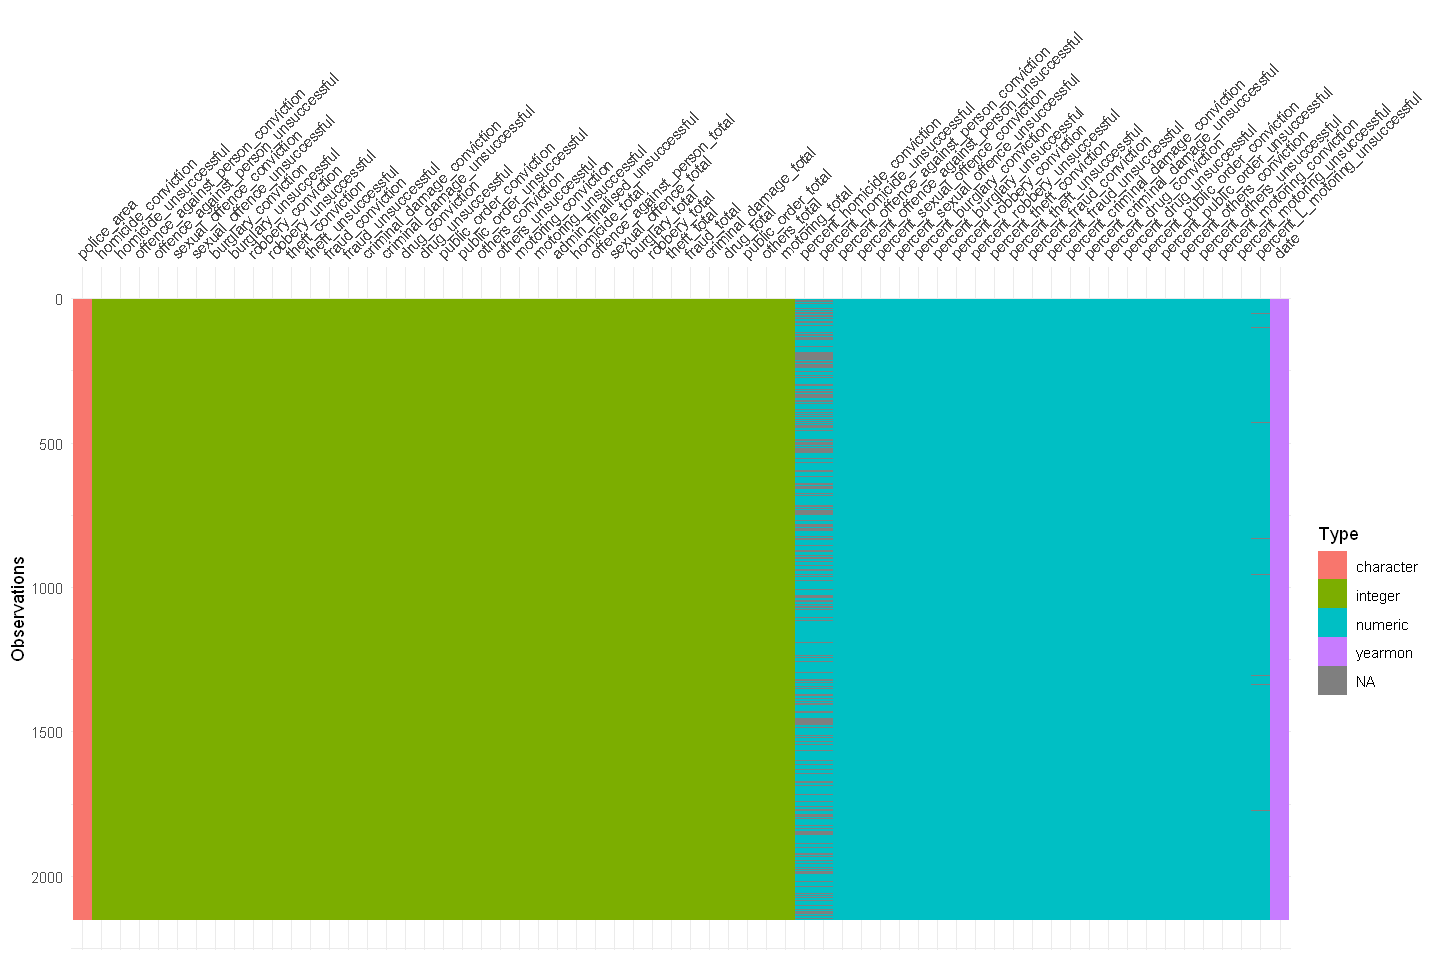

In [314]:
visdat::vis_dat(combined_data_df)

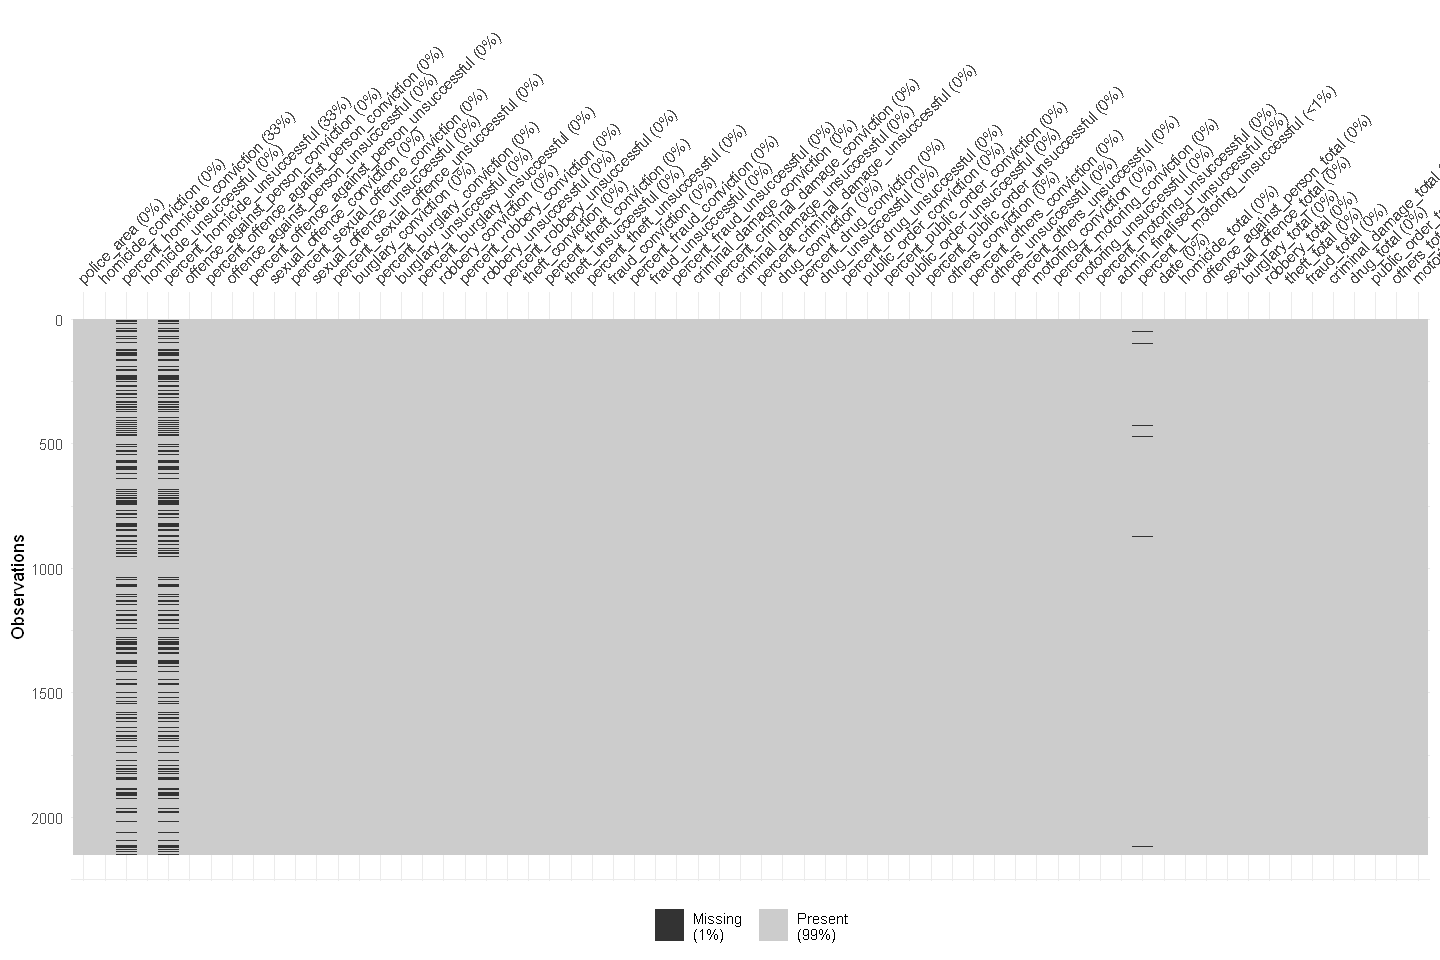

In [315]:
visdat::vis_miss(combined_data_df)

In [316]:
#we see that 99% of our data has entries. with one missing. let us see which columns have the missing values and the number 

In [317]:
#let us check for missing values

missing_data <- function(df) {

    missing_data <- data.frame()

    for (col_name in colnames(df)) {
      missing_data <- rbind(missing_data, data.frame(col_name = col_name, missing_count = sum(is.na(df[[col_name]])), percent_missing = sum(is.na(df[[col_name]]))/nrow(df)*100))
    }

    missing_data <- missing_data[order(missing_data$missing_count, decreasing = TRUE), ]

    return(missing_data)
}

missing_data(combined_data_df)

,col_name,missing_count,percent_missing
,<chr>,<int>,<dbl>
3,percent_homicide_conviction,699,32.511628
5,percent_homicide_unsuccessful,699,32.511628
51,percent_L_motoring_unsuccessful,16,0.744186
1,police_area,0,0.000000
2,homicide_conviction,0,0.000000
4,homicide_unsuccessful,0,0.000000
6,offence_against_person_conviction,0,0.000000
7,percent_offence_against_person_conviction,0,0.000000
8,offence_against_person_unsuccessful,0,0.000000


In [318]:
#we have 3 columns with empty values. Let us check the rows with missing values

combined_data_df[is.na(combined_data_df$percent_homicide_conviction), ]

,police_area,homicide_conviction,percent_homicide_conviction,homicide_unsuccessful,percent_homicide_unsuccessful,offence_against_person_conviction,percent_offence_against_person_conviction,offence_against_person_unsuccessful,percent_offence_against_person_unsuccessful,sexual_offence_conviction,⋯,sexual_offence_total,burglary_total,robbery_total,theft_total,fraud_total,criminal_damage_total,drug_total,public_order_total,others_total,motoring_total
,<chr>,<int>,<dbl>,<int>,<dbl>,<int>,<dbl>,<int>,<dbl>,<int>,⋯,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
2,Avon and Somerset,0,NA,0,NA,228,78.6,62,21.4,35,⋯,52,50,8,370,18,107,152,151,72,296
4,Cambridgeshire,0,NA,0,NA,101,82.8,21,17.2,10,⋯,13,22,10,163,14,33,48,39,37,119
5,Cheshire,0,NA,0,NA,170,81.0,40,19.0,15,⋯,16,43,10,210,15,42,67,85,55,280
7,Cumbria,0,NA,0,NA,113,89.7,13,10.3,4,⋯,7,16,1,122,6,41,53,80,57,119
9,Devon and Cornwall,0,NA,0,NA,220,77.5,64,22.5,16,⋯,19,29,10,222,20,83,101,94,89,441
10,Dorset,0,NA,0,NA,87,75.0,29,25.0,6,⋯,13,21,6,101,4,34,52,50,75,127
12,Dyfed Powys,0,NA,0,NA,69,82.1,15,17.9,4,⋯,7,9,6,87,4,32,87,88,20,291
14,Gloucestershire,0,NA,0,NA,71,82.6,15,17.4,4,⋯,5,21,4,89,10,18,33,26,6,104
16,Gwent,0,NA,0,NA,85,71.4,34,28.6,5,⋯,5,13,4,142,5,42,52,85,25,137


In [319]:
#we see that for the homicide percent, the missing value is a result of a divide by 0 error. Let us replace it with 0

#let us check for other missing percent values

combined_data_df[is.na(combined_data_df$percent_homicide_unsuccessful), ]

,police_area,homicide_conviction,percent_homicide_conviction,homicide_unsuccessful,percent_homicide_unsuccessful,offence_against_person_conviction,percent_offence_against_person_conviction,offence_against_person_unsuccessful,percent_offence_against_person_unsuccessful,sexual_offence_conviction,⋯,sexual_offence_total,burglary_total,robbery_total,theft_total,fraud_total,criminal_damage_total,drug_total,public_order_total,others_total,motoring_total
,<chr>,<int>,<dbl>,<int>,<dbl>,<int>,<dbl>,<int>,<dbl>,<int>,⋯,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
2,Avon and Somerset,0,NA,0,NA,228,78.6,62,21.4,35,⋯,52,50,8,370,18,107,152,151,72,296
4,Cambridgeshire,0,NA,0,NA,101,82.8,21,17.2,10,⋯,13,22,10,163,14,33,48,39,37,119
5,Cheshire,0,NA,0,NA,170,81.0,40,19.0,15,⋯,16,43,10,210,15,42,67,85,55,280
7,Cumbria,0,NA,0,NA,113,89.7,13,10.3,4,⋯,7,16,1,122,6,41,53,80,57,119
9,Devon and Cornwall,0,NA,0,NA,220,77.5,64,22.5,16,⋯,19,29,10,222,20,83,101,94,89,441
10,Dorset,0,NA,0,NA,87,75.0,29,25.0,6,⋯,13,21,6,101,4,34,52,50,75,127
12,Dyfed Powys,0,NA,0,NA,69,82.1,15,17.9,4,⋯,7,9,6,87,4,32,87,88,20,291
14,Gloucestershire,0,NA,0,NA,71,82.6,15,17.4,4,⋯,5,21,4,89,10,18,33,26,6,104
16,Gwent,0,NA,0,NA,85,71.4,34,28.6,5,⋯,5,13,4,142,5,42,52,85,25,137


In [320]:
combined_data_df[is.na(combined_data_df$percent_L_motoring_unsuccessful), ]

,police_area,homicide_conviction,percent_homicide_conviction,homicide_unsuccessful,percent_homicide_unsuccessful,offence_against_person_conviction,percent_offence_against_person_conviction,offence_against_person_unsuccessful,percent_offence_against_person_unsuccessful,sexual_offence_conviction,⋯,sexual_offence_total,burglary_total,robbery_total,theft_total,fraud_total,criminal_damage_total,drug_total,public_order_total,others_total,motoring_total
,<chr>,<int>,<dbl>,<int>,<dbl>,<int>,<dbl>,<int>,<dbl>,<int>,⋯,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
49,Cleveland,0,NA,0,NA,102,73.4,37,26.6,16,⋯,25,40,13,291,12,76,73,125,27,117
97,Durham,1,100,0,0,88,73.3,32,26.7,12,⋯,17,34,5,175,8,56,23,72,17,85
120,Staffordshire,0,0,1,100,192,73.3,70,26.7,15,⋯,17,29,6,238,8,58,87,134,51,292
140,Durham,2,100,0,0,75,74.3,26,25.7,11,⋯,15,30,1,163,9,50,21,71,15,69
168,Warwickshire,0,NA,0,NA,35,76.1,11,23.9,7,⋯,8,10,1,79,1,12,19,19,35,170
426,Warwickshire,1,100,0,0,76,76.8,23,23.2,6,⋯,8,26,3,97,8,15,17,31,24,97
470,West Mercia,0,0,3,100,131,80.4,32,19.6,27,⋯,31,21,6,166,9,39,56,53,26,179
479,Cleveland,2,100,0,0,104,73.8,37,26.2,12,⋯,15,28,12,279,6,56,44,131,30,86
484,Durham,0,NA,0,NA,120,81.6,27,18.4,10,⋯,13,33,0,133,5,42,25,55,17,67


In [321]:
#let us replace all missing values in any percent column with 0

combined_data_df <- combined_data_df %>%
  mutate_at(vars(contains("percent")), ~replace_na(., 0))

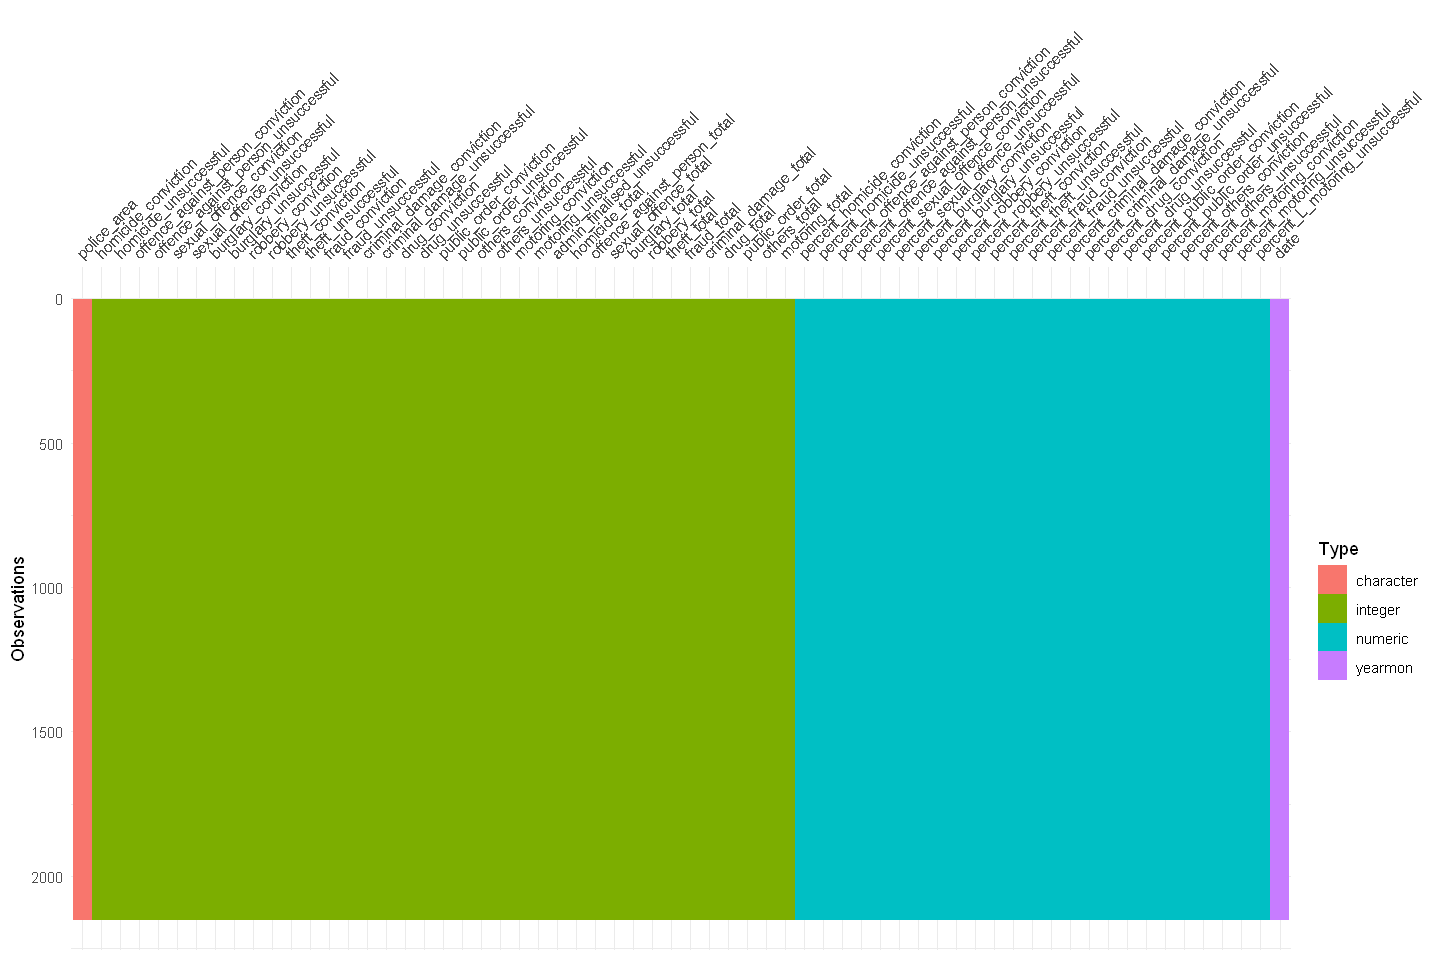

In [322]:
visdat::vis_dat(combined_data_df)

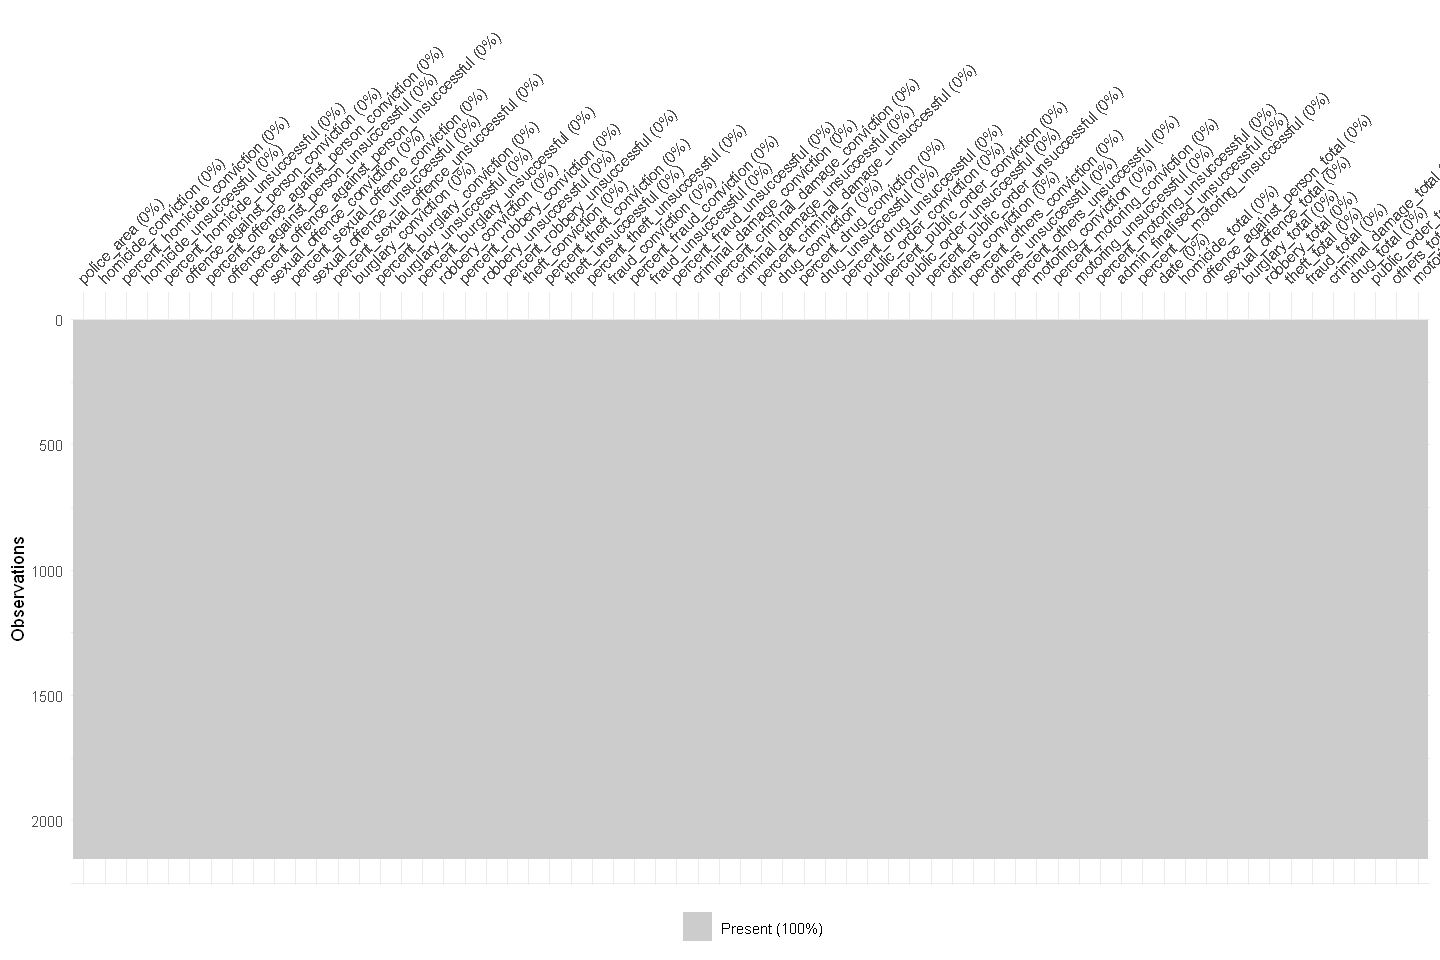

In [323]:
visdat::vis_miss(combined_data_df)

In [324]:
#no more missing values

head(missing_data(combined_data_df))

,col_name,missing_count,percent_missing
,<chr>,<int>,<dbl>
1,police_area,0,0
2,homicide_conviction,0,0
3,percent_homicide_conviction,0,0
4,homicide_unsuccessful,0,0
5,percent_homicide_unsuccessful,0,0
6,offence_against_person_conviction,0,0


In [325]:
#let us now consider categorical variables for possible inconsistencies

#let us check all categorical columns
cat_columns <- names(combined_data_df)[!sapply(combined_data_df, is.numeric)]

cat_columns

[1] "police_area" "date"

In [326]:
#only police_area and date is categorical.

# let us analyze date column

In [327]:
unique(combined_data_df$date)

 [1] "Jan 2014" "Feb 2014" "Mar 2014" "Apr 2014" "May 2014" "Jun 2014"
 [7] "Jul 2014" "Aug 2014" "Sep 2014" "Oct 2014" "Nov 2014" "Dec 2014"
[13] "Apr 2015" "Aug 2015" "Dec 2015" "Feb 2015" "Jan 2015" "Jul 2015"
[19] "Jun 2015" "Mar 2015" "May 2015" "Oct 2015" "Sep 2015" "Apr 2016"
[25] "Aug 2016" "Dec 2016" "Jan 2016" "Jul 2016" "Jun 2016" "May 2016"
[31] "Nov 2016" "Oct 2016" "Sep 2016" "Aug 2017" "Dec 2017" "Feb 2017"
[37] "Jan 2017" "Jul 2017" "Mar 2017" "Nov 2017" "Oct 2017" "Sep 2017"
[43] "Aug 2018" "Dec 2018" "Feb 2018" "Jan 2018" "Jul 2018" "Mar 2018"
[49] "Oct 2018" "Sep 2018"

In [328]:
#everythig looks good here

In [329]:
#let us analyze police_area column

cat(paste(unique(combined_data_df$police_area), collapse = "\n"))

National
Avon and Somerset
Bedfordshire
Cambridgeshire
Cheshire
Cleveland
Cumbria
Derbyshire
Devon and Cornwall
Dorset
Durham
Dyfed Powys
Essex
Gloucestershire
GreaterManchester
Gwent
Hampshire
Hertfordshire
Humberside
Kent
Lancashire
Leicestershire
Lincolnshire
Merseyside
Metropolitan and City
Norfolk
Northamptonshire
Northumbria
North Wales
North Yorkshire
Nottinghamshire
South Wales
South Yorkshire
Staffordshire
Suffolk
Surrey
Sussex
Thames Valley
Warwickshire
West Mercia
West Midlands
West Yorkshire
Wiltshire

In [330]:
#add a space in GreaterManchester

combined_data_df$police_area <- gsub("GreaterManchester", "Greater Manchester", combined_data_df$police_area)

In [331]:

#now let us convert police_area to lower case

combined_data_df$police_area <- tolower(combined_data_df$police_area)

In [332]:
#let us check the count of all unique police_area

length(unique(combined_data_df$police_area))

[1] 43

In [333]:
#we have only 42 police areas, but there, we see 43. Taking a close look, we have national, which is a national summary of all the areas. Let us delete this row
#let us delete the national row as this is a summary of all the counties for each month

combined_data_df <- combined_data_df %>% filter(police_area != "national")

In [334]:
#let us check the count of all unique counties

length(unique(combined_data_df$police_area))

[1] 42

In [335]:
dim(combined_data_df)

[1] 2100   64

In [336]:
head(combined_data_df)

,police_area,homicide_conviction,percent_homicide_conviction,homicide_unsuccessful,percent_homicide_unsuccessful,offence_against_person_conviction,percent_offence_against_person_conviction,offence_against_person_unsuccessful,percent_offence_against_person_unsuccessful,sexual_offence_conviction,⋯,sexual_offence_total,burglary_total,robbery_total,theft_total,fraud_total,criminal_damage_total,drug_total,public_order_total,others_total,motoring_total
,<chr>,<int>,<dbl>,<int>,<dbl>,<int>,<dbl>,<int>,<dbl>,<int>,⋯,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
1,avon and somerset,0,0,0,0,228,78.6,62,21.4,35,⋯,52,50,8,370,18,107,152,151,72,296
2,bedfordshire,0,0,1,100,68,70.1,29,29.9,2,⋯,3,11,23,79,20,30,34,39,15,184
3,cambridgeshire,0,0,0,0,101,82.8,21,17.2,10,⋯,13,22,10,163,14,33,48,39,37,119
4,cheshire,0,0,0,0,170,81.0,40,19.0,15,⋯,16,43,10,210,15,42,67,85,55,280
5,cleveland,2,40,3,60,119,73.0,44,27.0,11,⋯,17,38,5,365,14,59,67,150,48,244
6,cumbria,0,0,0,0,113,89.7,13,10.3,4,⋯,7,16,1,122,6,41,53,80,57,119


## Data Supplementation

Let is us add som additional information to our data from external sources that would help us in further analysis and prediction

Two key columsn we want to add is region and population

We would want to know if there is a correlation between regions and some certain crimes

Also we would also want to know if there is some correlation or pattern between population, population density and crime rate


We would make some assumptions for these numbers:

1. We are getting the population data from the 2020 UK census data
2. We would assume the population of the largest county if the police area has more than one county it covers 
3. We would extrapolate the popluation of the years we are concerned with based on the growth rate per year
4. We assume equal growth rate across each police area (in Square Miles)
5. We would get area from .... and also use the area of the largest county for this


In [337]:
#Let us enter the data for regions of each of the areas -  data from (reference)[https://www.police.uk/forces/]


region_list <- list(
  police_force_area = c(
    'Avon and Somerset', 'Bedfordshire', 'Cambridgeshire', 'Cheshire', 'Cleveland',
    'Cumbria', 'Derbyshire', 'Devon and Cornwall', 'Dorset', 'Durham', 'Dyfed Powys',
    'Essex', 'Gloucestershire', 'Greater Manchester', 'Gwent', 'Hampshire', 'Hertfordshire',
    'Humberside', 'Kent', 'Lancashire', 'Leicestershire', 'Lincolnshire', 'Merseyside',
    'Metropolitan and City', 'Norfolk', 'Northamptonshire', 'Northumbria', 'North Wales',
    'North Yorkshire', 'Nottinghamshire', 'South Wales', 'South Yorkshire', 'Staffordshire',
    'Suffolk', 'Surrey', 'Sussex', 'Thames Valley', 'Warwickshire', 'West Mercia',
    'West Midlands', 'West Yorkshire', 'Wiltshire'
  ),
  region = c(
    'South West', 'East of England', 'East of England', 'North West', 'North East',
    'North West', 'East Midlands', 'South West', 'South West', 'North East', 'Wales',
    'East of England', 'South West', 'North West', 'Wales', 'South East', 'East of England',
    'Yorkshire and the Humber', 'South East', 'North West', 'East Midlands', 'East Midlands',
    'North West', 'London', 'East of England', 'East Midlands', 'North East', 'Wales',
    'Yorkshire and the Humber', 'East Midlands', 'Wales', 'Yorkshire and the Humber',
    'West Midlands', 'East of England', 'South East', 'South East', 'South East',
    'West Midlands', 'West Midlands', 'West Midlands', 'Yorkshire and the Humber', 'South West'
  )
)


In [338]:
add_new_feature <- function(df, new_list, by_x, by_y, all_x, all_y){

    new_df <- data.frame(new_list)

    new_df <- new_df %>% mutate_all(tolower)

    

    merged_df <- merge(df, new_df, by.x = by_x, by.y = by_y, all.x = all_x, all.y = all_y)

    return (merged_df)
}

In [339]:
combined_data_df <- add_new_feature(combined_data_df, region_list, "police_area", "police_force_area", TRUE, FALSE)

In [340]:
dim(combined_data_df)

[1] 2100   65

In [341]:
#let us now add population and area data and area for each area

pop_df <- read.csv("C:/Users/user/Documents/Masters - Glous/LECTURES/Data Visualization - R/Assessment/Additional/county_pop.csv")


In [342]:
head(pop_df)



,force_area,region,county,area,population_2020,population_density,growth_rate
,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>
1,Avon and Somerset,South West,Somerset,"1,633","1,053,504",645.13,0.6
2,Bedfordshire,East of England,Bedfordshire,468,"602,847","1,288.13",0.5
3,Cambridgeshire,East of England,Cambridgeshire,858,"460,448",536.65,0.5
4,Cheshire,North West,Cheshire,"1,035","1,668,894","1,612.46",0.4
5,Cleveland,North East,N/A (Includes County Durham and North Yorkshire),"1,022","1,467,037","1,435.46",0.4
6,Cumbria,North West,Cumbria,"2,615","498,800",190.75,0.4


In [343]:
selected_df <- pop_df %>% select(force_area, area, population_2020, growth_rate)

In [344]:
head(selected_df)

,force_area,area,population_2020,growth_rate
,<chr>,<chr>,<chr>,<dbl>
1,Avon and Somerset,"1,633","1,053,504",0.6
2,Bedfordshire,468,"602,847",0.5
3,Cambridgeshire,858,"460,448",0.5
4,Cheshire,"1,035","1,668,894",0.4
5,Cleveland,"1,022","1,467,037",0.4
6,Cumbria,"2,615","498,800",0.4


In [345]:
combined_data_df <- add_new_feature(combined_data_df, selected_df, "police_area", "force_area", TRUE, FALSE)

In [346]:
head(combined_data_df)

,police_area,homicide_conviction,percent_homicide_conviction,homicide_unsuccessful,percent_homicide_unsuccessful,offence_against_person_conviction,percent_offence_against_person_conviction,offence_against_person_unsuccessful,percent_offence_against_person_unsuccessful,sexual_offence_conviction,⋯,fraud_total,criminal_damage_total,drug_total,public_order_total,others_total,motoring_total,region,area,population_2020,growth_rate
,<chr>,<int>,<dbl>,<int>,<dbl>,<int>,<dbl>,<int>,<dbl>,<int>,⋯,<int>,<int>,<int>,<int>,<int>,<int>,<chr>,<chr>,<chr>,<chr>
1,avon and somerset,0,0.0,0,0.0,228,78.6,62,21.4,35,⋯,18,107,152,151,72,296,south west,"1,633","1,053,504",0.6
2,avon and somerset,6,100.0,0,0.0,348,76.8,105,23.2,50,⋯,22,66,133,80,12,298,south west,"1,633","1,053,504",0.6
3,avon and somerset,0,0.0,0,0.0,263,78.0,74,22.0,41,⋯,14,90,143,154,68,224,south west,"1,633","1,053,504",0.6
4,avon and somerset,3,33.3,6,66.7,305,77.4,89,22.6,48,⋯,16,58,100,83,10,235,south west,"1,633","1,053,504",0.6
5,avon and somerset,1,100.0,0,0.0,230,78.0,65,22.0,30,⋯,19,95,147,130,102,801,south west,"1,633","1,053,504",0.6
6,avon and somerset,1,100.0,0,0.0,167,78.8,45,21.2,36,⋯,11,60,137,79,82,225,south west,"1,633","1,053,504",0.6


In [347]:
#change the new columns to numeric and population to integer, remove the special characters

col_to_convert <- c("area", "growth_rate", "population_2020")

#col_to_float <- c("area", "population_density", "growth_rate")

for (col in col_to_convert) {
  combined_data_df[[col]] <- gsub("[^0-9.]","", combined_data_df[[col]])
  combined_data_df[[col]] <- as.numeric(combined_data_df[[col]])
  #print (col)
}

#combined_data_df[, col_to_convert] <- lapply(combined_data_df[, col_to_convert], as.numeric)

#combined_data_df$population_2020 <- as.integer(combined_data_df$population_2020)

In [348]:
#now let us convert police_area and region to factor.

#these are predefined categories, so we can convert them to factor

combined_data_df$police_area <- as.factor(combined_data_df$police_area)

combined_data_df$region <- as.factor(combined_data_df$region)

In [349]:
str(combined_data_df)

'data.frame':	2100 obs. of  68 variables:
 $ police_area                                : Factor w/ 42 levels "avon and somerset",..: 1 1 1 1 1 1 1 1 1 1 ...
 $ homicide_conviction                        : int  0 6 0 3 1 1 2 1 0 3 ...
 $ percent_homicide_conviction                : num  0 100 0 33.3 100 100 66.7 100 0 42.9 ...
 $ homicide_unsuccessful                      : int  0 0 0 6 0 0 1 0 0 4 ...
 $ percent_homicide_unsuccessful              : num  0 0 0 66.7 0 0 33.3 0 0 57.1 ...
 $ offence_against_person_conviction          : int  228 348 263 305 230 167 254 210 257 231 ...
 $ percent_offence_against_person_conviction  : num  78.6 76.8 78 77.4 78 78.8 78.2 79.2 77.6 76.7 ...
 $ offence_against_person_unsuccessful        : int  62 105 74 89 65 45 71 55 74 70 ...
 $ percent_offence_against_person_unsuccessful: num  21.4 23.2 22 22.6 22 21.2 21.8 20.8 22.4 23.3 ...
 $ sexual_offence_conviction                  : int  35 50 41 48 30 36 48 29 53 25 ...
 $ percent_sexual_offence_conv

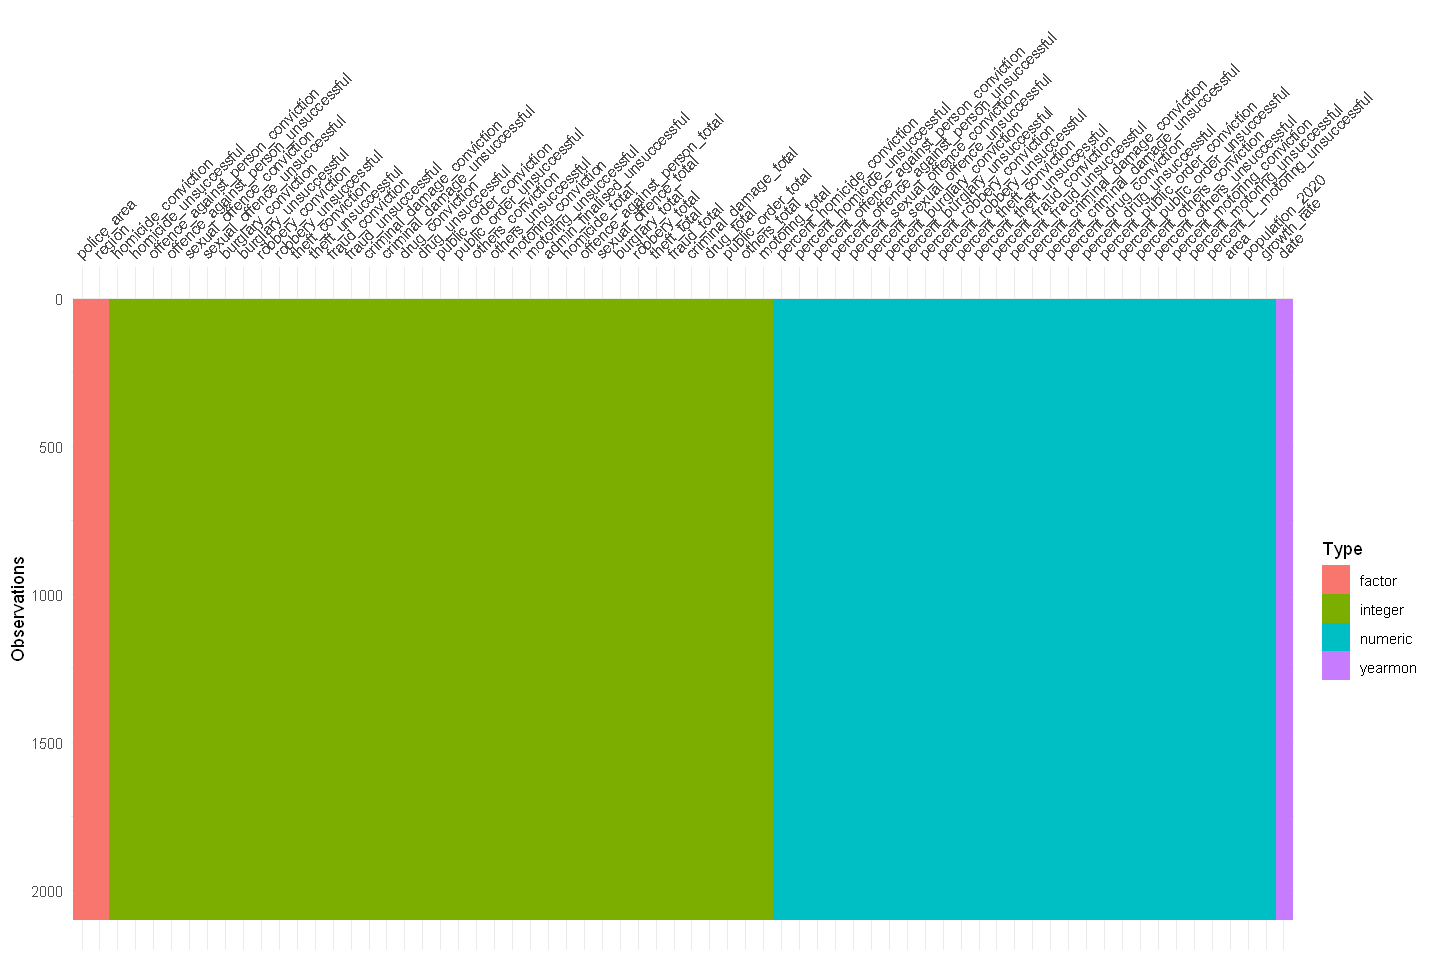

In [350]:
visdat::vis_dat(combined_data_df)

In [351]:
head(missing_data(combined_data_df))

,col_name,missing_count,percent_missing
,<chr>,<int>,<dbl>
1,police_area,0,0
2,homicide_conviction,0,0
3,percent_homicide_conviction,0,0
4,homicide_unsuccessful,0,0
5,percent_homicide_unsuccessful,0,0
6,offence_against_person_conviction,0,0


In [352]:
unique(combined_data_df[is.na(combined_data_df$population_2020), ]$police_area)

factor(0)
42 Levels: avon and somerset bedfordshire cambridgeshire cheshire ... wiltshire

In [353]:
head(combined_data_df)

,police_area,homicide_conviction,percent_homicide_conviction,homicide_unsuccessful,percent_homicide_unsuccessful,offence_against_person_conviction,percent_offence_against_person_conviction,offence_against_person_unsuccessful,percent_offence_against_person_unsuccessful,sexual_offence_conviction,⋯,fraud_total,criminal_damage_total,drug_total,public_order_total,others_total,motoring_total,region,area,population_2020,growth_rate
,<fct>,<int>,<dbl>,<int>,<dbl>,<int>,<dbl>,<int>,<dbl>,<int>,⋯,<int>,<int>,<int>,<int>,<int>,<int>,<fct>,<dbl>,<dbl>,<dbl>
1,avon and somerset,0,0.0,0,0.0,228,78.6,62,21.4,35,⋯,18,107,152,151,72,296,south west,1633,1053504,0.6
2,avon and somerset,6,100.0,0,0.0,348,76.8,105,23.2,50,⋯,22,66,133,80,12,298,south west,1633,1053504,0.6
3,avon and somerset,0,0.0,0,0.0,263,78.0,74,22.0,41,⋯,14,90,143,154,68,224,south west,1633,1053504,0.6
4,avon and somerset,3,33.3,6,66.7,305,77.4,89,22.6,48,⋯,16,58,100,83,10,235,south west,1633,1053504,0.6
5,avon and somerset,1,100.0,0,0.0,230,78.0,65,22.0,30,⋯,19,95,147,130,102,801,south west,1633,1053504,0.6
6,avon and somerset,1,100.0,0,0.0,167,78.8,45,21.2,36,⋯,11,60,137,79,82,225,south west,1633,1053504,0.6


let us use the 2020 population and growth rate to estimate the population for each year



In [354]:
#extract year from date column

combined_data_df$year <- as.numeric(format(combined_data_df$date, "%Y"))

In [355]:
head(combined_data_df)

,police_area,homicide_conviction,percent_homicide_conviction,homicide_unsuccessful,percent_homicide_unsuccessful,offence_against_person_conviction,percent_offence_against_person_conviction,offence_against_person_unsuccessful,percent_offence_against_person_unsuccessful,sexual_offence_conviction,⋯,criminal_damage_total,drug_total,public_order_total,others_total,motoring_total,region,area,population_2020,growth_rate,year
,<fct>,<int>,<dbl>,<int>,<dbl>,<int>,<dbl>,<int>,<dbl>,<int>,⋯,<int>,<int>,<int>,<int>,<int>,<fct>,<dbl>,<dbl>,<dbl>,<dbl>
1,avon and somerset,0,0.0,0,0.0,228,78.6,62,21.4,35,⋯,107,152,151,72,296,south west,1633,1053504,0.6,2014
2,avon and somerset,6,100.0,0,0.0,348,76.8,105,23.2,50,⋯,66,133,80,12,298,south west,1633,1053504,0.6,2016
3,avon and somerset,0,0.0,0,0.0,263,78.0,74,22.0,41,⋯,90,143,154,68,224,south west,1633,1053504,0.6,2014
4,avon and somerset,3,33.3,6,66.7,305,77.4,89,22.6,48,⋯,58,100,83,10,235,south west,1633,1053504,0.6,2016
5,avon and somerset,1,100.0,0,0.0,230,78.0,65,22.0,30,⋯,95,147,130,102,801,south west,1633,1053504,0.6,2014
6,avon and somerset,1,100.0,0,0.0,167,78.8,45,21.2,36,⋯,60,137,79,82,225,south west,1633,1053504,0.6,2014


In [356]:
#creating a new column for population for each year
combined_data_df$population <- combined_data_df$population_2020 * (1 + (combined_data_df$growth_rate / 100)) ^ (combined_data_df$year - 2020)

In [357]:
head(combined_data_df)

,police_area,homicide_conviction,percent_homicide_conviction,homicide_unsuccessful,percent_homicide_unsuccessful,offence_against_person_conviction,percent_offence_against_person_conviction,offence_against_person_unsuccessful,percent_offence_against_person_unsuccessful,sexual_offence_conviction,⋯,drug_total,public_order_total,others_total,motoring_total,region,area,population_2020,growth_rate,year,population
,<fct>,<int>,<dbl>,<int>,<dbl>,<int>,<dbl>,<int>,<dbl>,<int>,⋯,<int>,<int>,<int>,<int>,<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,avon and somerset,0,0.0,0,0.0,228,78.6,62,21.4,35,⋯,152,151,72,296,south west,1633,1053504,0.6,2014,1016362
2,avon and somerset,6,100.0,0,0.0,348,76.8,105,23.2,50,⋯,133,80,12,298,south west,1633,1053504,0.6,2016,1028595
3,avon and somerset,0,0.0,0,0.0,263,78.0,74,22.0,41,⋯,143,154,68,224,south west,1633,1053504,0.6,2014,1016362
4,avon and somerset,3,33.3,6,66.7,305,77.4,89,22.6,48,⋯,100,83,10,235,south west,1633,1053504,0.6,2016,1028595
5,avon and somerset,1,100.0,0,0.0,230,78.0,65,22.0,30,⋯,147,130,102,801,south west,1633,1053504,0.6,2014,1016362
6,avon and somerset,1,100.0,0,0.0,167,78.8,45,21.2,36,⋯,137,79,82,225,south west,1633,1053504,0.6,2014,1016362


In [358]:
#let us now remove the population_2020 and growth_rate columns

combined_data_df <- delete_columns(combined_data_df, c("population_2020", "growth_rate"))

In [359]:
#add population density column

combined_data_df$population_density <- combined_data_df$population / combined_data_df$area

In [360]:
head(combined_data_df)

,police_area,homicide_conviction,percent_homicide_conviction,homicide_unsuccessful,percent_homicide_unsuccessful,offence_against_person_conviction,percent_offence_against_person_conviction,offence_against_person_unsuccessful,percent_offence_against_person_unsuccessful,sexual_offence_conviction,⋯,criminal_damage_total,drug_total,public_order_total,others_total,motoring_total,region,area,year,population,population_density
,<fct>,<int>,<dbl>,<int>,<dbl>,<int>,<dbl>,<int>,<dbl>,<int>,⋯,<int>,<int>,<int>,<int>,<int>,<fct>,<dbl>,<dbl>,<dbl>,<dbl>
1,avon and somerset,0,0.0,0,0.0,228,78.6,62,21.4,35,⋯,107,152,151,72,296,south west,1633,2014,1016362,622.3893
2,avon and somerset,6,100.0,0,0.0,348,76.8,105,23.2,50,⋯,66,133,80,12,298,south west,1633,2016,1028595,629.8804
3,avon and somerset,0,0.0,0,0.0,263,78.0,74,22.0,41,⋯,90,143,154,68,224,south west,1633,2014,1016362,622.3893
4,avon and somerset,3,33.3,6,66.7,305,77.4,89,22.6,48,⋯,58,100,83,10,235,south west,1633,2016,1028595,629.8804
5,avon and somerset,1,100.0,0,0.0,230,78.0,65,22.0,30,⋯,95,147,130,102,801,south west,1633,2014,1016362,622.3893
6,avon and somerset,1,100.0,0,0.0,167,78.8,45,21.2,36,⋯,60,137,79,82,225,south west,1633,2014,1016362,622.3893


In [361]:
#confirming that there are no missing values

head(missing_data(combined_data_df))

,col_name,missing_count,percent_missing
,<chr>,<int>,<dbl>
1,police_area,0,0
2,homicide_conviction,0,0
3,percent_homicide_conviction,0,0
4,homicide_unsuccessful,0,0
5,percent_homicide_unsuccessful,0,0
6,offence_against_person_conviction,0,0


In [362]:
dim(combined_data_df)

[1] 2100   69

Looking at all the percentages, we can see it is a derivative of the absolute numeric columns, hence, we have to remove the percentage column to avoid redundant data and to avoid multicollinearity

#### Removing Percentage Column

In [363]:
#removing all percentage columns

percent_columns <- names(combined_data_df)[sapply(combined_data_df, is.numeric) & grepl("percent", names(combined_data_df))]

combined_data_df <- delete_columns(combined_data_df, percent_columns)


In [364]:
dim(combined_data_df)

[1] 2100   44

In [365]:
#rearranging the columns

combined_data_df <- combined_data_df[, c("region", setdiff(names(combined_data_df), "region"))]

In [366]:
head(combined_data_df)

,region,police_area,homicide_conviction,homicide_unsuccessful,offence_against_person_conviction,offence_against_person_unsuccessful,sexual_offence_conviction,sexual_offence_unsuccessful,burglary_conviction,burglary_unsuccessful,⋯,fraud_total,criminal_damage_total,drug_total,public_order_total,others_total,motoring_total,area,year,population,population_density
,<fct>,<fct>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,⋯,<int>,<int>,<int>,<int>,<int>,<int>,<dbl>,<dbl>,<dbl>,<dbl>
1,south west,avon and somerset,0,0,228,62,35,17,49,1,⋯,18,107,152,151,72,296,1633,2014,1016362,622.3893
2,south west,avon and somerset,6,0,348,105,50,26,37,6,⋯,22,66,133,80,12,298,1633,2016,1028595,629.8804
3,south west,avon and somerset,0,0,263,74,41,13,39,12,⋯,14,90,143,154,68,224,1633,2014,1016362,622.3893
4,south west,avon and somerset,3,6,305,89,48,10,35,3,⋯,16,58,100,83,10,235,1633,2016,1028595,629.8804
5,south west,avon and somerset,1,0,230,65,30,16,39,3,⋯,19,95,147,130,102,801,1633,2014,1016362,622.3893
6,south west,avon and somerset,1,0,167,45,36,8,37,2,⋯,11,60,137,79,82,225,1633,2014,1016362,622.3893


# Data Exploration

## Univariant Analysis and Outlier Detection

Let us now check out outliers for all numerical variables in our data set.

We will be utilizing boxplot and histogram and summarzed data for these

In [367]:

feature_visualization <- function(column) {
  
   # Calculate the summary statistics
  summary_stats <- data.frame(
    Statistic = c("Mean", "Minimum", "1st Quartile", "Median", "3rd Quartile", "quantile_99", "Maximum", "Variance", "Standard Deviation", "Relative SD", "Skewness", "Kurtosis"),
    Value = c(
      mean(combined_data_df[[column]]),
      min(combined_data_df[[column]]),
      quantile(combined_data_df[[column]])[2],
      median(combined_data_df[[column]]),
      quantile(combined_data_df[[column]])[4],
      quantile(combined_data_df[[column]], probs = 0.99),
      max(combined_data_df[[column]]),
      var(combined_data_df[[column]]),
      sd(combined_data_df[[column]]),
      (sd(combined_data_df[[column]]) / mean(combined_data_df[[column]])),
      skewness(combined_data_df[[column]]),
      kurtosis(combined_data_df[[column]])
    )
  )

  summary_stats <- data.frame(t(summary_stats))
  colnames(summary_stats) <- summary_stats[1, ]
  summary_stats <- summary_stats[-1, ]


  
  # Calculate the range of the data
  data_range <- max(combined_data_df[[column]]) - min(combined_data_df[[column]])
  
  # Calculate the binwidth based on the range
  binwidth <- data_range / 30  # Adjust the denominator to control the number of bins
  
  # Set the plot size
  options(repr.plot.width = 12, repr.plot.height = 4)
  
  # Create a histogram
  p1 <- ggplot(combined_data_df, aes(x = .data[[column]])) +
    geom_histogram(binwidth = binwidth, color = "black", fill = "lightblue") +
    labs(title = paste("Histogram for ", column), x = column, y = "Frequency")+
    theme(plot.title = element_text(hjust = 0.5))




  
  # Create a boxplot
  p2 <- ggplot(combined_data_df, aes(x = .data[[column]])) +
    geom_boxplot(color = "black", fill = "lightblue") +
    labs(title = paste("Boxplot for ", column), x = 'Value', y = "Frequency")+
    theme(plot.title = element_text(hjust = 0.5))
  
  # Arrange the plots side by side using patchwork
  plot_arrangement <- p1 + p2


   # Print the plots and summary statistics as a data frame with columns
  print(plot_arrangement)

  
  cat("\033[1m", paste("SUMMARY STATISTICS FOR ", toupper(column)), "\033[0m", "\n\n\n")

  #cat(glue("\n\033[1mSUMMARY STATISTICS FOR {toupper(column)}\033[0m\n\n"))

  #cat(sprintf("\n\033[1mSUMMARY STATISTICS FOR %s\033[0m\n\n", toupper(column)))

  
  print.data.frame(summary_stats)

}



 SUMMARY STATISTICS FOR  HOMICIDE_CONVICTION  


           Mean   Minimum 1st Quartile    Median 3rd Quartile quantile_99
Value  1.929524  0.000000     0.000000  1.000000     2.000000   16.000000
        Maximum  Variance Standard Deviation Relative SD  Skewness  Kurtosis
Value 38.000000 10.220853           3.197007    1.656889  4.052634 26.900494


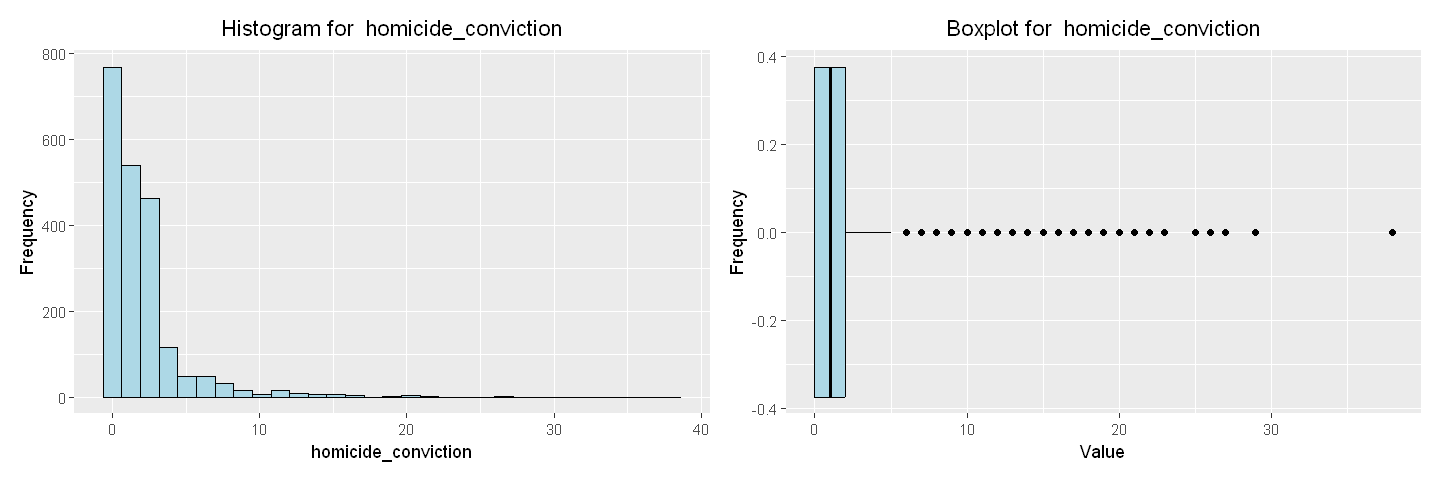

 SUMMARY STATISTICS FOR  HOMICIDE_UNSUCCESSFUL  


            Mean    Minimum 1st Quartile     Median 3rd Quartile quantile_99
Value  0.4619048  0.0000000    0.0000000  0.0000000    0.0000000   8.0000000
         Maximum   Variance Standard Deviation Relative SD   Skewness
Value 14.0000000  1.6550512          1.2864879   2.7851800  5.2167508
        Kurtosis
Value 37.8477920


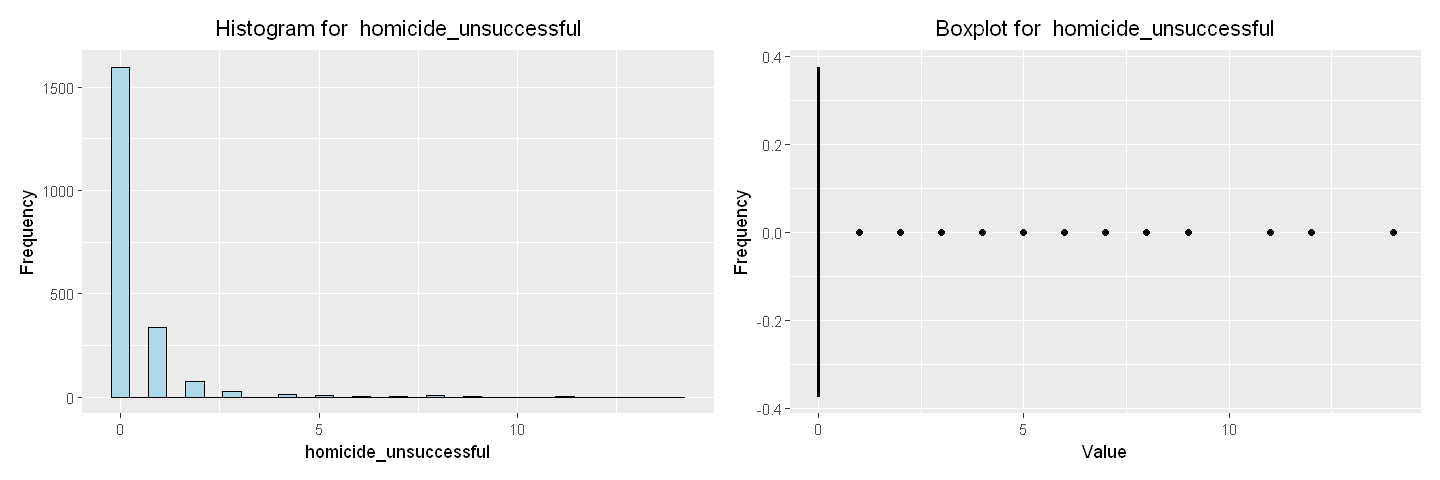

 SUMMARY STATISTICS FOR  OFFENCE_AGAINST_PERSON_CONVICTION  


              Mean      Minimum 1st Quartile       Median 3rd Quartile
Value 2.326505e+02 2.900000e+01 1.140000e+02 1.750000e+02 2.650000e+02
       quantile_99      Maximum     Variance Standard Deviation  Relative SD
Value 1.455000e+03 1.904000e+03 5.324337e+04       2.307452e+02 9.918108e-01
          Skewness     Kurtosis
Value 4.102841e+00 2.353511e+01


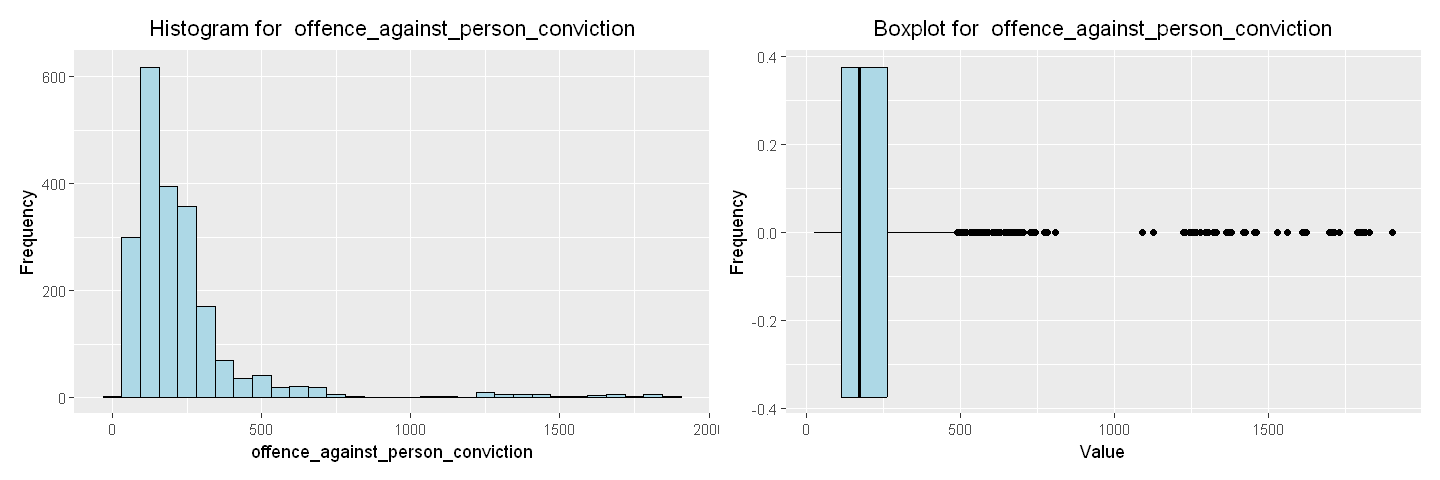

 SUMMARY STATISTICS FOR  OFFENCE_AGAINST_PERSON_UNSUCCESSFUL  


              Mean      Minimum 1st Quartile       Median 3rd Quartile
Value    69.382381     5.000000    27.000000    44.000000    74.000000
       quantile_99      Maximum     Variance Standard Deviation  Relative SD
Value   642.200000   862.000000 10064.623129         100.322595     1.445938
          Skewness     Kurtosis
Value     5.161568    32.804572


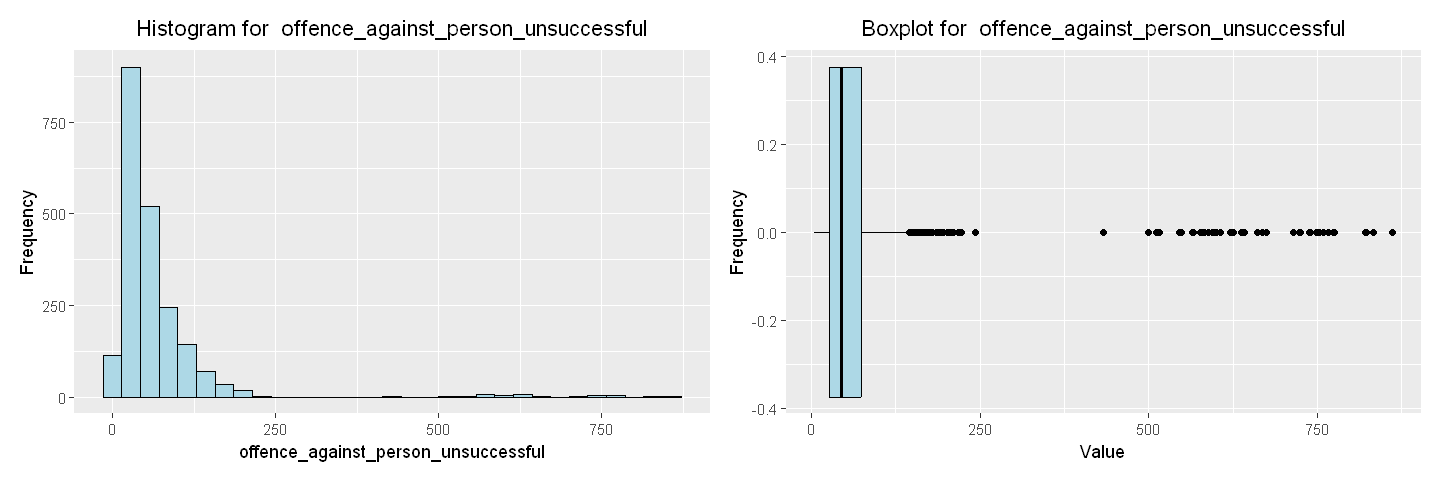

 SUMMARY STATISTICS FOR  SEXUAL_OFFENCE_CONVICTION  


            Mean    Minimum 1st Quartile     Median 3rd Quartile quantile_99
Value  22.400476   0.000000     7.000000  14.000000    28.000000  141.010000
         Maximum   Variance Standard Deviation Relative SD   Skewness
Value 181.000000 607.441734          24.646333    1.100259   2.941049
        Kurtosis
Value  14.086940


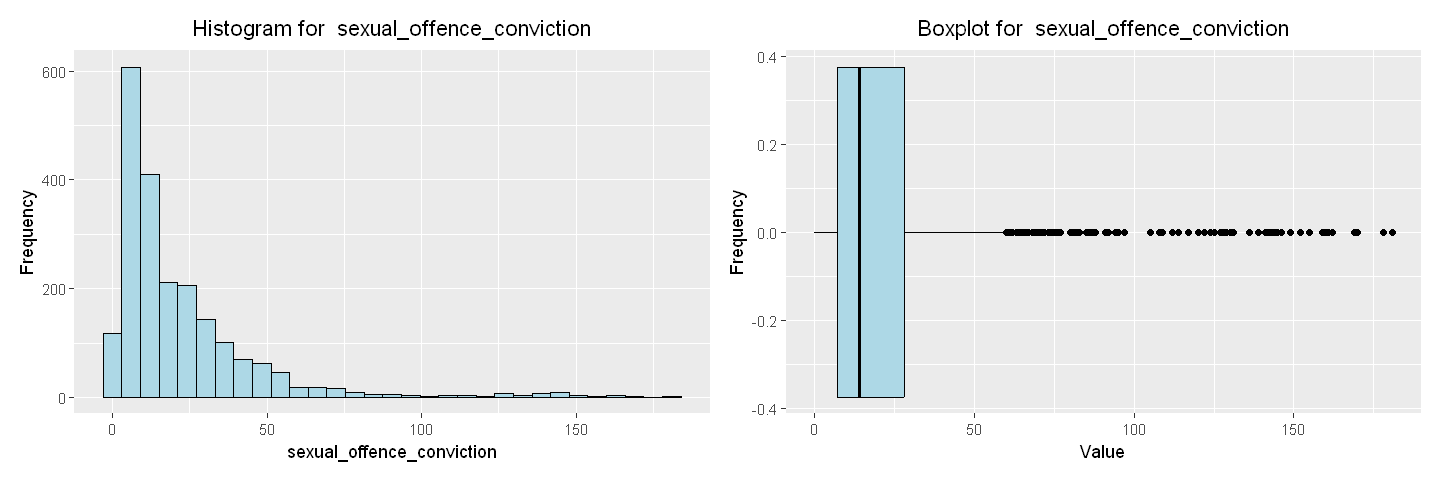

 SUMMARY STATISTICS FOR  SEXUAL_OFFENCE_UNSUCCESSFUL  


            Mean    Minimum 1st Quartile     Median 3rd Quartile quantile_99
Value   8.292381   0.000000     1.000000   4.000000    11.000000   69.010000
         Maximum   Variance Standard Deviation Relative SD   Skewness
Value 107.000000 145.403753          12.058348    1.454148   3.533826
        Kurtosis
Value  19.056989


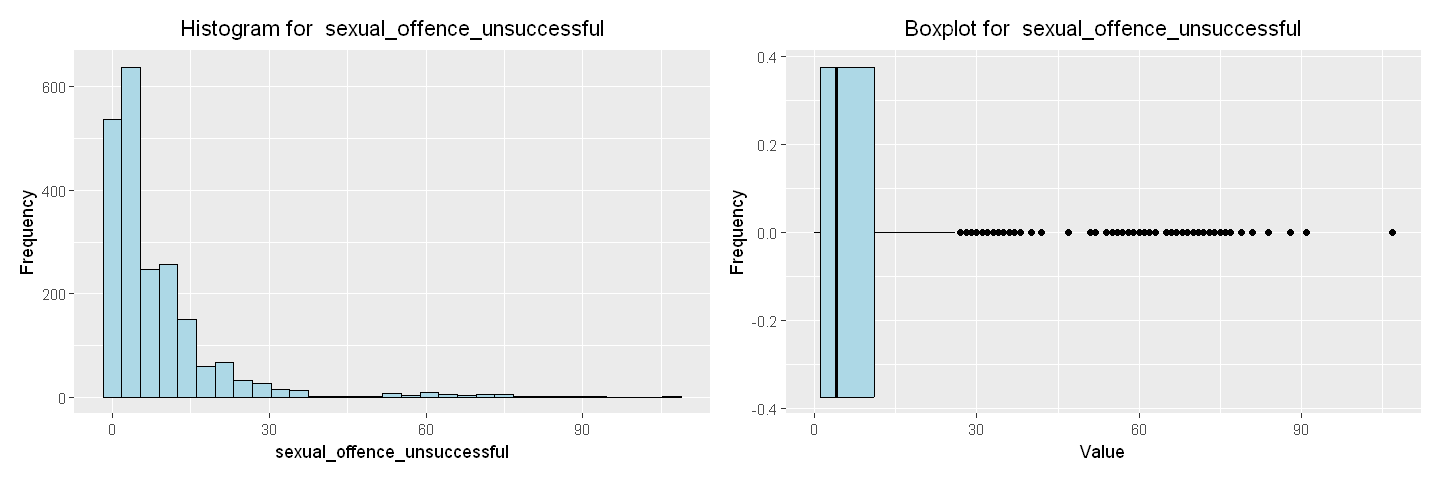

 SUMMARY STATISTICS FOR  BURGLARY_CONVICTION  


             Mean     Minimum 1st Quartile      Median 3rd Quartile quantile_99
Value   30.807143    1.000000    14.000000   22.000000    36.000000  212.010000
          Maximum    Variance Standard Deviation Relative SD    Skewness
Value  278.000000 1092.917052          33.059296    1.073105    3.910165
         Kurtosis
Value   22.191959


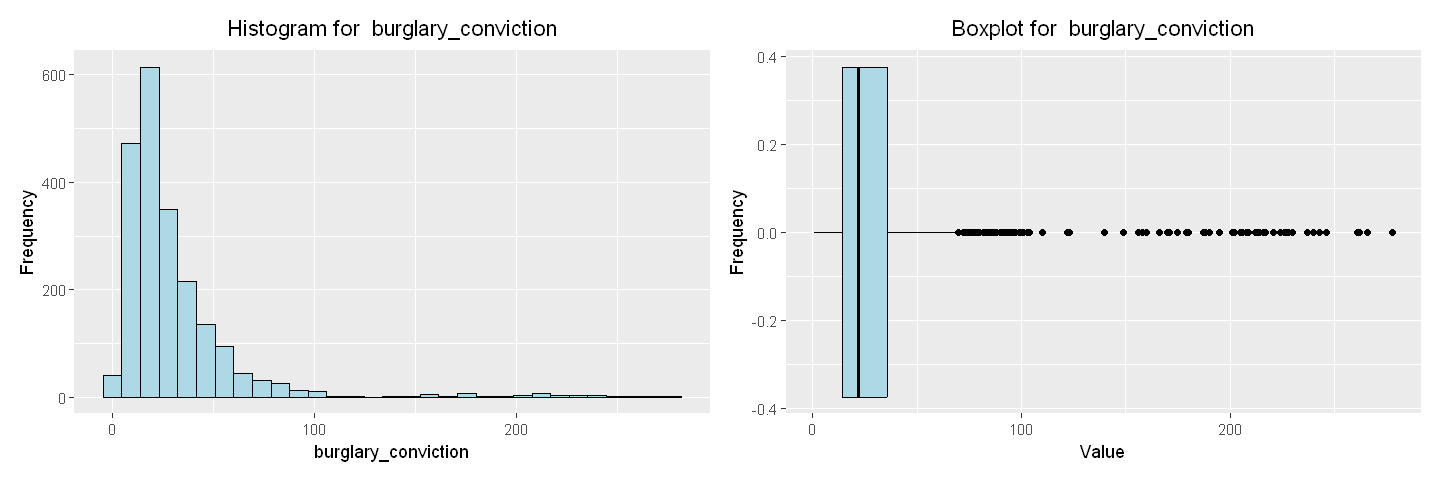

 SUMMARY STATISTICS FOR  BURGLARY_UNSUCCESSFUL  


           Mean   Minimum 1st Quartile    Median 3rd Quartile quantile_99
Value  5.220000  0.000000     1.000000  3.000000     6.000000   51.000000
        Maximum  Variance Standard Deviation Relative SD  Skewness  Kurtosis
Value 83.000000 69.301744           8.324767    1.594783  4.893570 32.281783


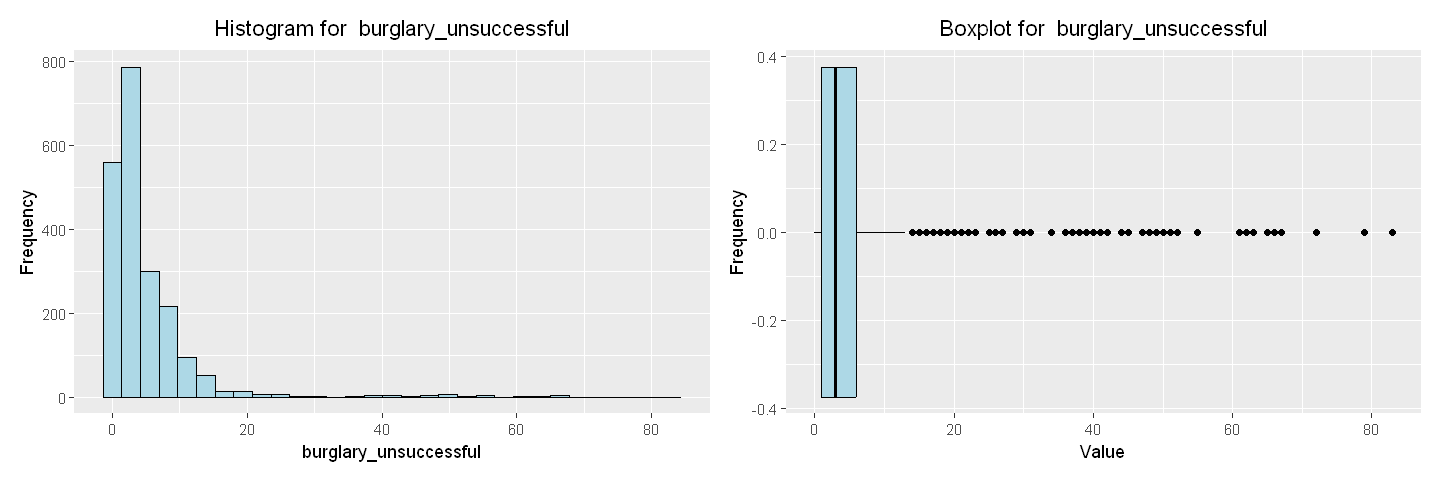

 SUMMARY STATISTICS FOR  ROBBERY_CONVICTION  


            Mean    Minimum 1st Quartile     Median 3rd Quartile quantile_99
Value   9.920000   0.000000     2.000000   5.000000    10.000000  106.040000
         Maximum   Variance Standard Deviation Relative SD   Skewness
Value 209.000000 343.646765          18.537712    1.868721   5.417371
        Kurtosis
Value  39.591215


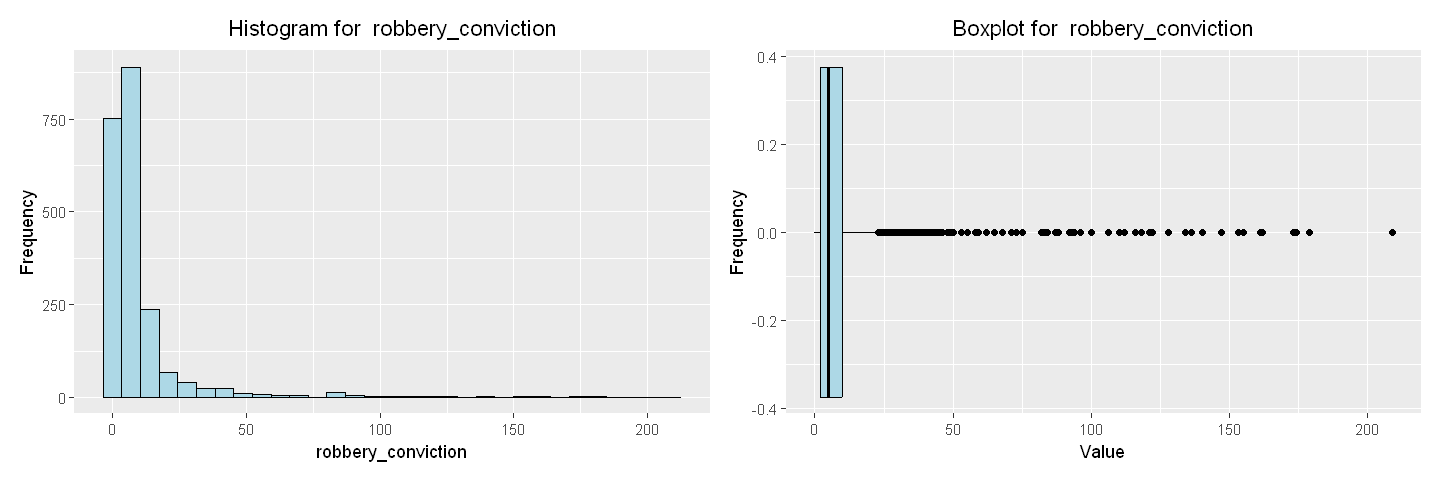

 SUMMARY STATISTICS FOR  ROBBERY_UNSUCCESSFUL  


           Mean   Minimum 1st Quartile    Median 3rd Quartile quantile_99
Value  2.658571  0.000000     0.000000  1.000000     3.000000   34.010000
        Maximum  Variance Standard Deviation Relative SD  Skewness  Kurtosis
Value 61.000000 36.987230           6.081713    2.287587  5.593585 41.016977


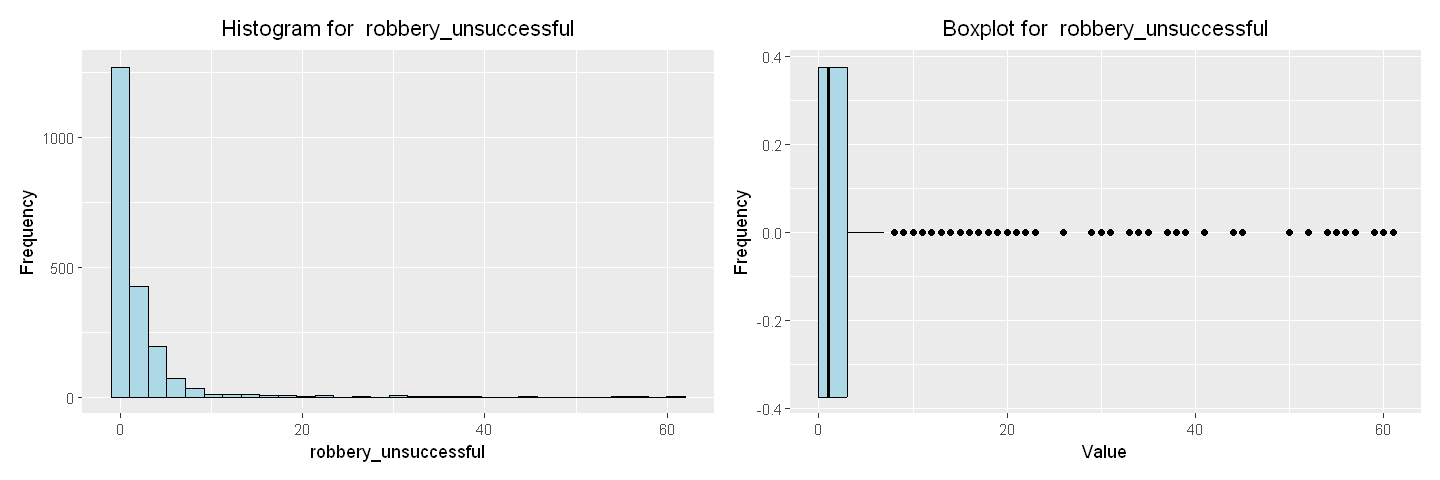

 SUMMARY STATISTICS FOR  THEFT_CONVICTION  


              Mean      Minimum 1st Quartile       Median 3rd Quartile
Value 1.917162e+02 1.300000e+01 9.500000e+01 1.450000e+02 2.310000e+02
       quantile_99      Maximum     Variance Standard Deviation  Relative SD
Value 1.087120e+03 1.426000e+03 3.023658e+04       1.738867e+02 9.070006e-01
          Skewness     Kurtosis
Value 3.473792e+00 1.913682e+01


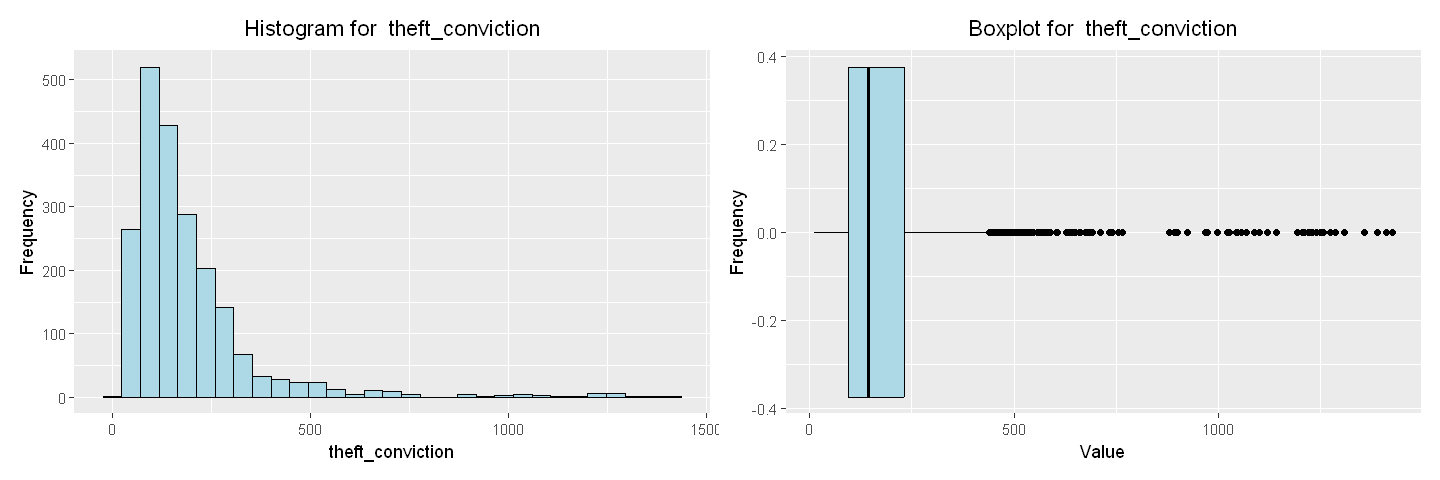

 SUMMARY STATISTICS FOR  THEFT_UNSUCCESSFUL  


            Mean    Minimum 1st Quartile     Median 3rd Quartile quantile_99
Value  17.210952   0.000000     6.000000  11.000000    18.000000  157.010000
         Maximum   Variance Standard Deviation Relative SD   Skewness
Value 220.000000 615.137469          24.801965    1.441057   4.809956
        Kurtosis
Value  29.908086


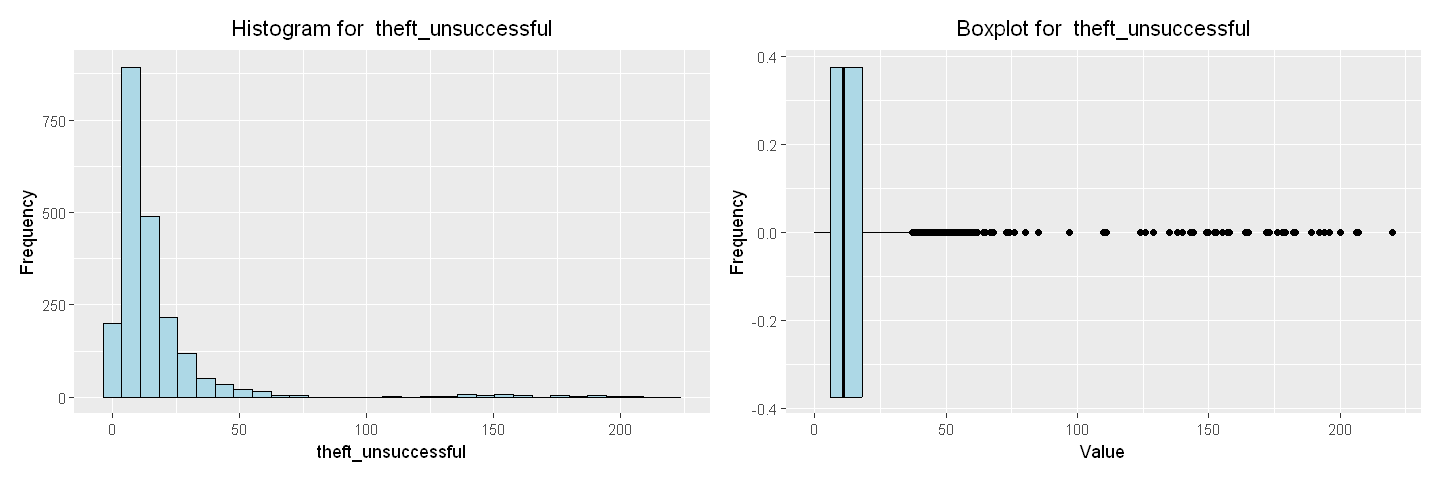

 SUMMARY STATISTICS FOR  FRAUD_CONVICTION  


             Mean     Minimum 1st Quartile      Median 3rd Quartile quantile_99
Value   19.712381    0.000000     7.000000   12.000000    20.000000  224.010000
          Maximum    Variance Standard Deviation Relative SD    Skewness
Value  299.000000 1107.565640          33.280109    1.688285    5.483060
         Kurtosis
Value   35.263730


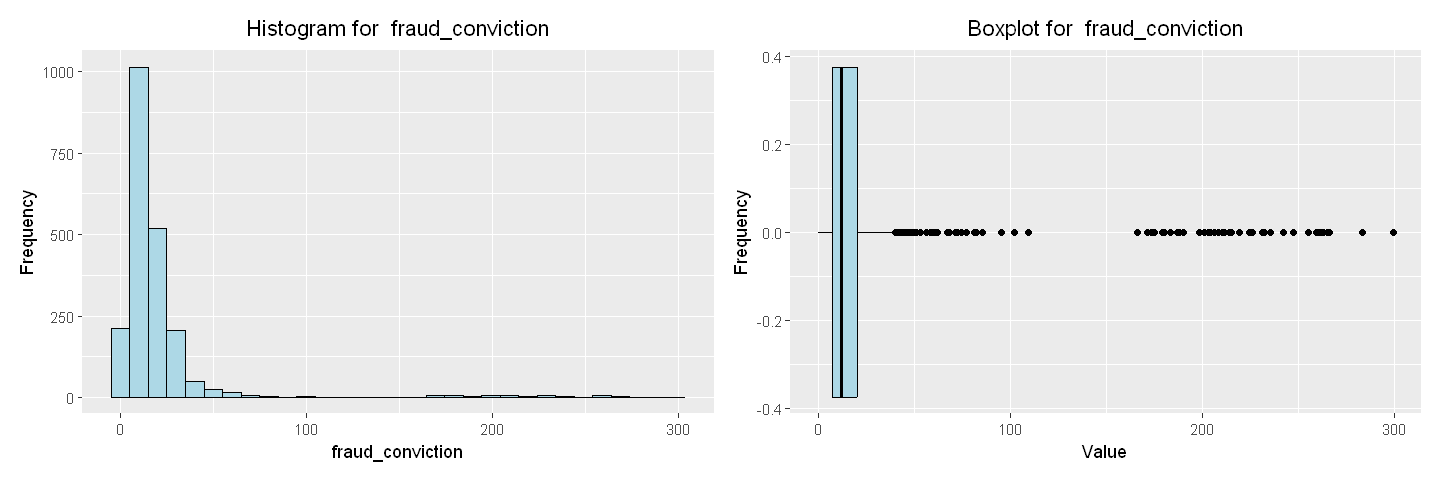

 SUMMARY STATISTICS FOR  FRAUD_UNSUCCESSFUL  


           Mean   Minimum 1st Quartile    Median 3rd Quartile quantile_99
Value  3.188095  0.000000     1.000000  2.000000     3.000000   42.000000
        Maximum  Variance Standard Deviation Relative SD  Skewness  Kurtosis
Value 58.000000 41.143736           6.414338    2.011966  5.394346 36.113764


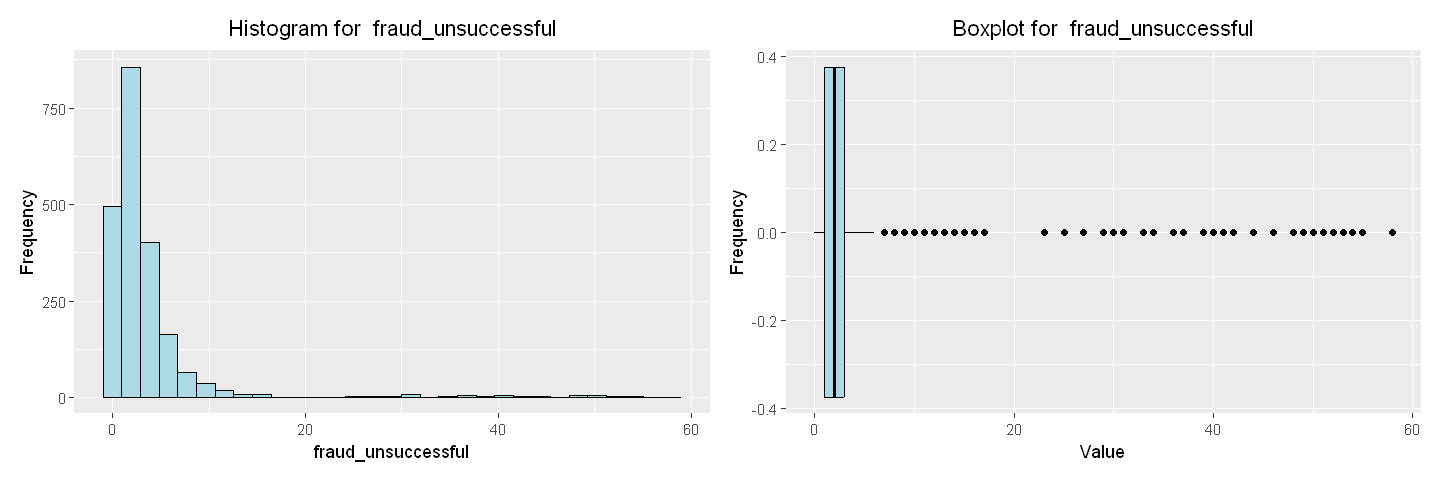

 SUMMARY STATISTICS FOR  CRIMINAL_DAMAGE_CONVICTION  


              Mean      Minimum 1st Quartile       Median 3rd Quartile
Value   49.1914286    3.0000000   25.0000000   39.0000000   57.0000000
       quantile_99      Maximum     Variance Standard Deviation  Relative SD
Value  278.0400000  400.0000000 1921.9700075         43.8402784    0.8912178
          Skewness     Kurtosis
Value    3.6657889   20.8343833


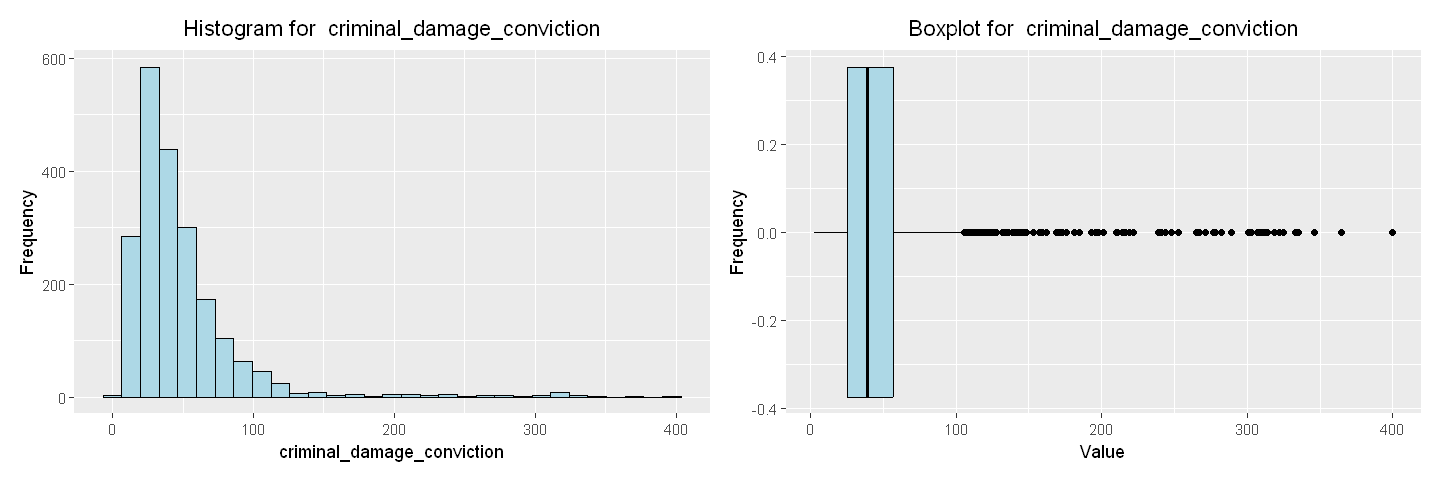

 SUMMARY STATISTICS FOR  CRIMINAL_DAMAGE_UNSUCCESSFUL  


           Mean   Minimum 1st Quartile    Median 3rd Quartile quantile_99
Value  8.435714  0.000000     3.000000  6.000000    10.000000   62.000000
        Maximum  Variance Standard Deviation Relative SD  Skewness  Kurtosis
Value 85.000000 99.234074           9.961630    1.180888  4.059312 23.939085


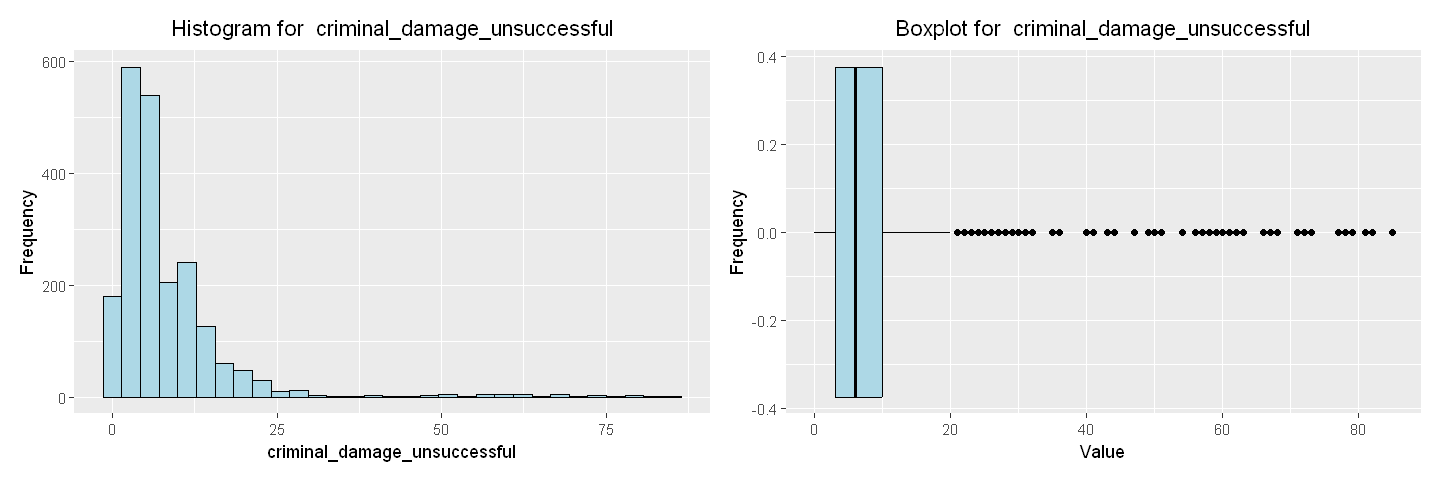

 SUMMARY STATISTICS FOR  DRUG_CONVICTION  


              Mean      Minimum 1st Quartile       Median 3rd Quartile
Value    95.720952     4.000000    38.000000    62.000000    97.000000
       quantile_99      Maximum     Variance Standard Deviation  Relative SD
Value  1039.010000  1228.000000 23049.996416         151.822253     1.586092
          Skewness     Kurtosis
Value     5.385027    33.650200


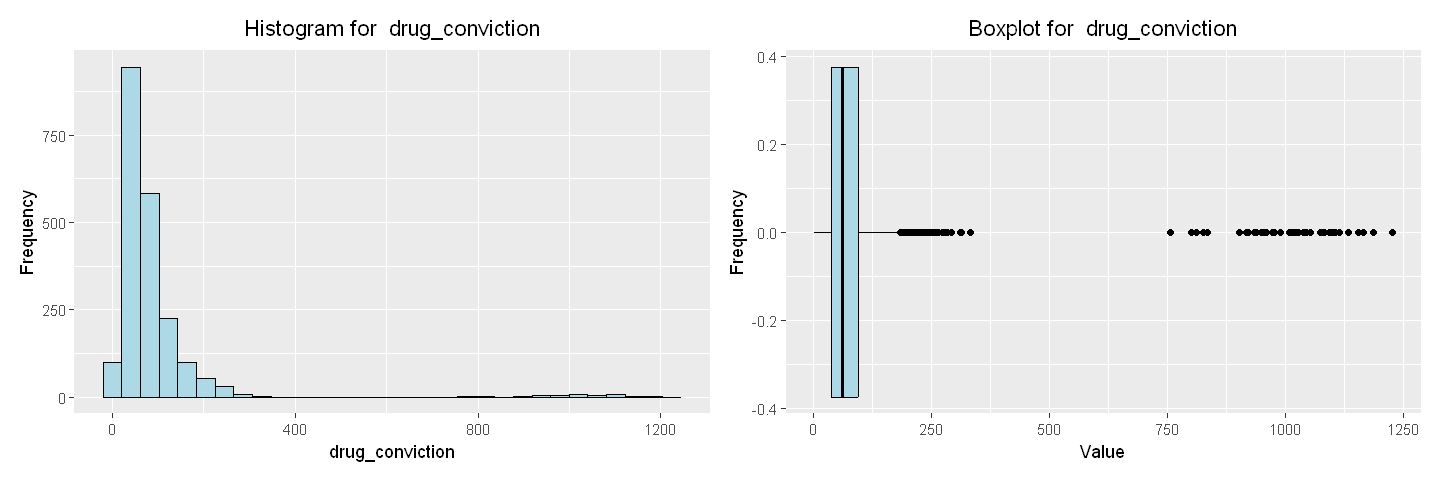

 SUMMARY STATISTICS FOR  DRUG_UNSUCCESSFUL  


            Mean    Minimum 1st Quartile     Median 3rd Quartile quantile_99
Value   6.445238   0.000000     2.000000   4.000000     7.000000   86.000000
         Maximum   Variance Standard Deviation Relative SD   Skewness
Value 111.000000 165.203765          12.853162    1.994211   5.542619
        Kurtosis
Value  36.183216


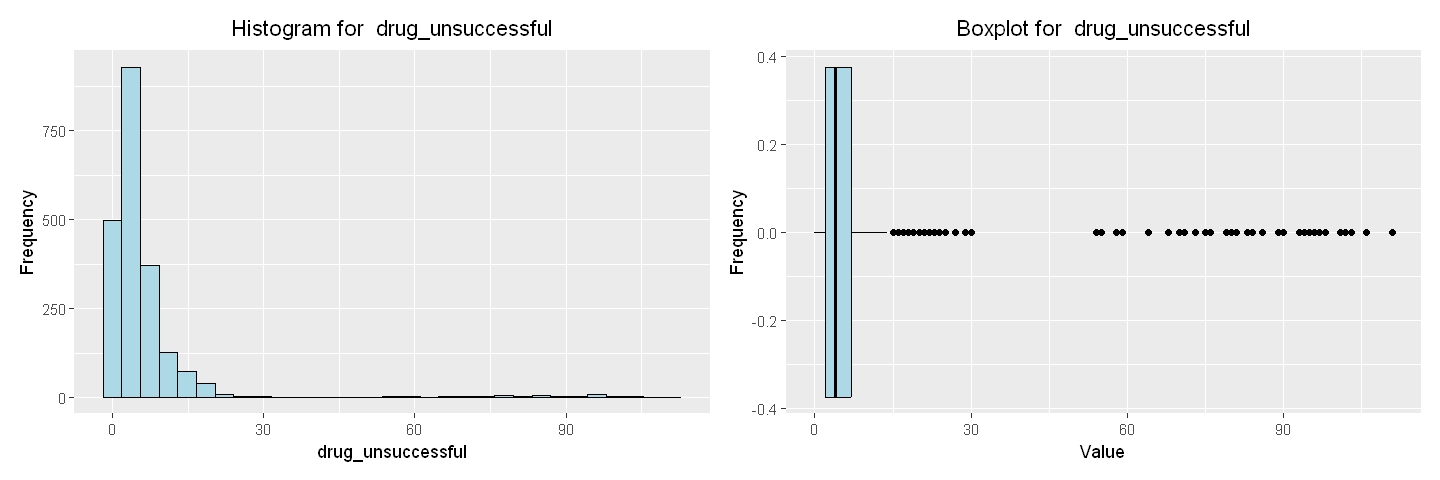

 SUMMARY STATISTICS FOR  PUBLIC_ORDER_CONVICTION  


             Mean     Minimum 1st Quartile      Median 3rd Quartile quantile_99
Value   83.280476    2.000000    39.000000   62.000000    96.000000  520.090000
          Maximum    Variance Standard Deviation Relative SD    Skewness
Value  779.000000 7375.383420          85.880053    1.031215    3.947400
         Kurtosis
Value   22.883622


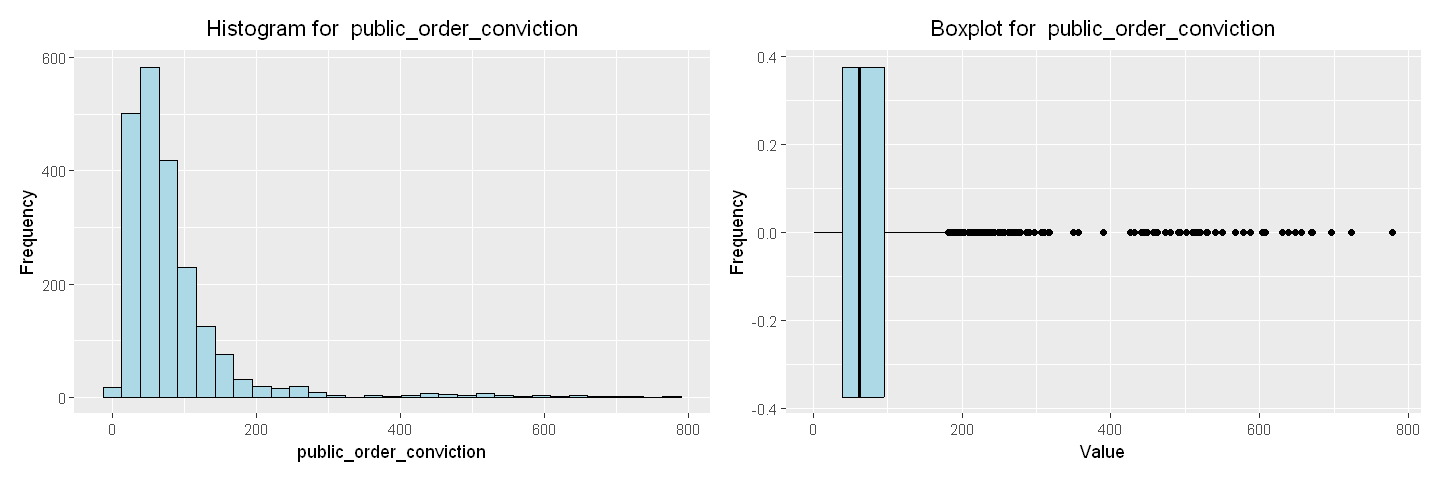

 SUMMARY STATISTICS FOR  PUBLIC_ORDER_UNSUCCESSFUL  


            Mean    Minimum 1st Quartile     Median 3rd Quartile quantile_99
Value  14.606667   0.000000     5.000000   9.000000    15.000000  150.000000
         Maximum   Variance Standard Deviation Relative SD   Skewness
Value 194.000000 500.703719          22.376410    1.531931   4.888676
        Kurtosis
Value  30.067123


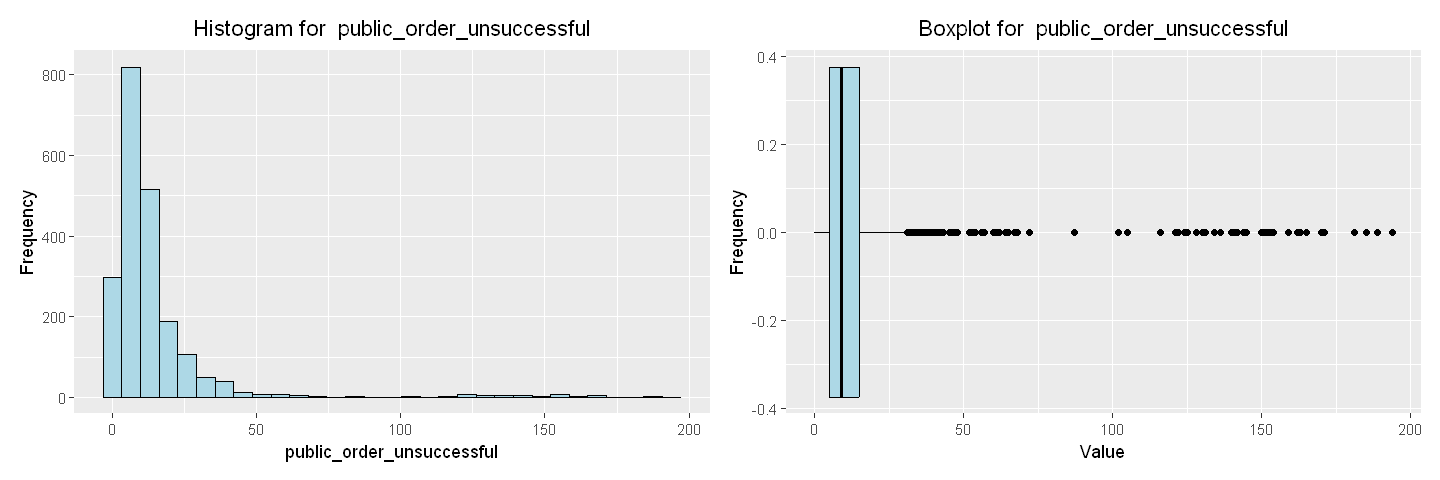

 SUMMARY STATISTICS FOR  OTHERS_CONVICTION  


             Mean     Minimum 1st Quartile      Median 3rd Quartile quantile_99
Value   33.237619    0.000000     9.000000   16.000000    33.000000  281.340000
          Maximum    Variance Standard Deviation Relative SD    Skewness
Value  551.000000 3336.304158          57.760749    1.737812    5.402308
         Kurtosis
Value   39.966892


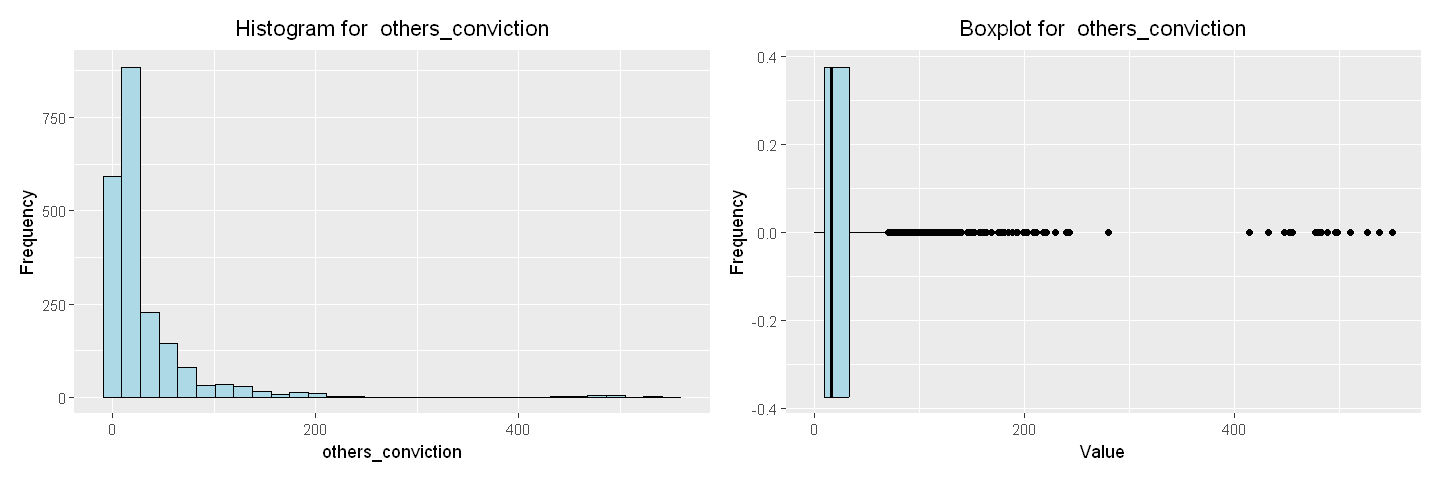

 SUMMARY STATISTICS FOR  OTHERS_UNSUCCESSFUL  


            Mean    Minimum 1st Quartile     Median 3rd Quartile quantile_99
Value   6.168095   0.000000     1.000000   3.000000     6.000000   61.150000
         Maximum   Variance Standard Deviation Relative SD   Skewness
Value 129.000000 155.823565          12.482931    2.023790   5.903032
        Kurtosis
Value  46.821347


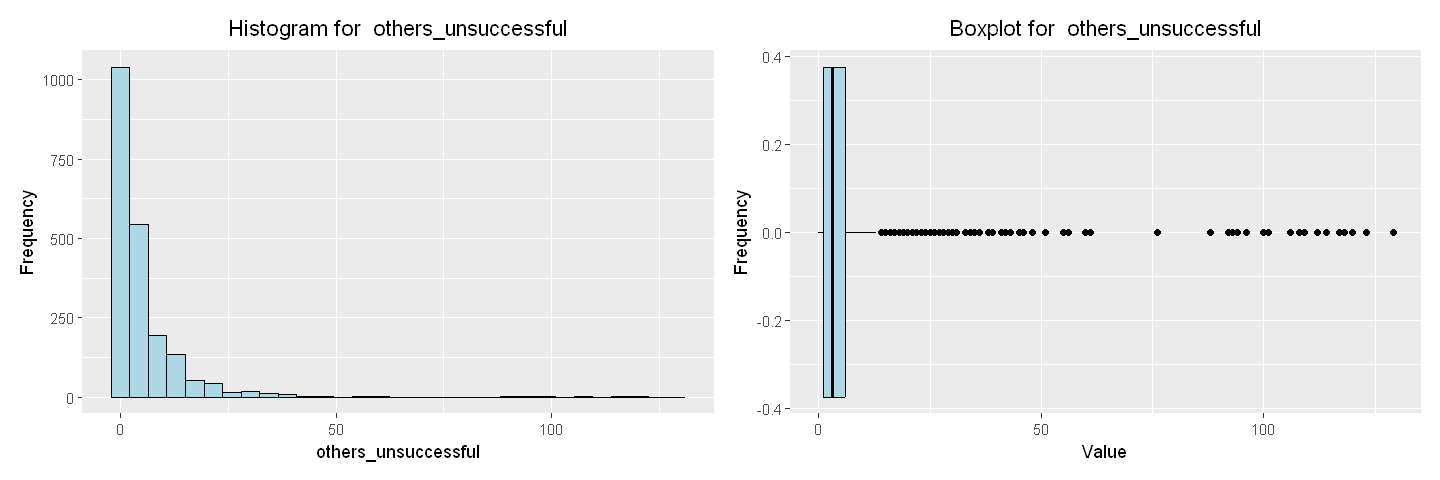

 SUMMARY STATISTICS FOR  MOTORING_CONVICTION  


              Mean      Minimum 1st Quartile       Median 3rd Quartile
Value   187.364286     1.000000    94.000000   139.000000   209.000000
       quantile_99      Maximum     Variance Standard Deviation  Relative SD
Value  1207.180000  1889.000000 35229.307442         187.694719     1.001764
          Skewness     Kurtosis
Value     4.303726    25.382259


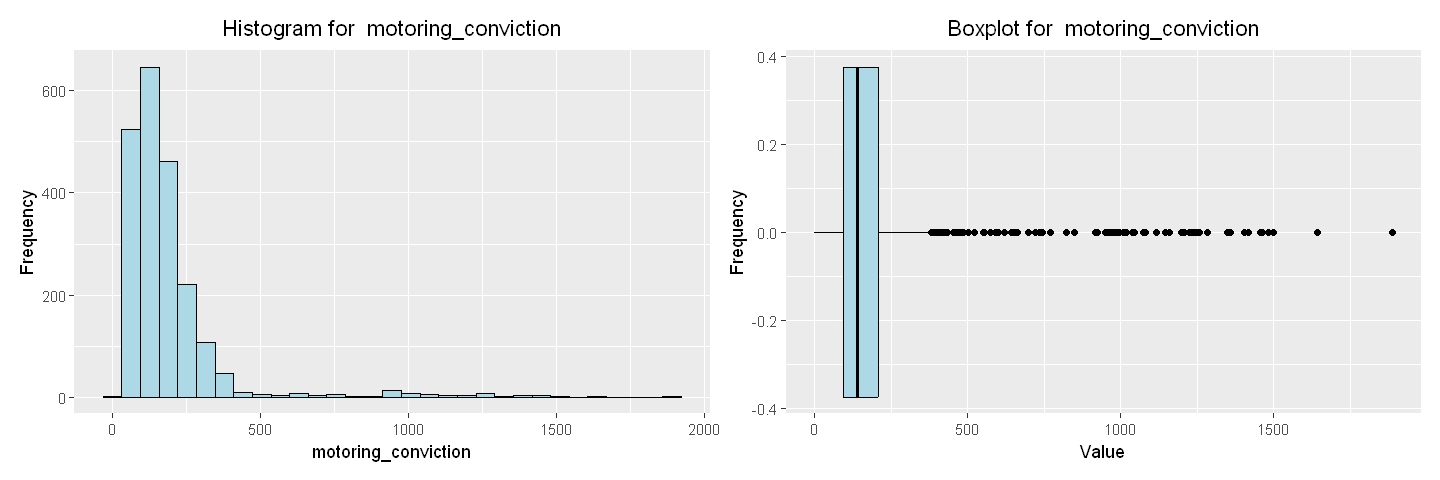

 SUMMARY STATISTICS FOR  MOTORING_UNSUCCESSFUL  


             Mean     Minimum 1st Quartile      Median 3rd Quartile quantile_99
Value   31.230476    0.000000    11.000000   20.000000    33.000000  341.080000
          Maximum    Variance Standard Deviation Relative SD    Skewness
Value  491.000000 2606.615745          51.055027    1.634782    5.623775
         Kurtosis
Value   38.111973


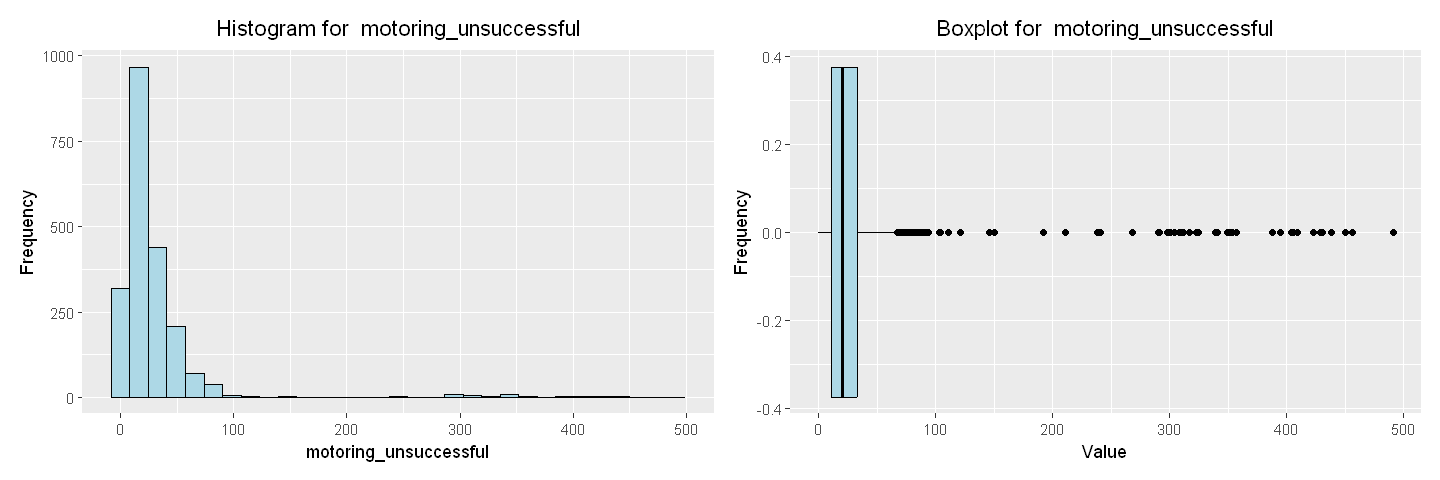

 SUMMARY STATISTICS FOR  ADMIN_FINALISED_UNSUCCESSFUL  


             Mean     Minimum 1st Quartile      Median 3rd Quartile quantile_99
Value   19.851905    0.000000     7.000000   12.000000    20.000000  217.000000
          Maximum    Variance Standard Deviation Relative SD    Skewness
Value  419.000000 1151.159096          33.928736    1.709092    5.412677
         Kurtosis
Value   36.800348


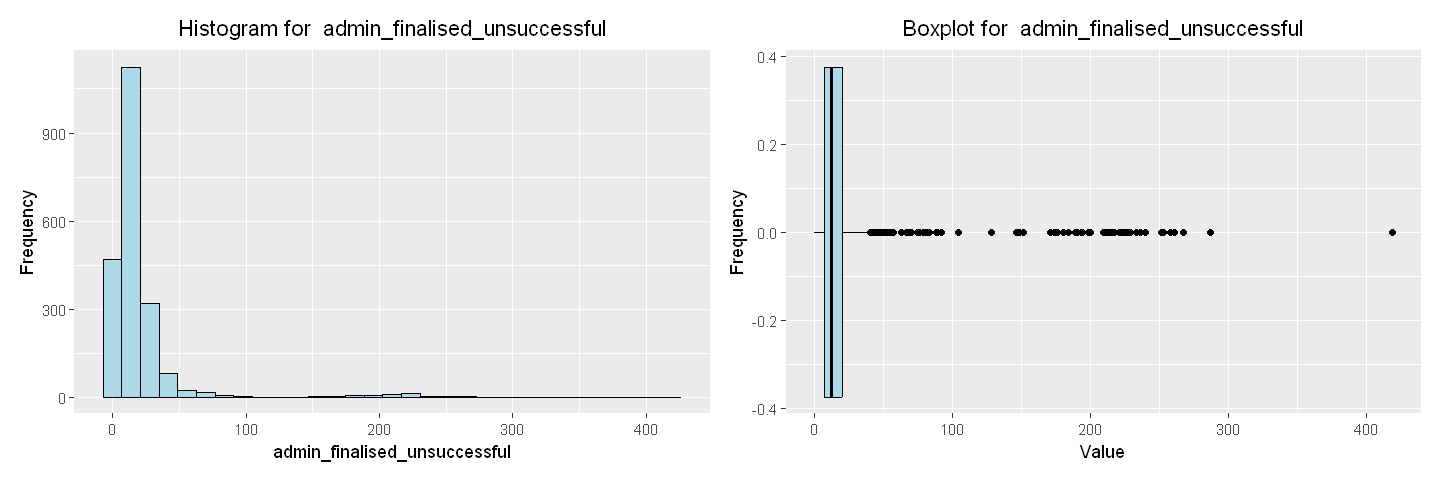

 SUMMARY STATISTICS FOR  HOMICIDE_TOTAL  


           Mean   Minimum 1st Quartile    Median 3rd Quartile quantile_99
Value  2.391429  0.000000     0.000000  1.000000     3.000000   23.000000
        Maximum  Variance Standard Deviation Relative SD  Skewness  Kurtosis
Value 42.000000 17.268340           4.155519    1.737672  4.317614 27.672259


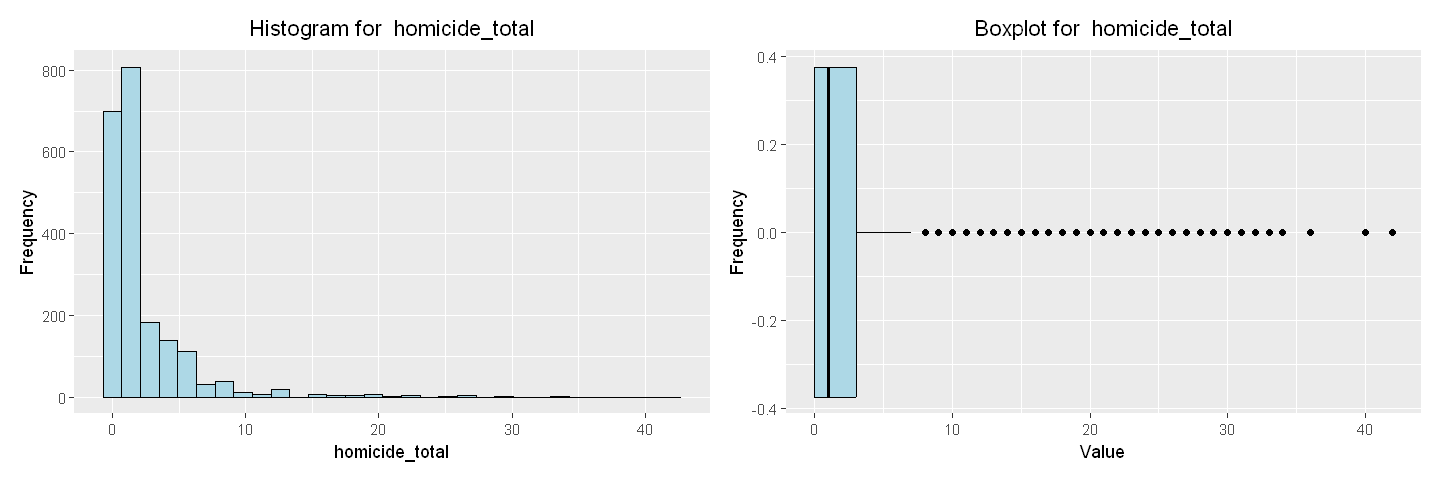

 SUMMARY STATISTICS FOR  OFFENCE_AGAINST_PERSON_TOTAL  


              Mean      Minimum 1st Quartile       Median 3rd Quartile
Value 3.020329e+02 4.200000e+01 1.410000e+02 2.195000e+02 3.390000e+02
       quantile_99      Maximum     Variance Standard Deviation  Relative SD
Value 2.101430e+03 2.666000e+03 1.077800e+05       3.282986e+02 1.086963e+00
          Skewness     Kurtosis
Value 4.458107e+00 2.651718e+01


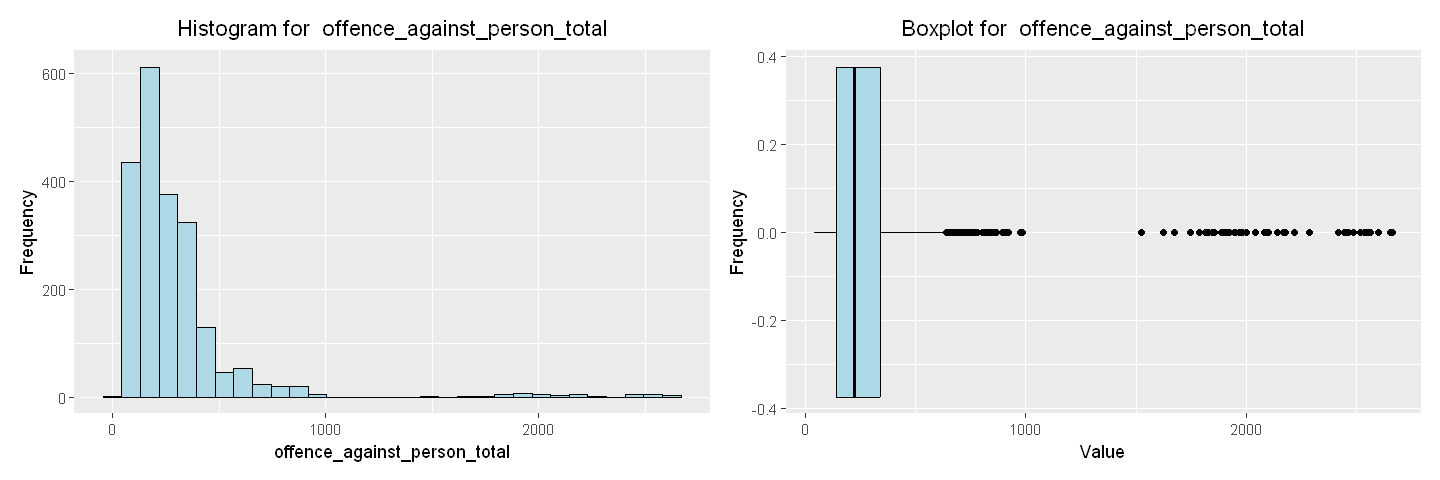

 SUMMARY STATISTICS FOR  SEXUAL_OFFENCE_TOTAL  


             Mean     Minimum 1st Quartile      Median 3rd Quartile quantile_99
Value   30.692857    0.000000    10.000000   18.000000    39.000000  208.000000
          Maximum    Variance Standard Deviation Relative SD    Skewness
Value  285.000000 1303.038062          36.097619    1.176092    3.152455
         Kurtosis
Value   15.615849


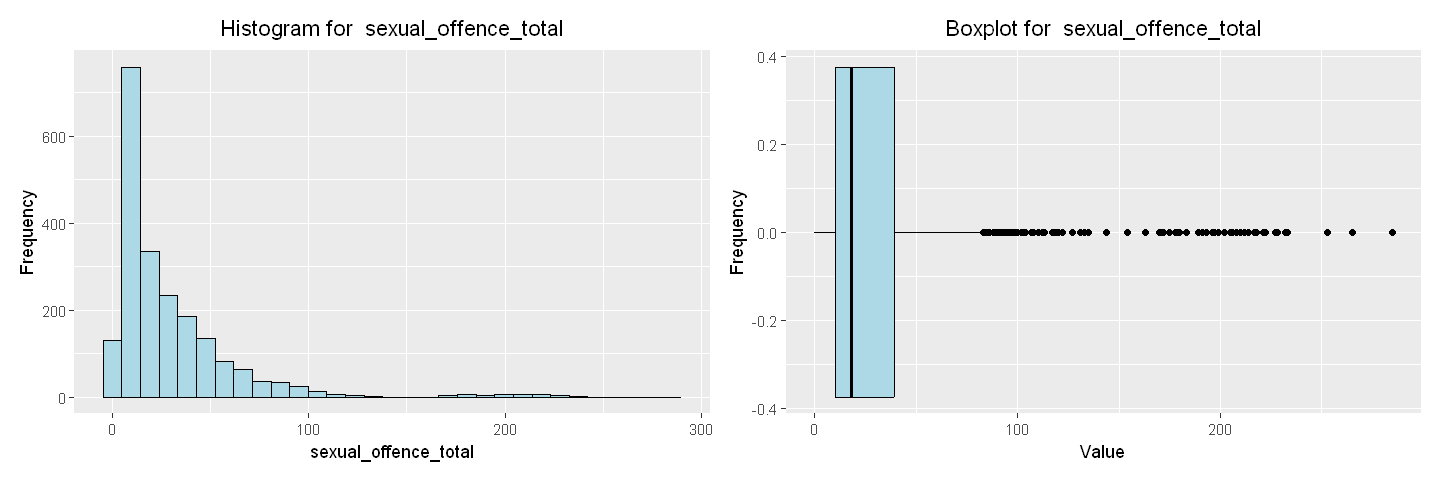

 SUMMARY STATISTICS FOR  BURGLARY_TOTAL  


             Mean     Minimum 1st Quartile      Median 3rd Quartile quantile_99
Value   36.027143    1.000000    16.000000   26.000000    42.000000  265.010000
          Maximum    Variance Standard Deviation Relative SD    Skewness
Value  343.000000 1654.007362          40.669489    1.128857    4.189117
         Kurtosis
Value   24.579985


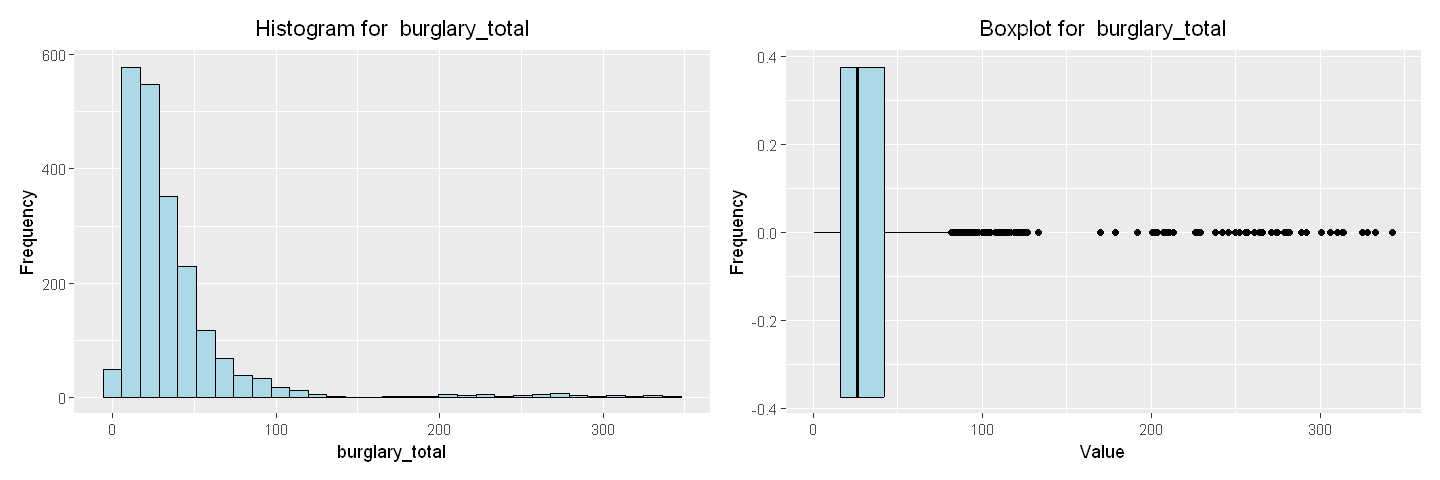

 SUMMARY STATISTICS FOR  ROBBERY_TOTAL  


            Mean    Minimum 1st Quartile     Median 3rd Quartile quantile_99
Value  12.578571   0.000000     3.000000   6.000000    12.000000  136.050000
         Maximum   Variance Standard Deviation Relative SD   Skewness
Value 270.000000 584.862332          24.183927    1.922629   5.541295
        Kurtosis
Value  40.331657


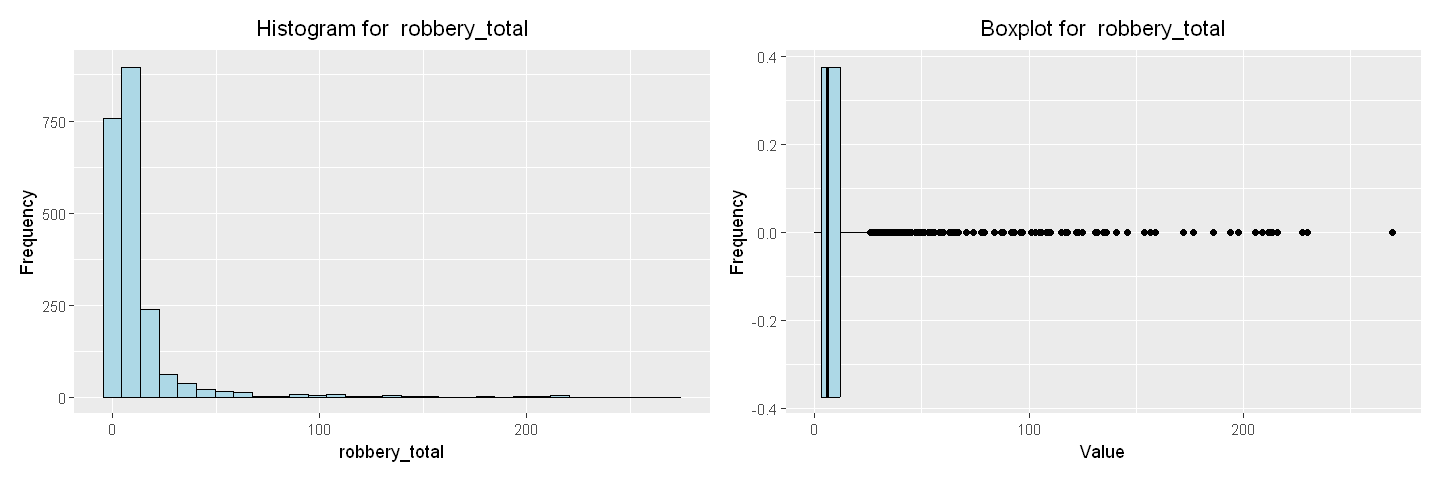

 SUMMARY STATISTICS FOR  THEFT_TOTAL  


              Mean      Minimum 1st Quartile       Median 3rd Quartile
Value 2.089271e+02 1.800000e+01 1.010000e+02 1.570000e+02 2.482500e+02
       quantile_99      Maximum     Variance Standard Deviation  Relative SD
Value 1.265110e+03 1.590000e+03 3.865099e+04       1.965985e+02 9.409909e-01
          Skewness     Kurtosis
Value 3.629921e+00 2.016145e+01


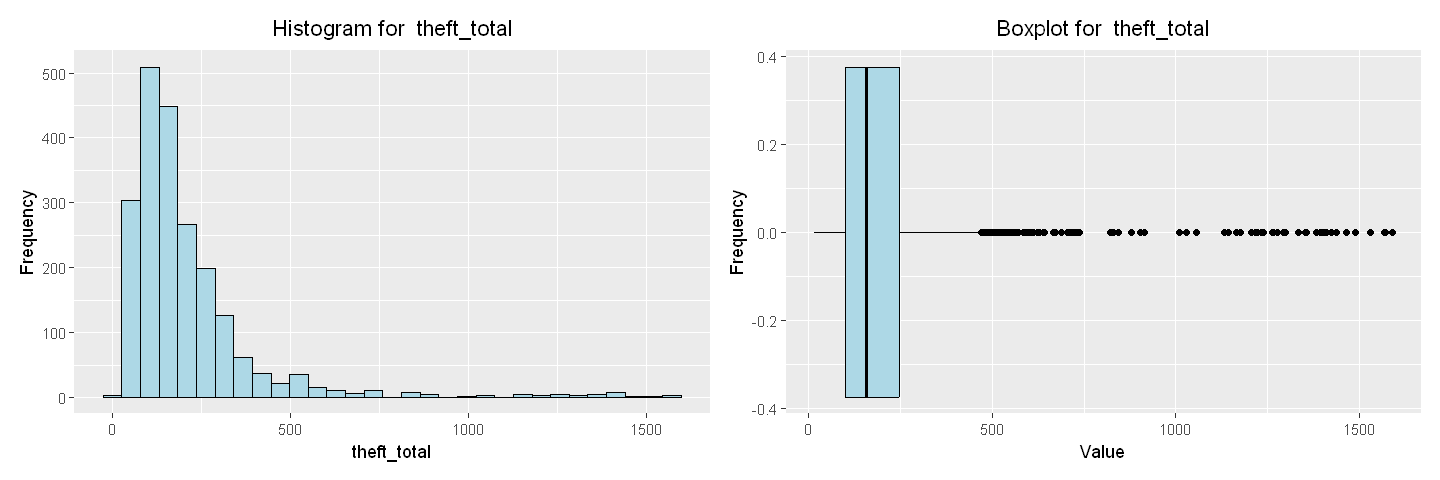

 SUMMARY STATISTICS FOR  FRAUD_TOTAL  


             Mean     Minimum 1st Quartile      Median 3rd Quartile quantile_99
Value   22.900476    0.000000     8.000000   14.000000    23.000000  257.010000
          Maximum    Variance Standard Deviation Relative SD    Skewness
Value  347.000000 1547.692329          39.340721    1.717900    5.529625
         Kurtosis
Value   35.737521


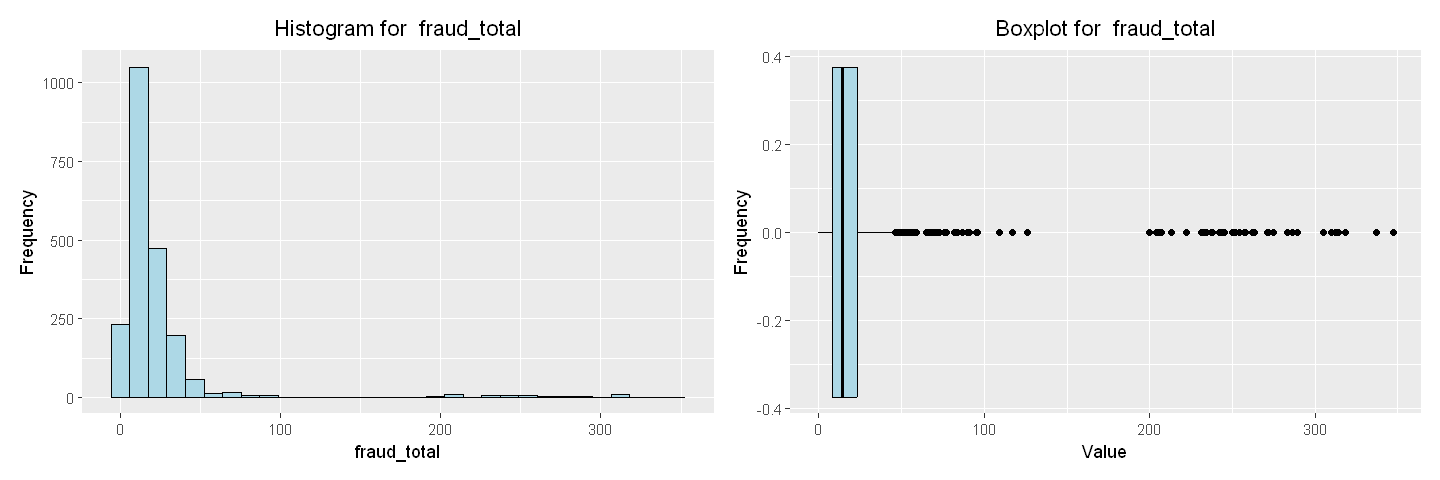

 SUMMARY STATISTICS FOR  CRIMINAL_DAMAGE_TOTAL  


              Mean      Minimum 1st Quartile       Median 3rd Quartile
Value   57.6271429    6.0000000   29.0000000   45.0000000   67.0000000
       quantile_99      Maximum     Variance Standard Deviation  Relative SD
Value  344.0400000  477.0000000 2798.8208923         52.9038835    0.9180376
          Skewness     Kurtosis
Value    3.7804122   21.5273065


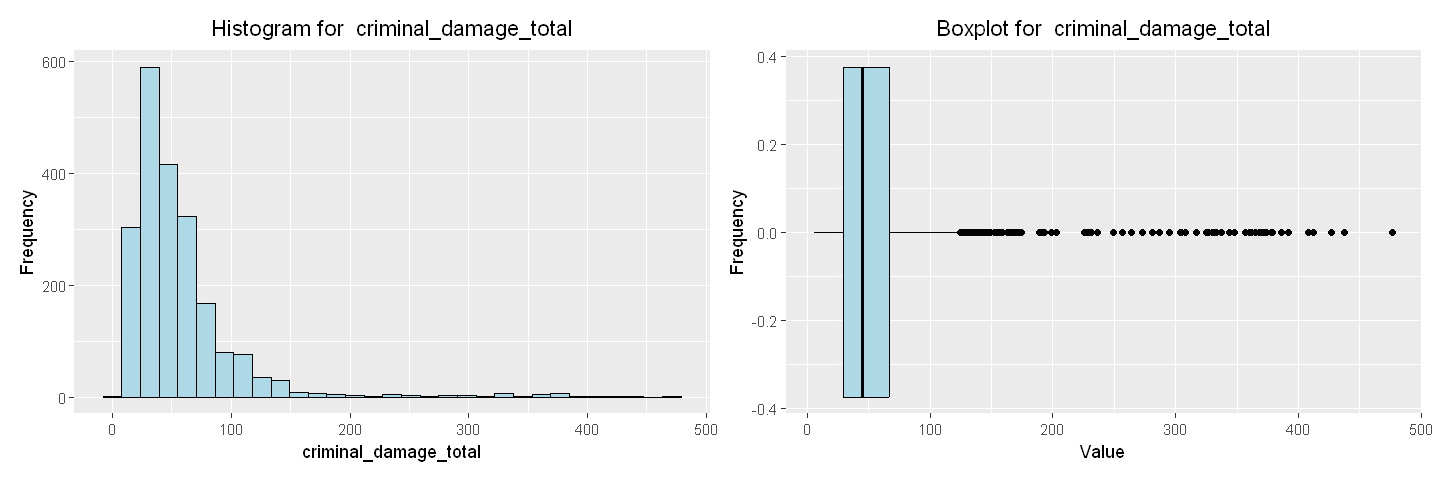

 SUMMARY STATISTICS FOR  DRUG_TOTAL  


              Mean      Minimum 1st Quartile       Median 3rd Quartile
Value   102.166190     4.000000    40.000000    65.000000   103.000000
       quantile_99      Maximum     Variance Standard Deviation  Relative SD
Value  1122.110000  1292.000000 26952.605526         164.172487     1.606916
          Skewness     Kurtosis
Value     5.403785    33.761743


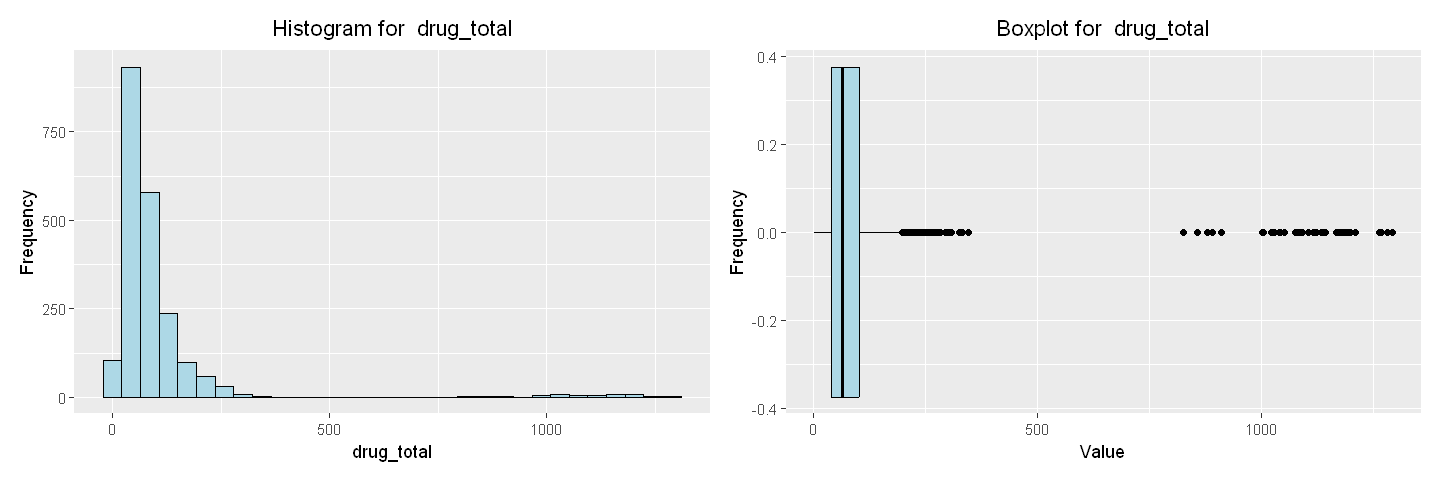

 SUMMARY STATISTICS FOR  PUBLIC_ORDER_TOTAL  


              Mean      Minimum 1st Quartile       Median 3rd Quartile
Value    97.887143     5.000000    44.000000    71.000000   110.250000
       quantile_99      Maximum     Variance Standard Deviation  Relative SD
Value   683.020000   949.000000 11394.473679         106.744900     1.090489
          Skewness     Kurtosis
Value     4.151459    24.059059


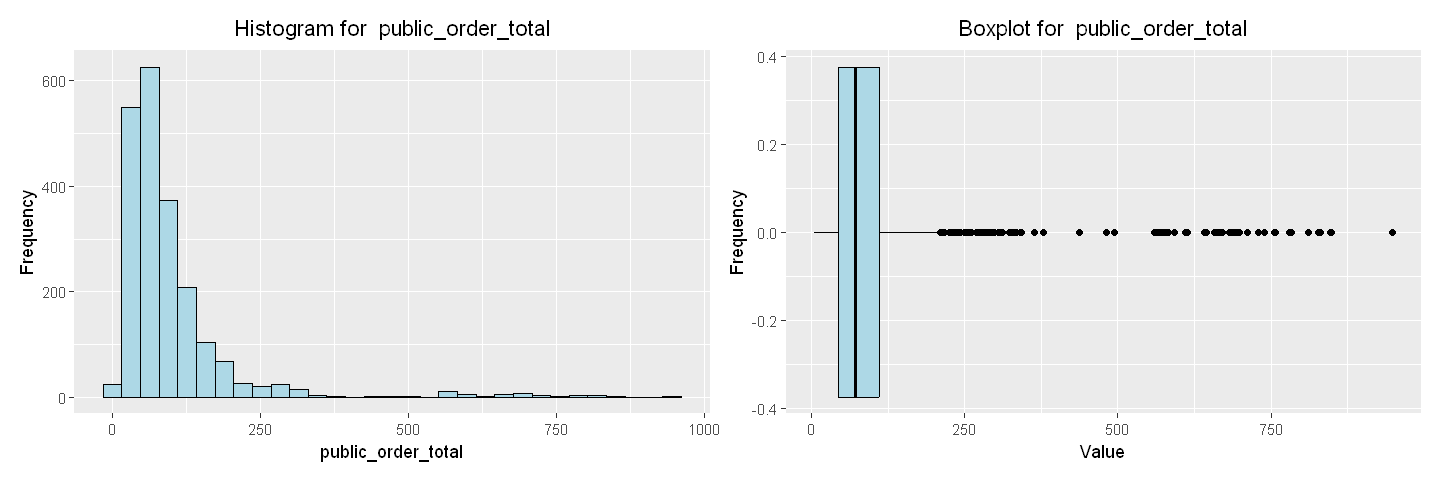

 SUMMARY STATISTICS FOR  OTHERS_TOTAL  


             Mean     Minimum 1st Quartile      Median 3rd Quartile quantile_99
Value   39.405714    0.000000    10.000000   19.000000    39.000000  341.700000
          Maximum    Variance Standard Deviation Relative SD    Skewness
Value  669.000000 4849.691439          69.639726    1.767249    5.551967
         Kurtosis
Value   41.813137


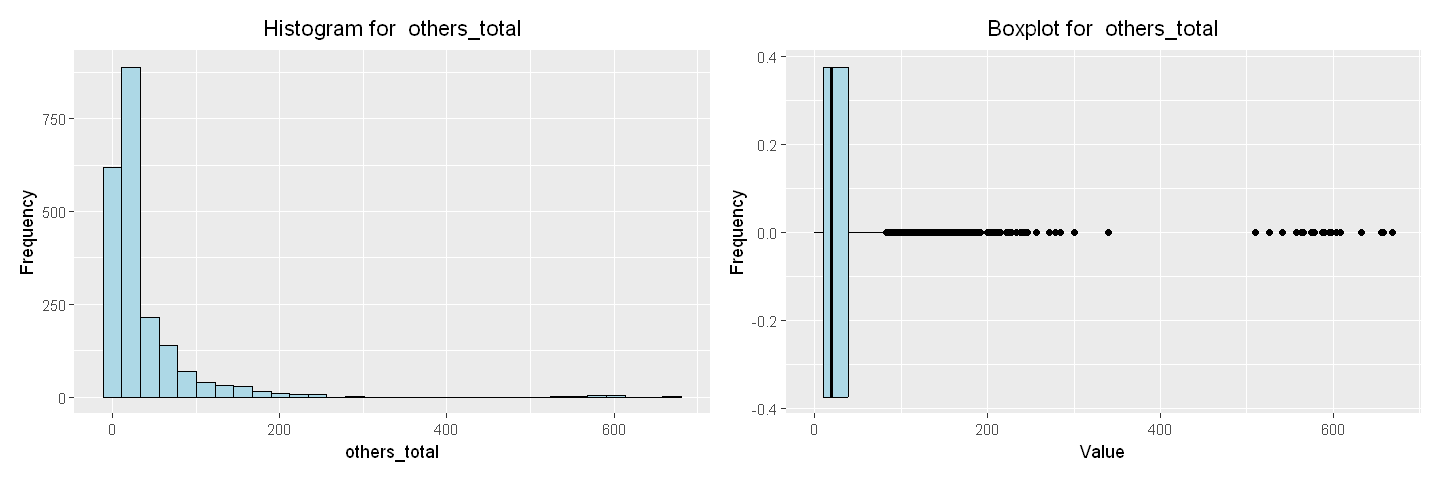

 SUMMARY STATISTICS FOR  MOTORING_TOTAL  


              Mean      Minimum 1st Quartile       Median 3rd Quartile
Value   218.594762     1.000000   106.000000   161.000000   243.000000
       quantile_99      Maximum     Variance Standard Deviation  Relative SD
Value  1527.190000  2294.000000 55134.772817         234.807949     1.074170
          Skewness     Kurtosis
Value     4.587458    27.980819


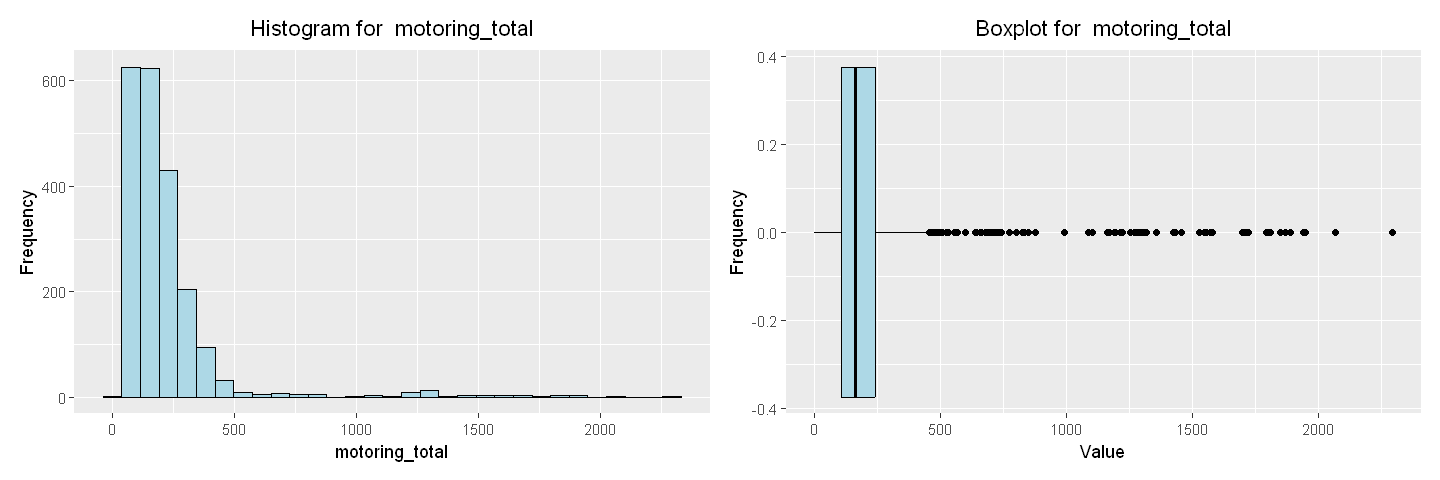

 SUMMARY STATISTICS FOR  AREA  


              Mean      Minimum 1st Quartile       Median 3rd Quartile
Value 1.556786e+03 2.490000e+02 8.430000e+02 1.284500e+03 1.957000e+03
       quantile_99      Maximum     Variance Standard Deviation  Relative SD
Value 6.081000e+03 6.081000e+03 1.203441e+06       1.097015e+03 7.046664e-01
          Skewness     Kurtosis
Value 1.925614e+00 7.960395e+00


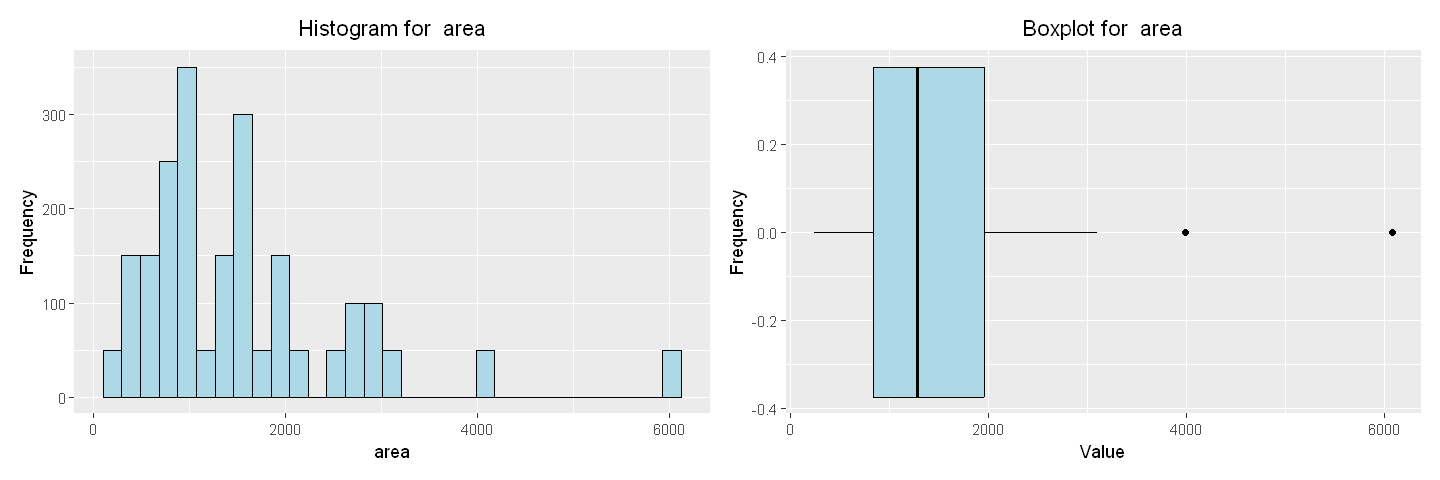

 SUMMARY STATISTICS FOR  YEAR  


              Mean      Minimum 1st Quartile       Median 3rd Quartile
Value 2.015800e+03 2.014000e+03 2.015000e+03 2.016000e+03 2.017000e+03
       quantile_99      Maximum     Variance Standard Deviation  Relative SD
Value 2.018000e+03 2.018000e+03 1.960934e+00       1.400333e+00 6.946788e-04
          Skewness     Kurtosis
Value 1.836735e-01 1.752187e+00


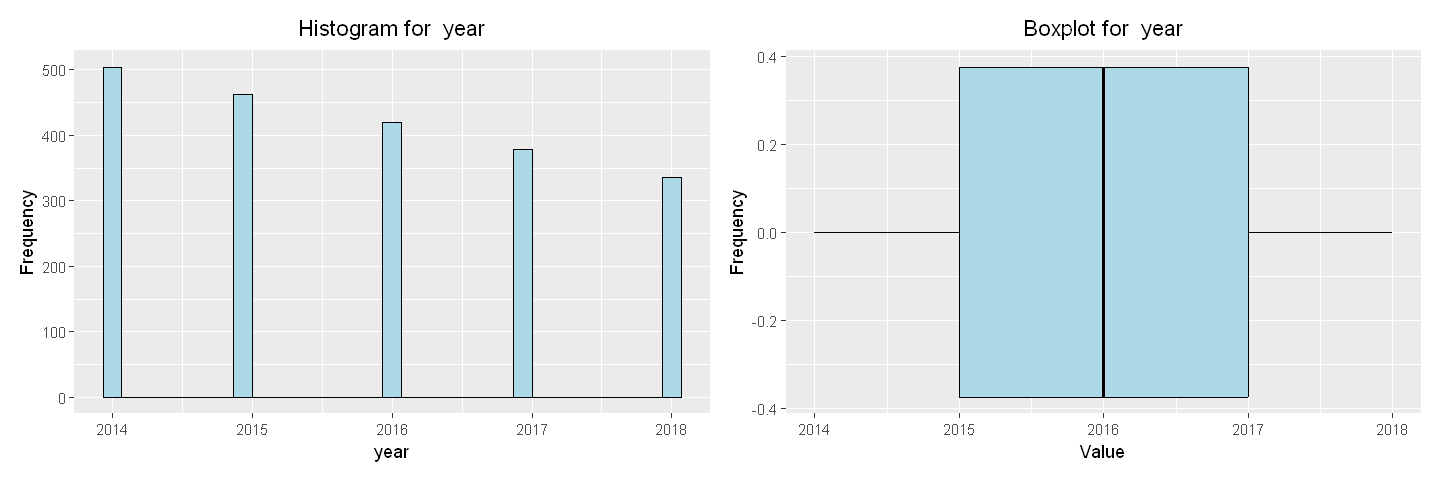

 SUMMARY STATISTICS FOR  POPULATION  


              Mean      Minimum 1st Quartile       Median 3rd Quartile
Value 1.748728e+06 3.642354e+05 7.917665e+05 1.395074e+06 2.116739e+06
       quantile_99      Maximum     Variance Standard Deviation  Relative SD
Value 9.120223e+06 9.211653e+06 2.427131e+12       1.557925e+06 8.908902e-01
          Skewness     Kurtosis
Value 2.864906e+00 1.292682e+01


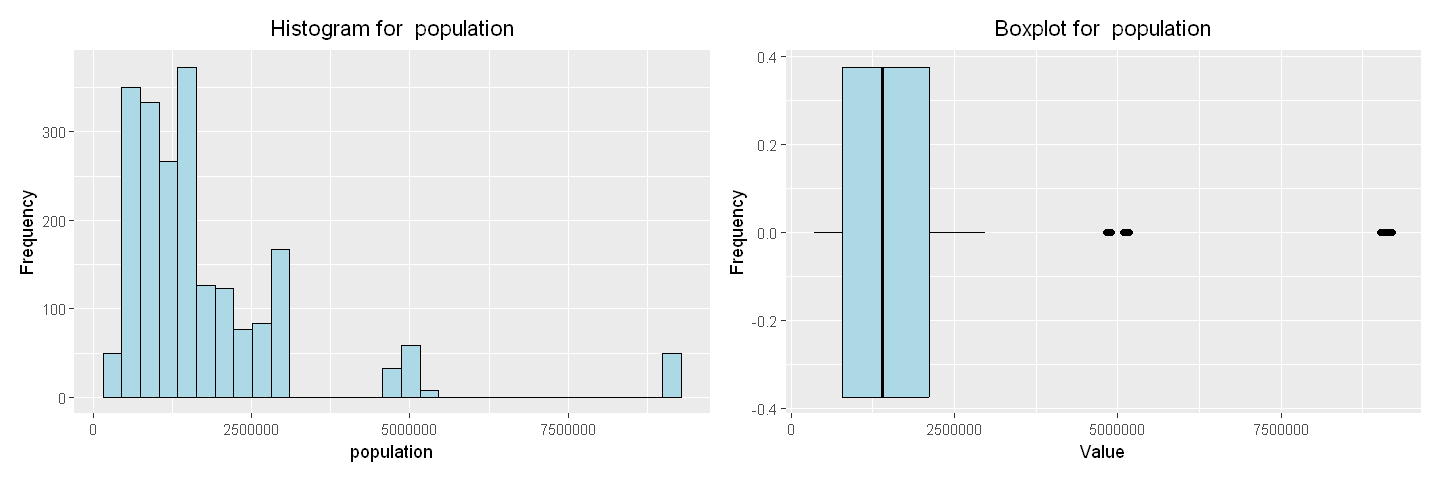

 SUMMARY STATISTICS FOR  POPULATION_DENSITY  


              Mean      Minimum 1st Quartile       Median 3rd Quartile
Value 1.781001e+03 1.862312e+02 5.234353e+02 1.120681e+03 1.783042e+03
       quantile_99      Maximum     Variance Standard Deviation  Relative SD
Value 1.502508e+04 1.517571e+04 6.487490e+06       2.547055e+03 1.430125e+00
          Skewness     Kurtosis
Value 3.773815e+00 1.853598e+01


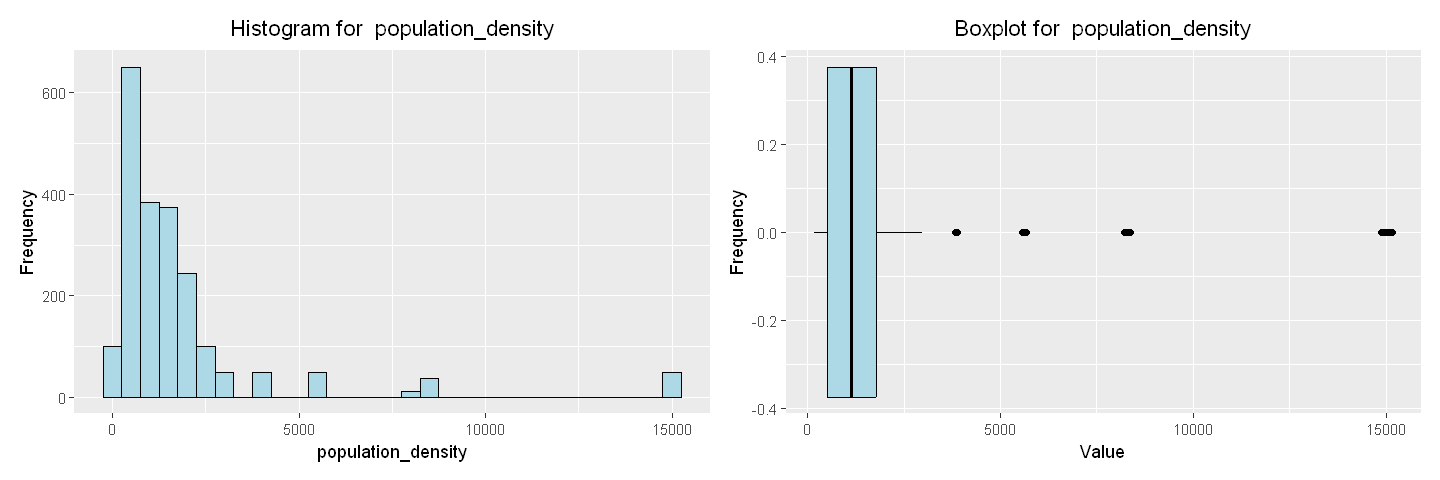

In [368]:

for (col in names(combined_data_df)) {
  if (!grepl("percent", col)){
    # Check if the column is numeric or integer
    if (is.numeric(combined_data_df[[col]]) || is.integer(combined_data_df[[col]])) {
      # Add the column name to the selected columns vector
      feature_visualization(col)
    }
  }
}

In [369]:
dim(combined_data_df)

[1] 2100   44

In [370]:
#let us only keep rows that are within the 99th percentile for homicide_conviction and robbery_total

#we are doing this cos those the 2 columns with the furthest outliers in terms of comapring the max value to the 99th percentile

combined_data_df <- combined_data_df %>% filter(homicide_conviction < quantile(homicide_conviction, probs = 0.99) & robbery_total < quantile(robbery_total, probs = 0.99))

In [371]:
#we have removed the most extreme outliers and are left with 98% of the data.

dim(combined_data_df)

[1] 2063   44

 SUMMARY STATISTICS FOR  HOMICIDE_CONVICTION  


           Mean   Minimum 1st Quartile    Median 3rd Quartile quantile_99
Value  1.641784  0.000000     0.000000  1.000000     2.000000   11.380000
        Maximum  Variance Standard Deviation Relative SD  Skewness  Kurtosis
Value 15.000000  5.014684           2.239349    1.363973  2.501784 11.293561


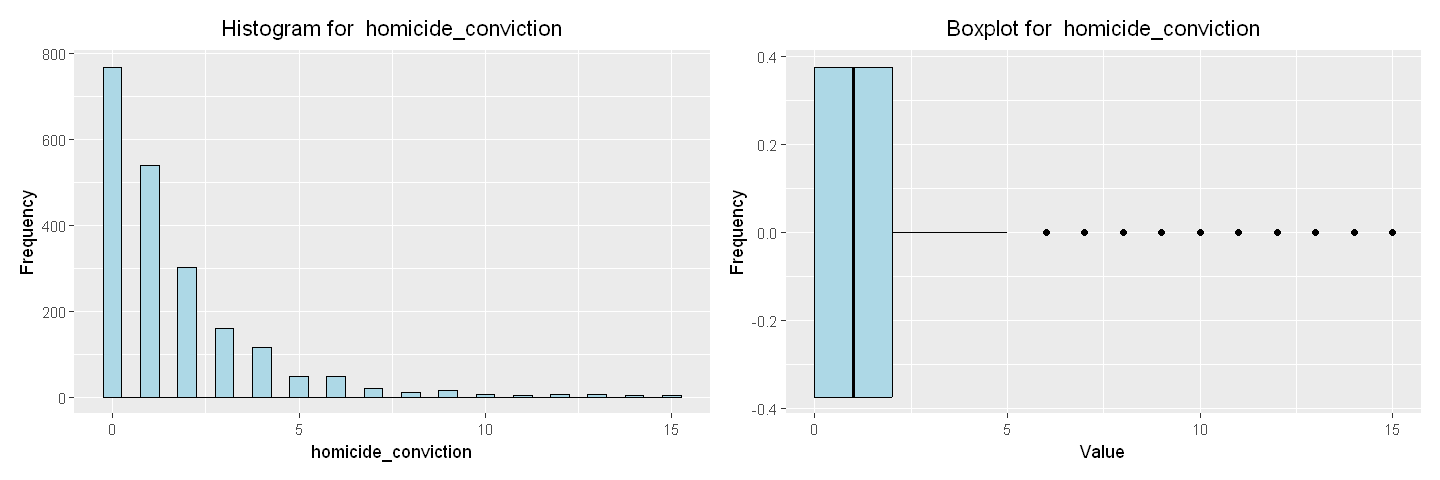

 SUMMARY STATISTICS FOR  ROBBERY_TOTAL  


            Mean    Minimum 1st Quartile     Median 3rd Quartile quantile_99
Value  10.140572   0.000000     3.000000   6.000000    12.000000   75.520000
         Maximum   Variance Standard Deviation Relative SD   Skewness
Value 136.000000 193.240172          13.901085    1.370838   4.156280
        Kurtosis
Value  26.171680


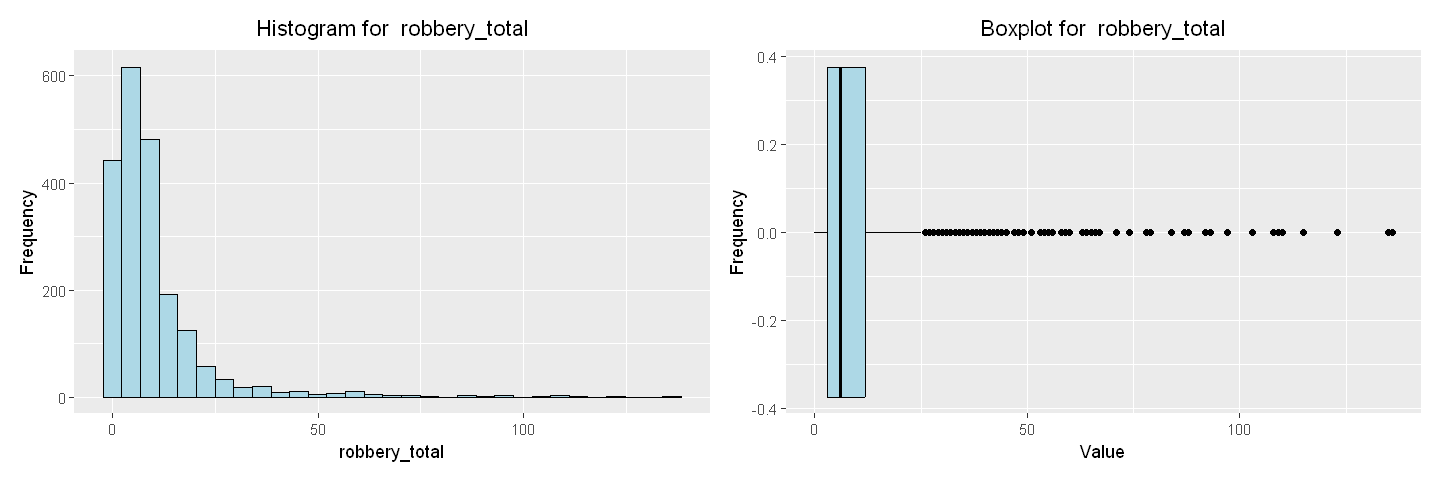

In [372]:
#let us revisualize the 2 columns

feature_visualization("homicide_conviction")
feature_visualization("robbery_total")

In [373]:
#the outliers are no longer as extreme as before, so we can use these columns for our analysis

Talk about each of your columns too. cos this is the univariant analysis

## Univariate and Multivariate Analysis

### Let us look at how the crimes is trending within regions

In [374]:
bar_plot <- function(df, x, y, title, x_label, y_label, fill_color = "#1f77b4", fill_aes = NULL, position = "stack", scale_fill_manual_value = NULL, text_angle = 0){
  
   if (!is.null(fill_aes)) {
    # Create a scatter plot
  plot <- ggplot(df, aes(x = .data[[x]], y = .data[[y]], fill = .data[[fill_aes]])) +
    geom_bar(stat = "identity", position = position) +
    labs(title = title, x = x_label, y = y_label) +
    scale_fill_manual(values = scale_fill_manual_value)+
    #custom_theme
    theme(plot.title = element_text(hjust = 0.5, face = "bold", size = 20),
    axis.text.x = element_text(angle = text_angle, hjust = 1))
    
  }

  else{
     # Create a scatter plot
  plot <- ggplot(df, aes(x = .data[[x]], y = .data[[y]])) +
    geom_bar(stat = "identity", fill = fill_color, position = position) +
    labs(title = title, x = x_label, y = y_label) +
    scale_fill_manual(values = scale_fill_manual_value)+
    #custom_theme
    theme(plot.title = element_text(hjust = 0.5, face = "bold", size = 20),
    axis.text.x = element_text(angle = text_angle, hjust = 0.5))
    
  } 
  # Display the plot
  print(plot)
  
}





In [375]:
total_columns <- grep("total", colnames(combined_data_df), value = TRUE)

total_columns

[1] "homicide_total"               "offence_against_person_total"
 [3] "sexual_offence_total"         "burglary_total"              
 [5] "robbery_total"                "theft_total"                 
 [7] "fraud_total"                  "criminal_damage_total"       
 [9] "drug_total"                   "public_order_total"          
[11] "others_total"                 "motoring_total"

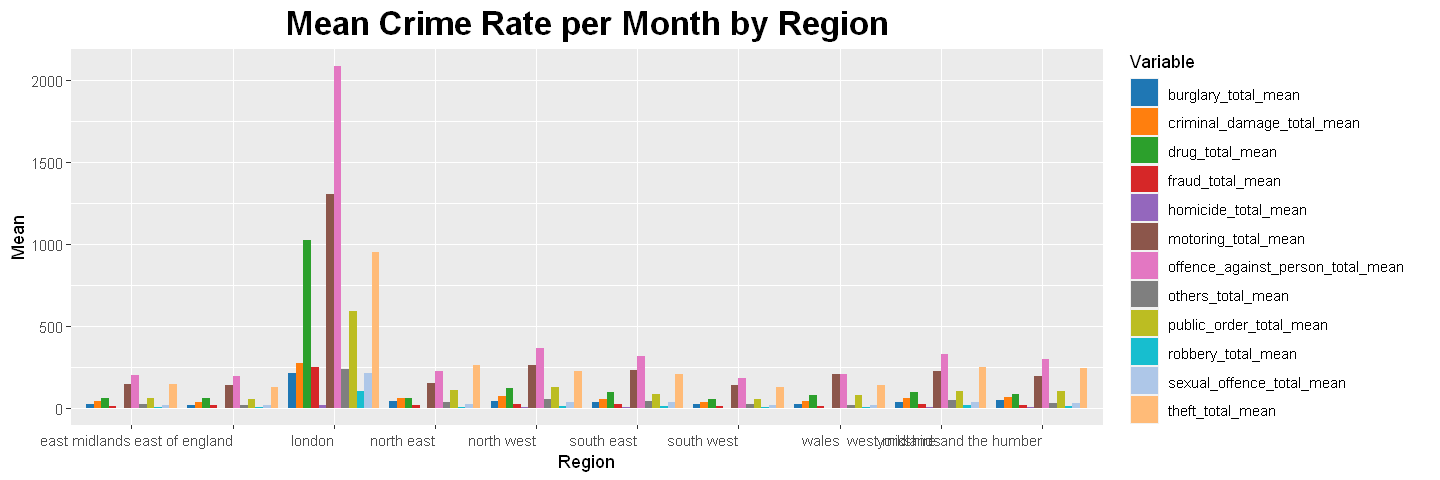

In [376]:
#let us plot a bar chart of the average crime rate for each region



# Step 1: Calculate the means of crime rate and population density by region
means_by_region <- combined_data_df %>%
  group_by(region) %>%
  summarize(homicide_total_mean = mean(homicide_total),
            fraud_total_mean = mean(fraud_total),
            offence_against_person_total_mean = mean(offence_against_person_total),
            sexual_offence_total_mean = mean(sexual_offence_total),
            burglary_total_mean = mean(burglary_total),
            robbery_total_mean = mean(robbery_total),
            theft_total_mean = mean(theft_total),
            criminal_damage_total_mean = mean(criminal_damage_total),
            drug_total_mean = mean(drug_total),
            public_order_total_mean = mean(public_order_total),
            others_total_mean = mean(others_total),
            motoring_total_mean = mean(motoring_total)
            )

# Step 2: Reshape the data to create a tidy format
tidy_means <- means_by_region %>%
  pivot_longer(cols = c(homicide_total_mean, fraud_total_mean, offence_against_person_total_mean, sexual_offence_total_mean,
                        burglary_total_mean, robbery_total_mean, theft_total_mean, criminal_damage_total_mean, drug_total_mean, 
                        public_order_total_mean, others_total_mean, motoring_total_mean),
               names_to = "Variable",
               values_to = "Mean")

# Step 3: Create a bar plot with multiple columns
colors <- c("#1f77b4", "#ff7f0e", "#2ca02c", "#d62728", "#9467bd", "#8c564b", "#e377c2", "#7f7f7f", "#bcbd22", "#17becf", "#aec7e8", "#ffbb78")


 bar_plot(df = tidy_means, x= "region", y = "Mean", title = "Mean Crime Rate per Month by Region", 
 x_label = "Region", y_label = "Mean", fill_aes = "Variable", position = "dodge", scale_fill_manual_value= colors)



We can see from this plot that:

1. London has by far the most crime rate on almost all crime types with the variance being so high compared to other regions 
2. We also see that Offence against person is the highest crime category in all regions followed by motoring or theft in most regions 
3. The lowest average crime category is homicide with close to 0 in some regions. We would need to plot a separate bar chart for homicide to get more indepth details on this as the scale here makes it hard to interprete.
4. To see which other regions have high crime rates, we have to plot each of the crime categories seperately (and possibly exclude London if necessary)
5. Drug offences are also quite high

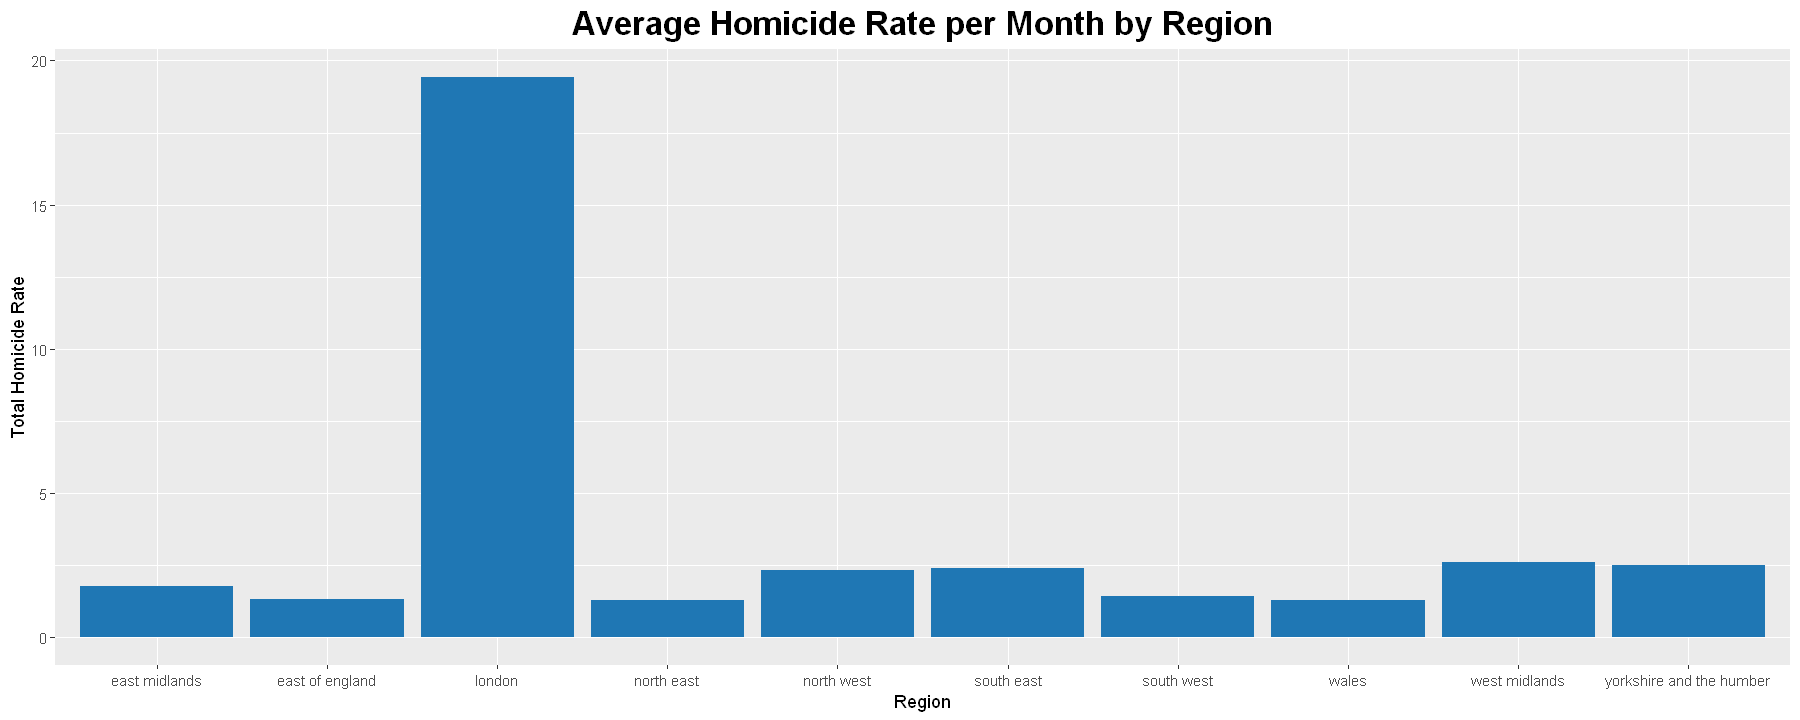

In [377]:
#let us plot a bar chart for just homicide_total

# Step 1: Calculate the average crime rate by region
average_crime_rate <- aggregate(homicide_total ~ region, data = combined_data_df, FUN = mean)

# Step 2: Create a bar chart
# Set the plot size
  options(repr.plot.width = 15, repr.plot.height = 6)

  bar_plot(average_crime_rate, "region", "homicide_total", "Average Homicide Rate per Month by Region", "Region",
 "Total Homicide Rate")



We see that the data is abit skewed because london rate is so high, let us now exclude re

In [378]:
#let us remove london in our analysis as we have established that it has the highest crime rate, let us see how others compare

df_no_london <- combined_data_df %>% filter(region != "london")

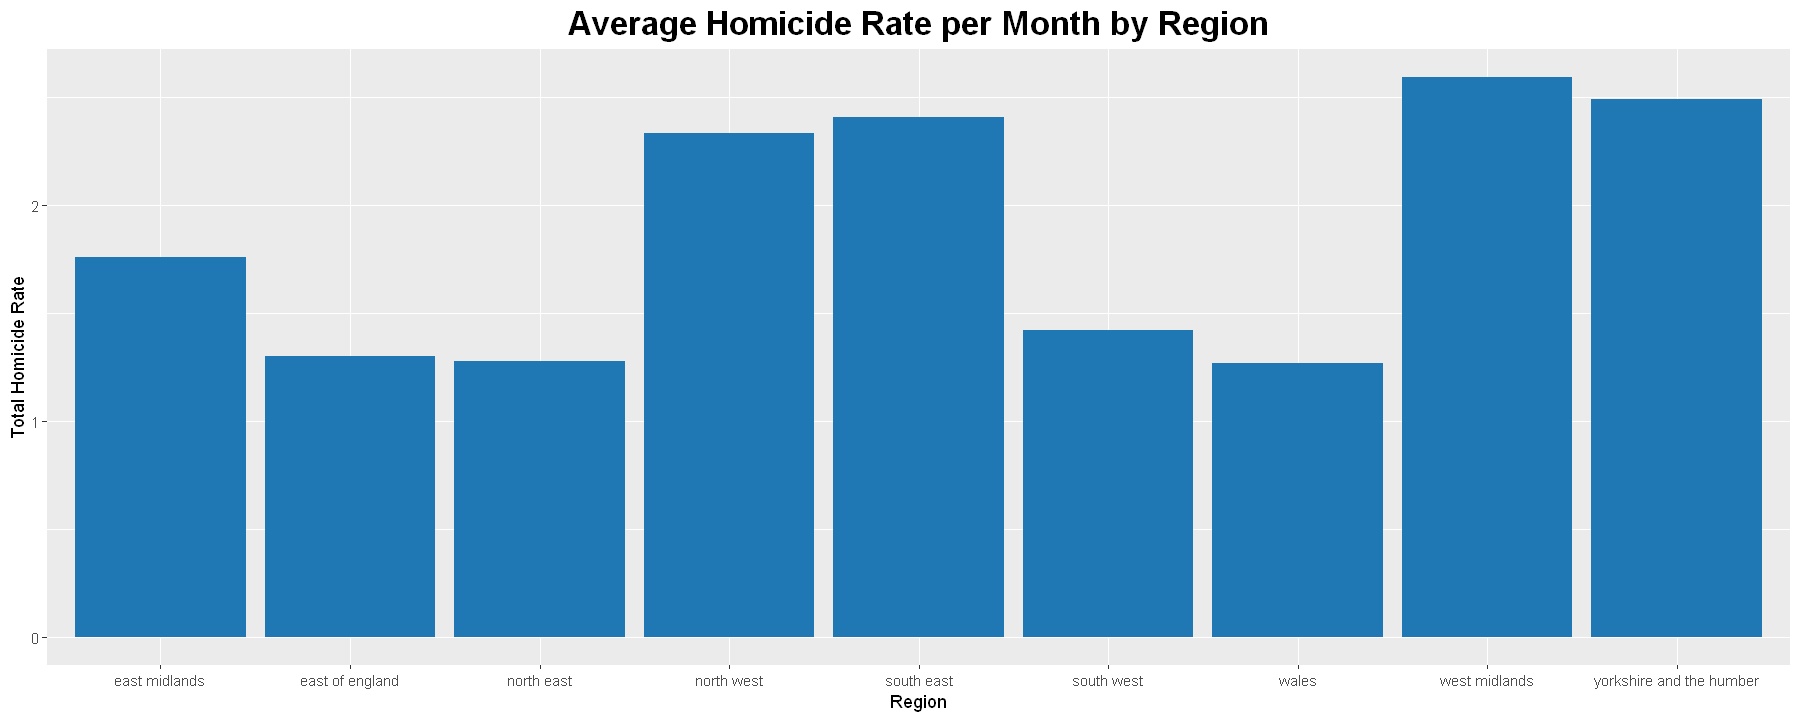

In [379]:
#let us plot a bar chart for just homicide_conviction

# Step 1: Calculate the average crime rate by region
average_crime_rate <- aggregate(homicide_total ~ region, data = df_no_london, FUN = mean)

# Step 2: Create a bar chart
bar_plot(average_crime_rate, "region", "homicide_total", "Average Homicide Rate per Month by Region", "Region",
 "Total Homicide Rate")


We can see that apart from London, Homicide rate is followed by:

1. West Midlands and Yorkshore and the Humber, North West and South East followed closely with an average homicide rate of just over 2 per month

2. North East and Wales are the safest areas in the UK in terms of homicide with just slightly above 1 homicide per month

In [380]:
#Let us run this for all other crime categories (excluding London as previously done)

In [381]:
total_cols <- grep("total", colnames(df_no_london), value = TRUE)

total_cols



[1] "homicide_total"               "offence_against_person_total"
 [3] "sexual_offence_total"         "burglary_total"              
 [5] "robbery_total"                "theft_total"                 
 [7] "fraud_total"                  "criminal_damage_total"       
 [9] "drug_total"                   "public_order_total"          
[11] "others_total"                 "motoring_total"

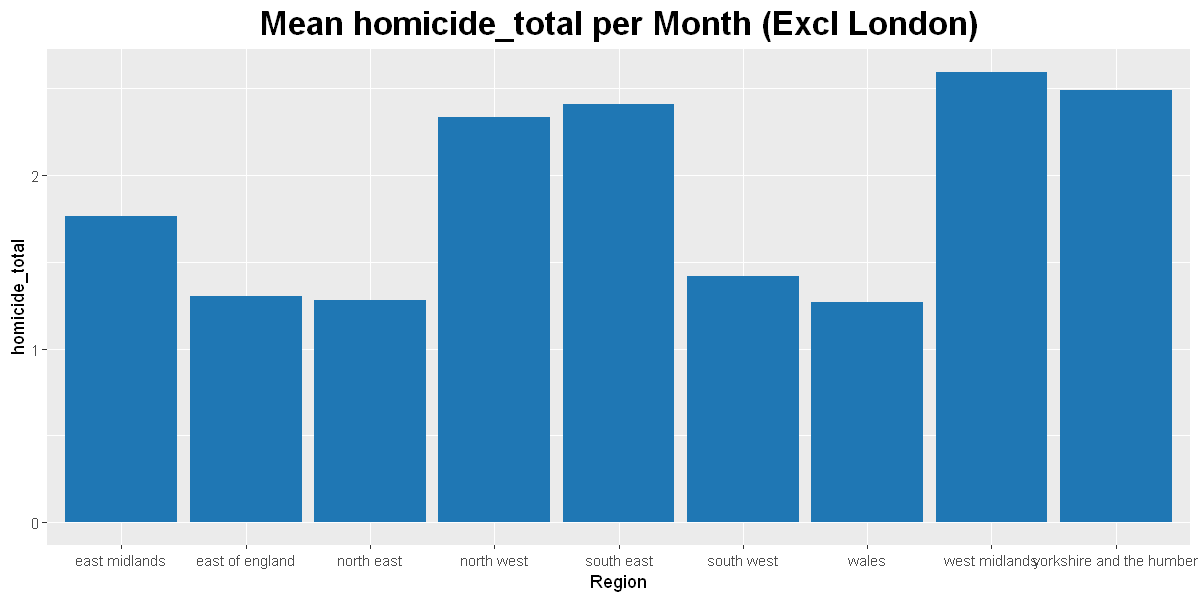

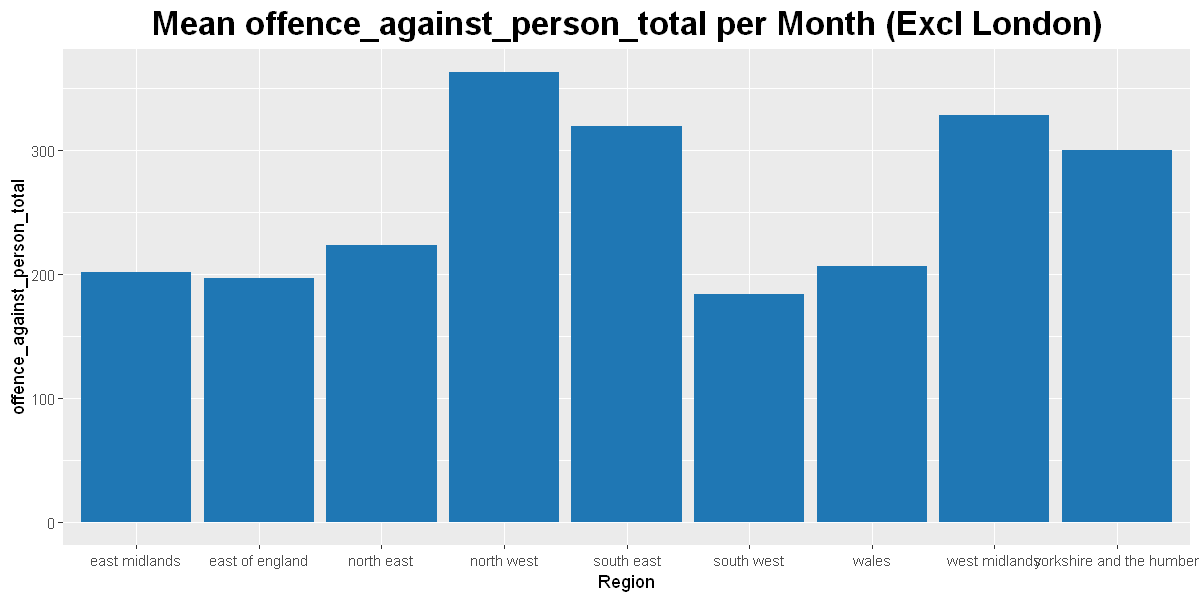

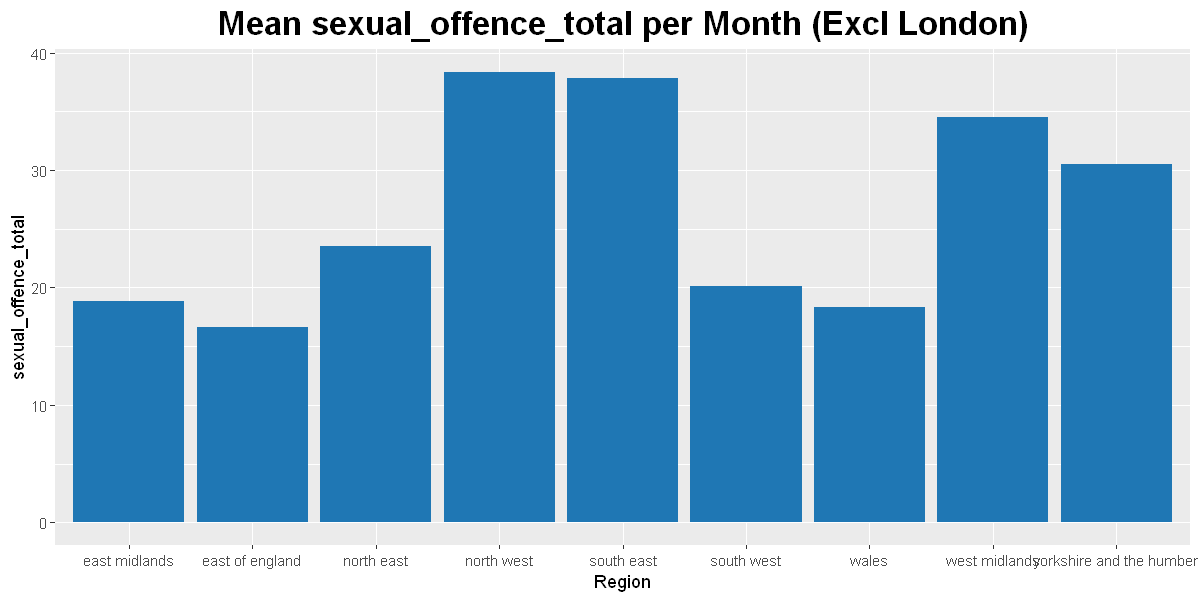

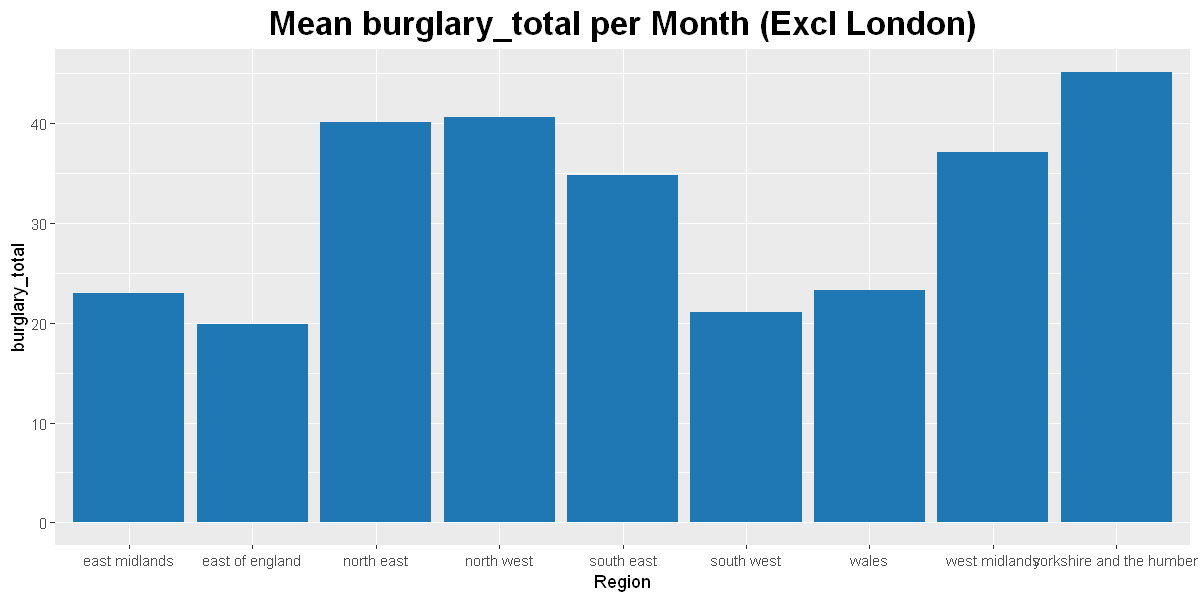

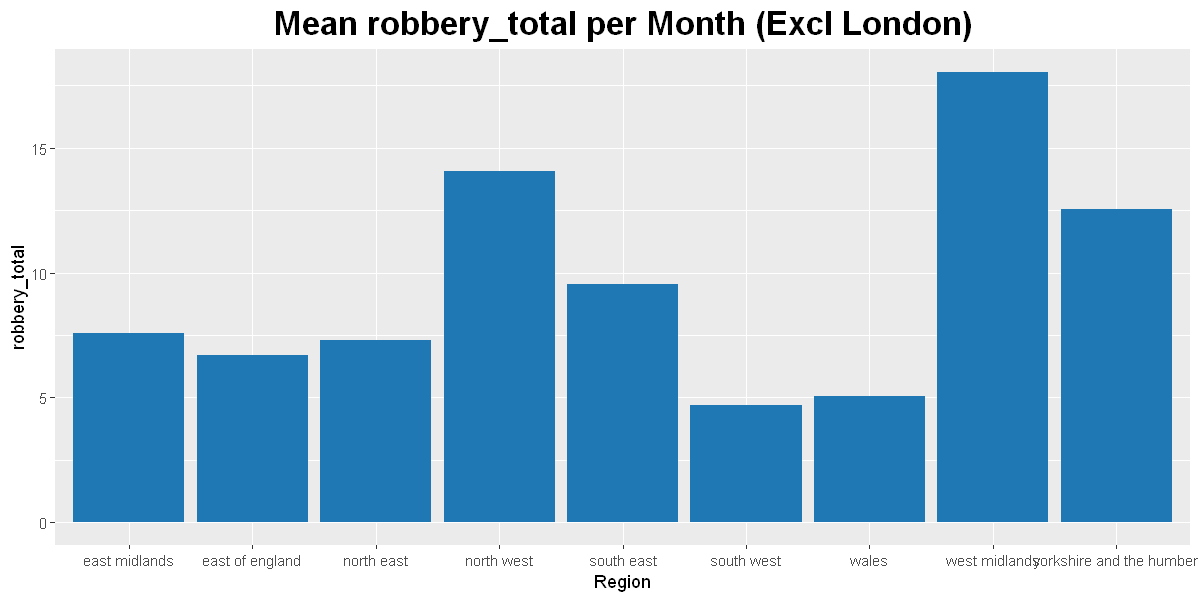

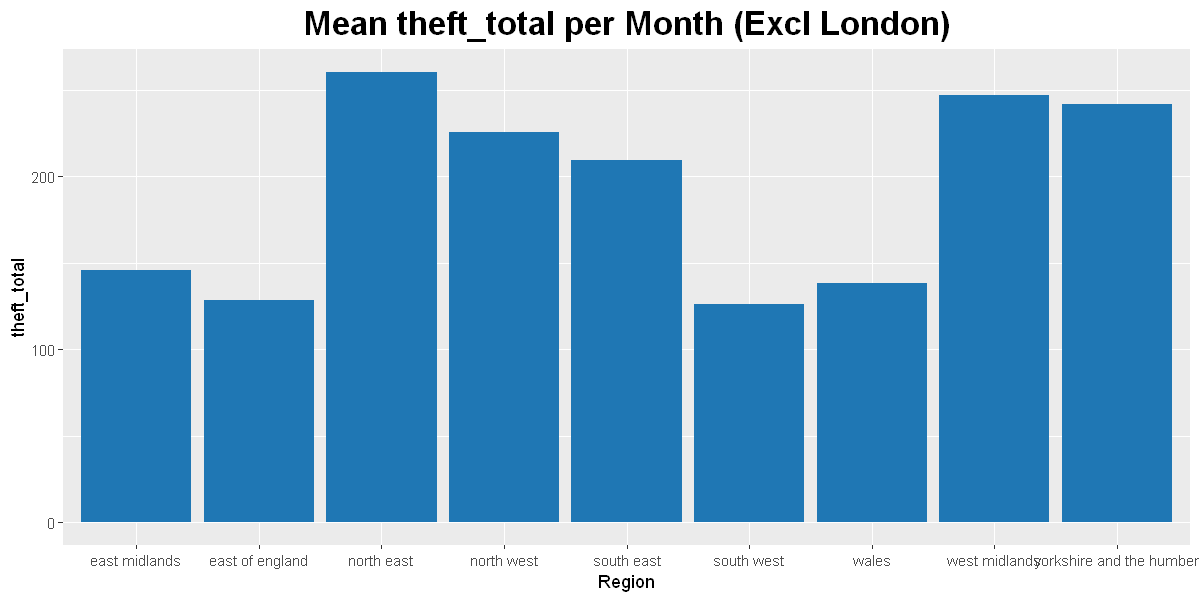

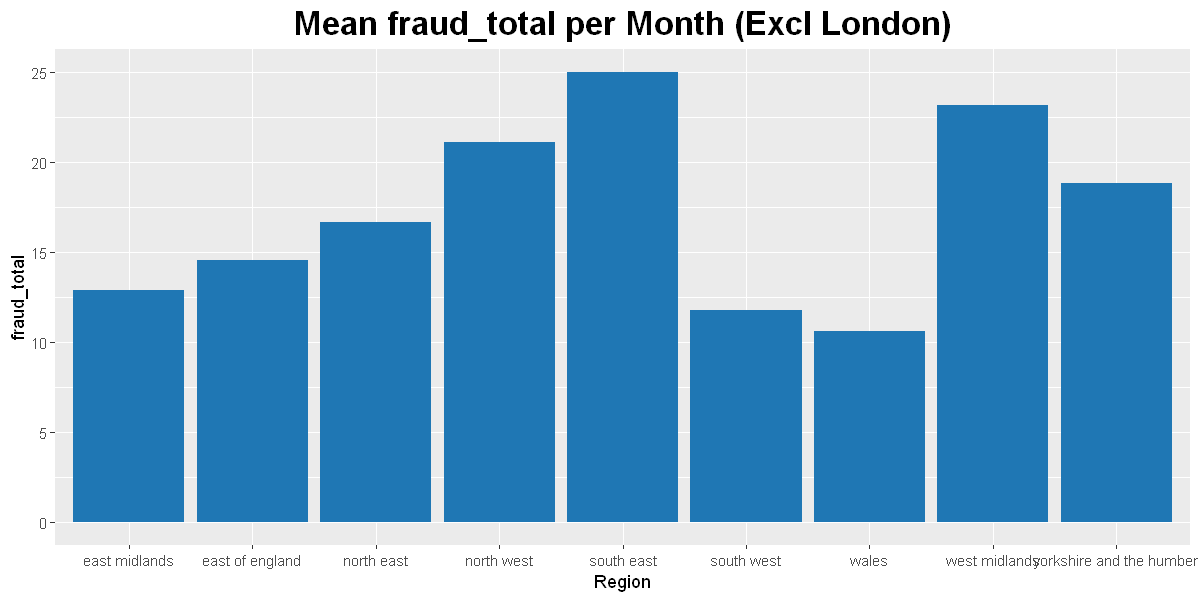

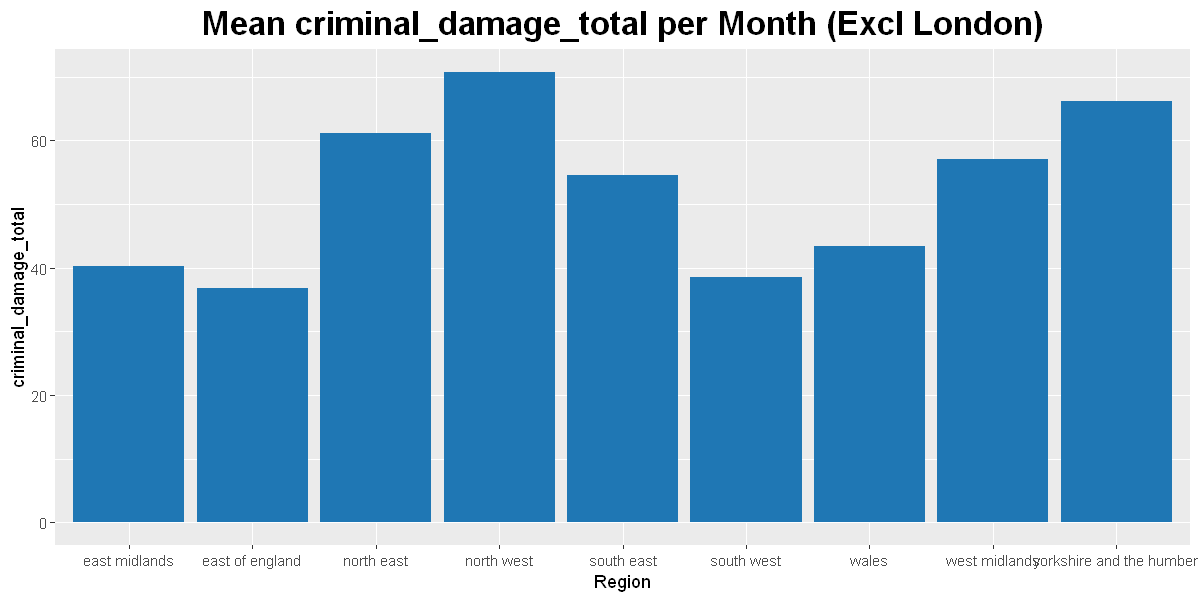

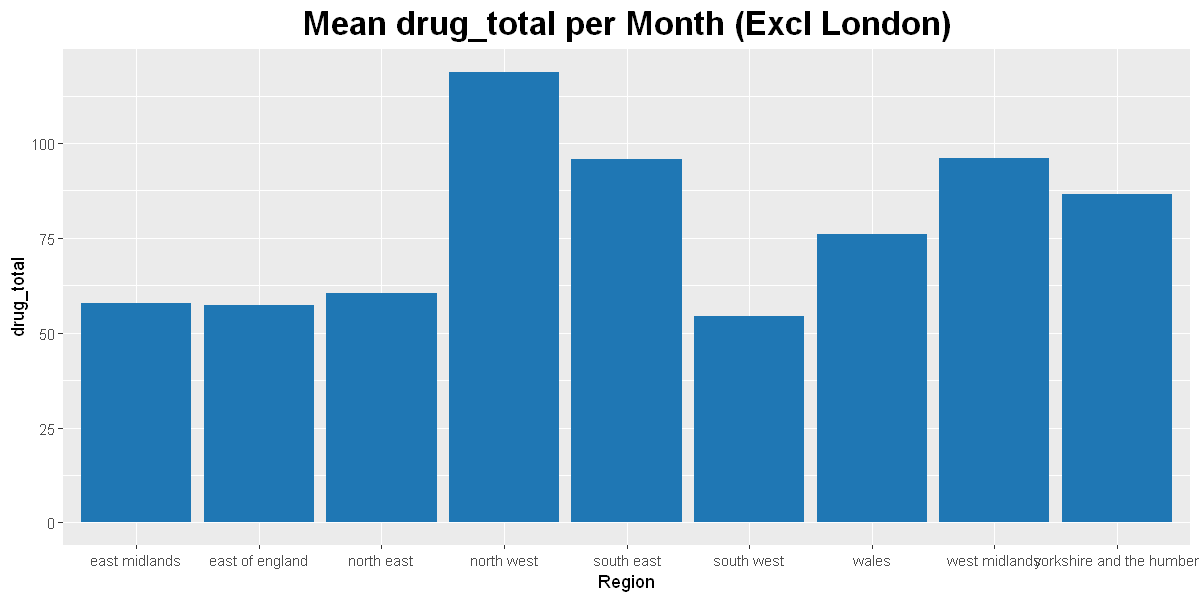

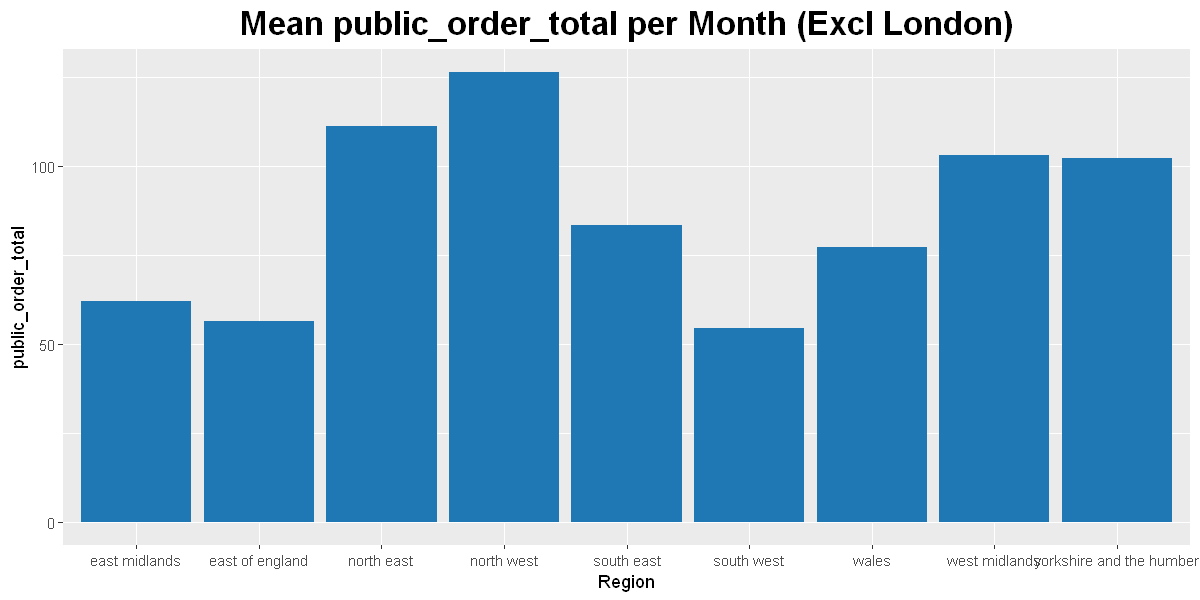

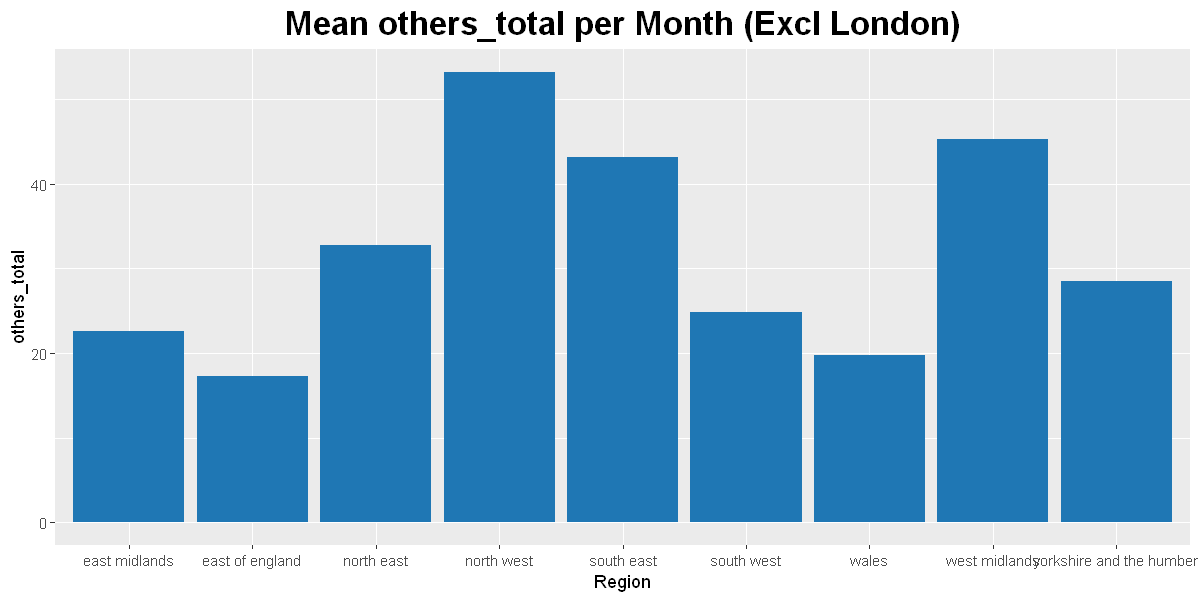

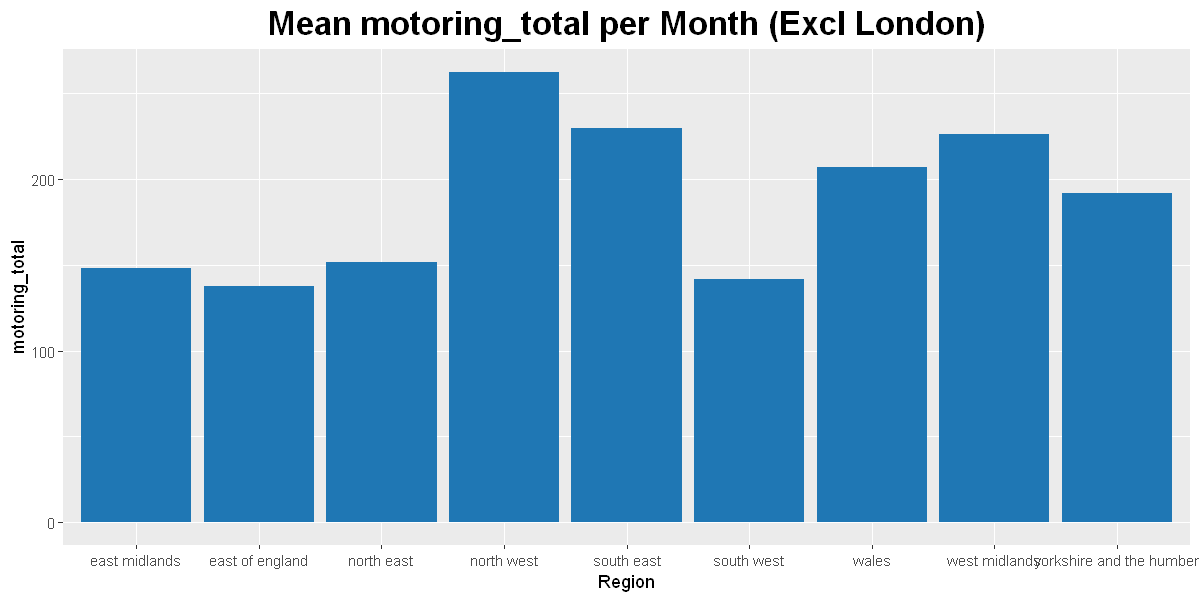

In [382]:

for (col_name in total_cols) {
  average_crime_rate <- df_no_london %>%
    group_by(region) %>%
    summarize(mean_value = mean(!!sym(col_name)))
  
  # Create a bar chart
  options(repr.plot.width = 10, repr.plot.height = 5)

  bar_plot(average_crime_rate, "region", "mean_value", 
  title =  paste("Mean", col_name, "per Month (Excl London)"), 
  x_label = "Region",
   y_label =  col_name)
  
  # # Display the bar chart
  # print(bar_chart)
}



We see that for 

### Offence Against Person

1.	Northwest has the highest rate with over 350 per  month , followed by West midlands and south east
2.	The safest being South West with below 200

### Sexual Offence

1.	North west and south east are the highest with over 35 cases per month
2.	The safest region is east of England with less than 20 cases per month

### Bulgarly
1.	Yorkshire and the Humber has the highest occurrence of burglary per month with about 45 cases per month
2.	East of England and south west are the safest regions with just about 20 burglary per month

### Robbery
1.	West midlands has the highest robbery occurrence by farat over 15 cases per month
2.	The safest region is south west

### Fraud
1.	South east has the highest occurrence here with about 25 cases per month
2.	While wales is the safest with about 10 per month

### Criminal Damage
1.	North west and Yorkshire and the Humber has the highest cases of robbery
2.	While the east of England and south west have the least occurrence

### Drugs
1.	North west has the highest
2.	Safest – south west

### Public order
1.	North west and north east – above 100
2.	Safest – south west and east of england

### Motoring 

1.	North west – highest – close to 300
2.	East of England and south west – 

### Others
1.	North west and west midlands
2.	Safest – wales and east of England



### In Conclusion

We can see from all the crimes, that it seems the places with the highest crime rates are:

1.	London
2.	North West
3.	West Midlands

Wile the top safest regions are:
1.	Southwest
2.	East of England
3.	Wales


Let us confirm this is by plotting a bar chart of the regions against the total crime rate




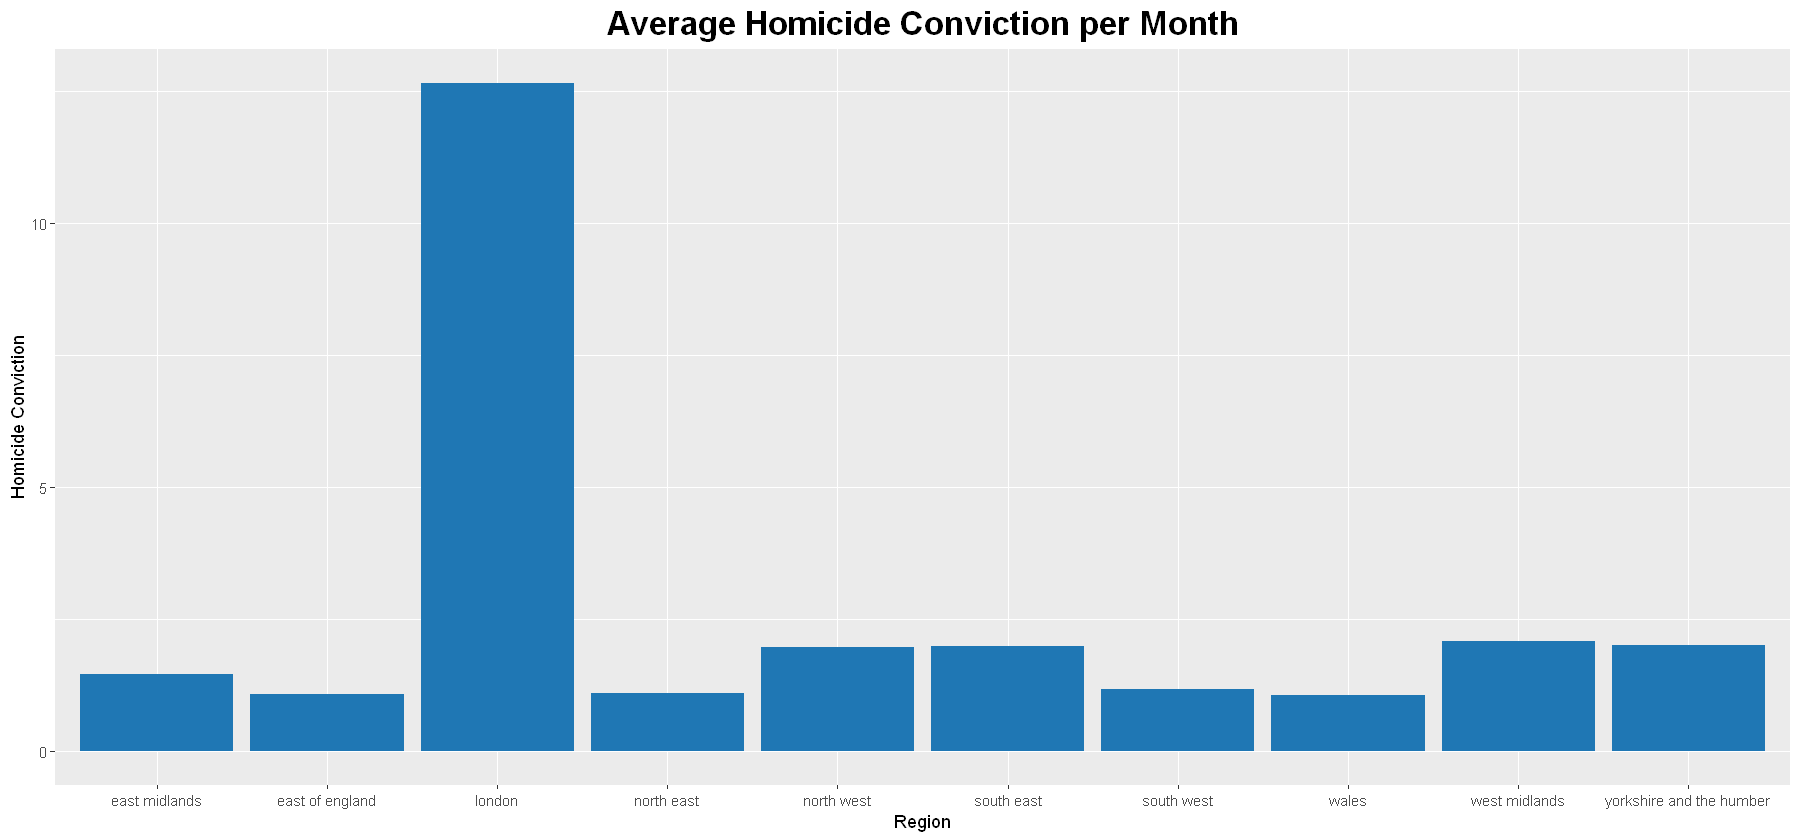

In [383]:
#let us plot a bar chart for just homicide_conviction

# Step 1: Calculate the average crime rate by region
average_crime_rate <- aggregate(homicide_conviction ~ region, data = combined_data_df, FUN = mean)

# Step 2: Create a bar chart
options(repr.plot.width = 15, repr.plot.height = 7)
  
bar_plot(average_crime_rate, "region", "homicide_conviction", "Average Homicide Conviction per Month", "Region",
 "Homicide Conviction")




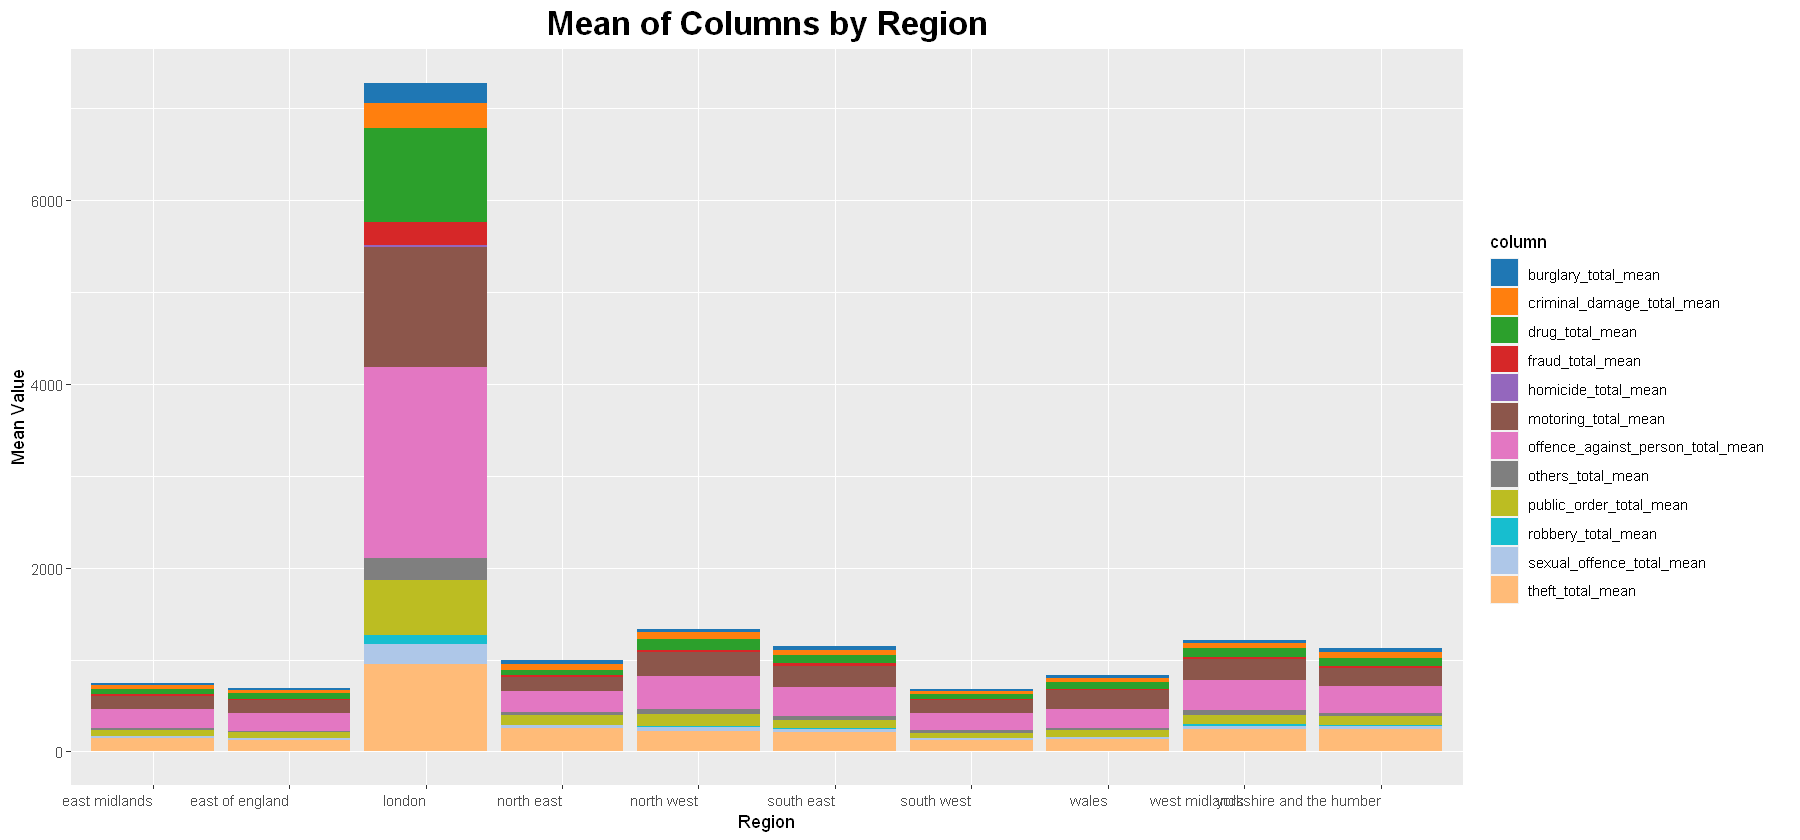

In [384]:

# Calculate the mean values by region for the three columns
mean_values <- combined_data_df %>%
  group_by(region) %>%
  summarize(homicide_total_mean = mean(homicide_total),
            fraud_total_mean = mean(fraud_total),
            offence_against_person_total_mean = mean(offence_against_person_total),
            sexual_offence_total_mean = mean(sexual_offence_total),
            burglary_total_mean = mean(burglary_total),
            robbery_total_mean = mean(robbery_total),
            theft_total_mean = mean(theft_total),
            criminal_damage_total_mean = mean(criminal_damage_total),
            drug_total_mean = mean(drug_total),
            public_order_total_mean = mean(public_order_total),
            others_total_mean = mean(others_total),
            motoring_total_mean = mean(motoring_total))

# Reshape the data to long format
mean_values_long <- mean_values %>%
  pivot_longer(cols = ends_with("_mean"),
               names_to = "column",
               values_to = "mean_value")

bar_plot(df = mean_values_long, x = "region", y = "mean_value", title = "Mean of Columns by Region", 
x_label = "Region", y_label = "Mean Value", fill_aes ="column", scale_fill_manual_value = colors)




We see that London as expected is by far the region with the most crime rate (with over 7000 crimes per month ). It is so high, that we cannot fully visualize for other regions,

hence, let us drop london and visualize for others 



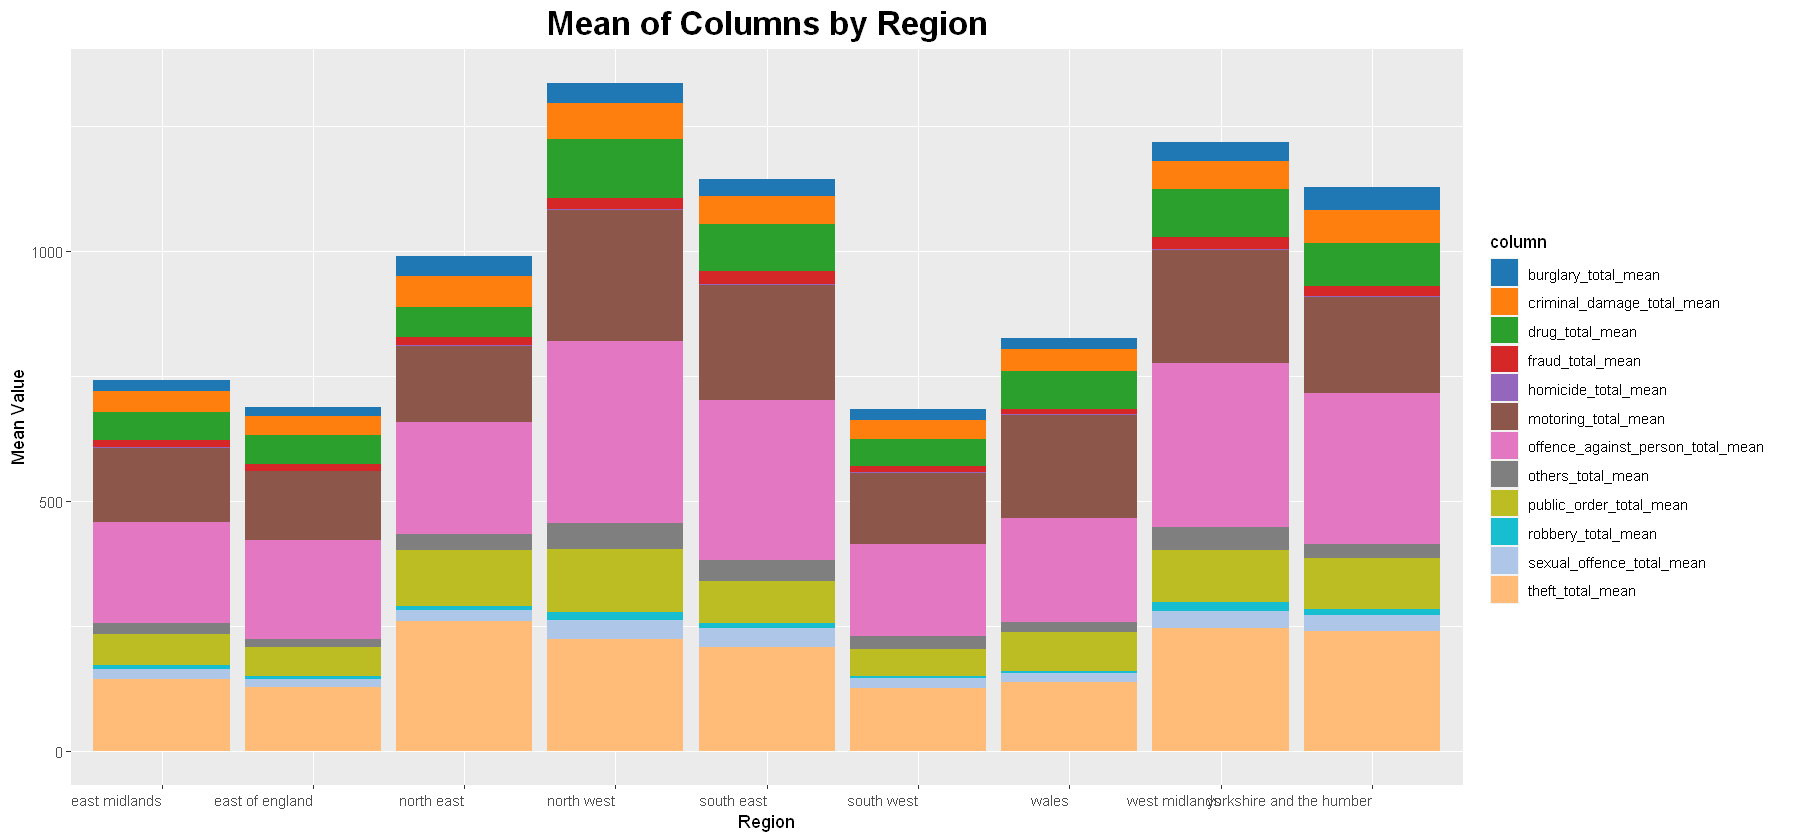

In [385]:
# Calculate the mean values by region for the three columns
mean_values <- df_no_london %>%
  group_by(region) %>%
  summarize(homicide_total_mean = mean(homicide_total),
            fraud_total_mean = mean(fraud_total),
            offence_against_person_total_mean = mean(offence_against_person_total),
            sexual_offence_total_mean = mean(sexual_offence_total),
            burglary_total_mean = mean(burglary_total),
            robbery_total_mean = mean(robbery_total),
            theft_total_mean = mean(theft_total),
            criminal_damage_total_mean = mean(criminal_damage_total),
            drug_total_mean = mean(drug_total),
            public_order_total_mean = mean(public_order_total),
            others_total_mean = mean(others_total),
            motoring_total_mean = mean(motoring_total))

# Reshape the data to long format
mean_values_long <- mean_values %>%
  pivot_longer(cols = ends_with("_mean"),
               names_to = "column",
               values_to = "mean_value")

bar_plot(df = mean_values_long, x = "region", y = "mean_value", title = "Mean of Columns by Region", 
x_label = "Region", y_label = "Mean Value", fill_aes ="column", scale_fill_manual_value = colors)


As expected, we see that North West and West midelands are the most danagerous regions after London 

while South west and east of england are the safest with lower crime rate per month

Now that we know the most dangerous counties, let us check if there is a trend with this and the environmental matrix of these regions 

We would check the population, area and population density of the regions 

In [386]:
#let us visualise area by regions to see which region has the largest area

region_area <- combined_data_df %>% distinct(police_area, region, area)


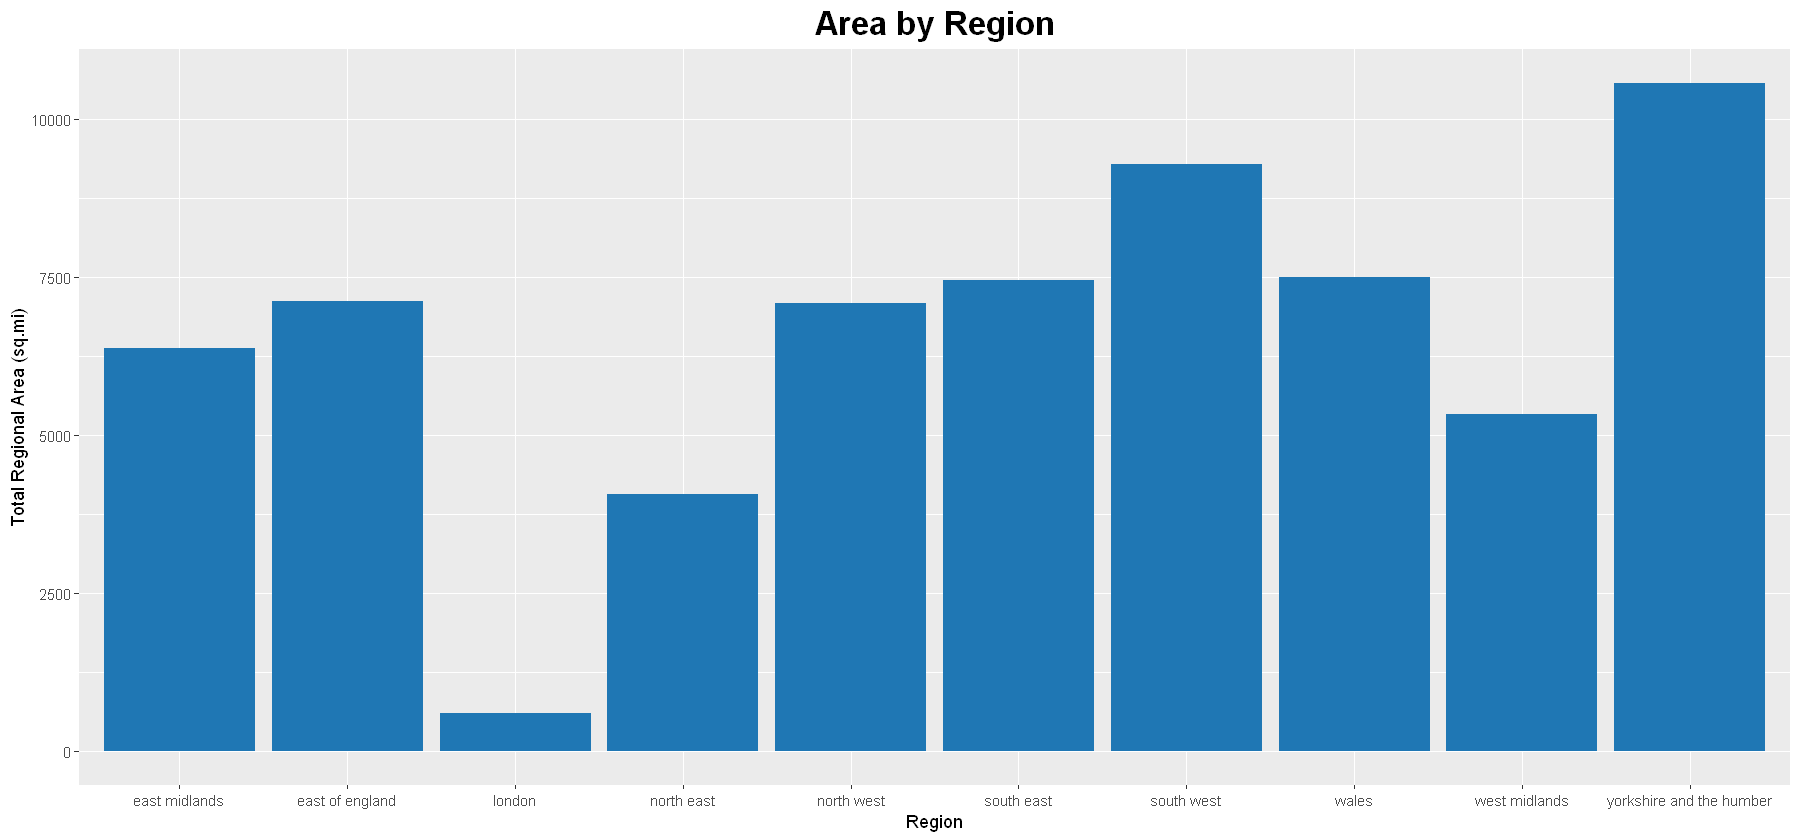

In [387]:

region_area <- aggregate(area ~ region, data = region_area, FUN = sum)

bar_plot(region_area, "region", "area", "Area by Region", "Region",
 "Total Regional Area (sq.mi)")

We can see here that the area does not really reflect the crime rate.

London with a high crime rate has the smallest area and by a huge distance.

Also, South West has the 2nd  largest area, but it is the safest region


Let us know look at the population by region

In [388]:
region_population <- combined_data_df %>% distinct(police_area, region, year, population, population_density)


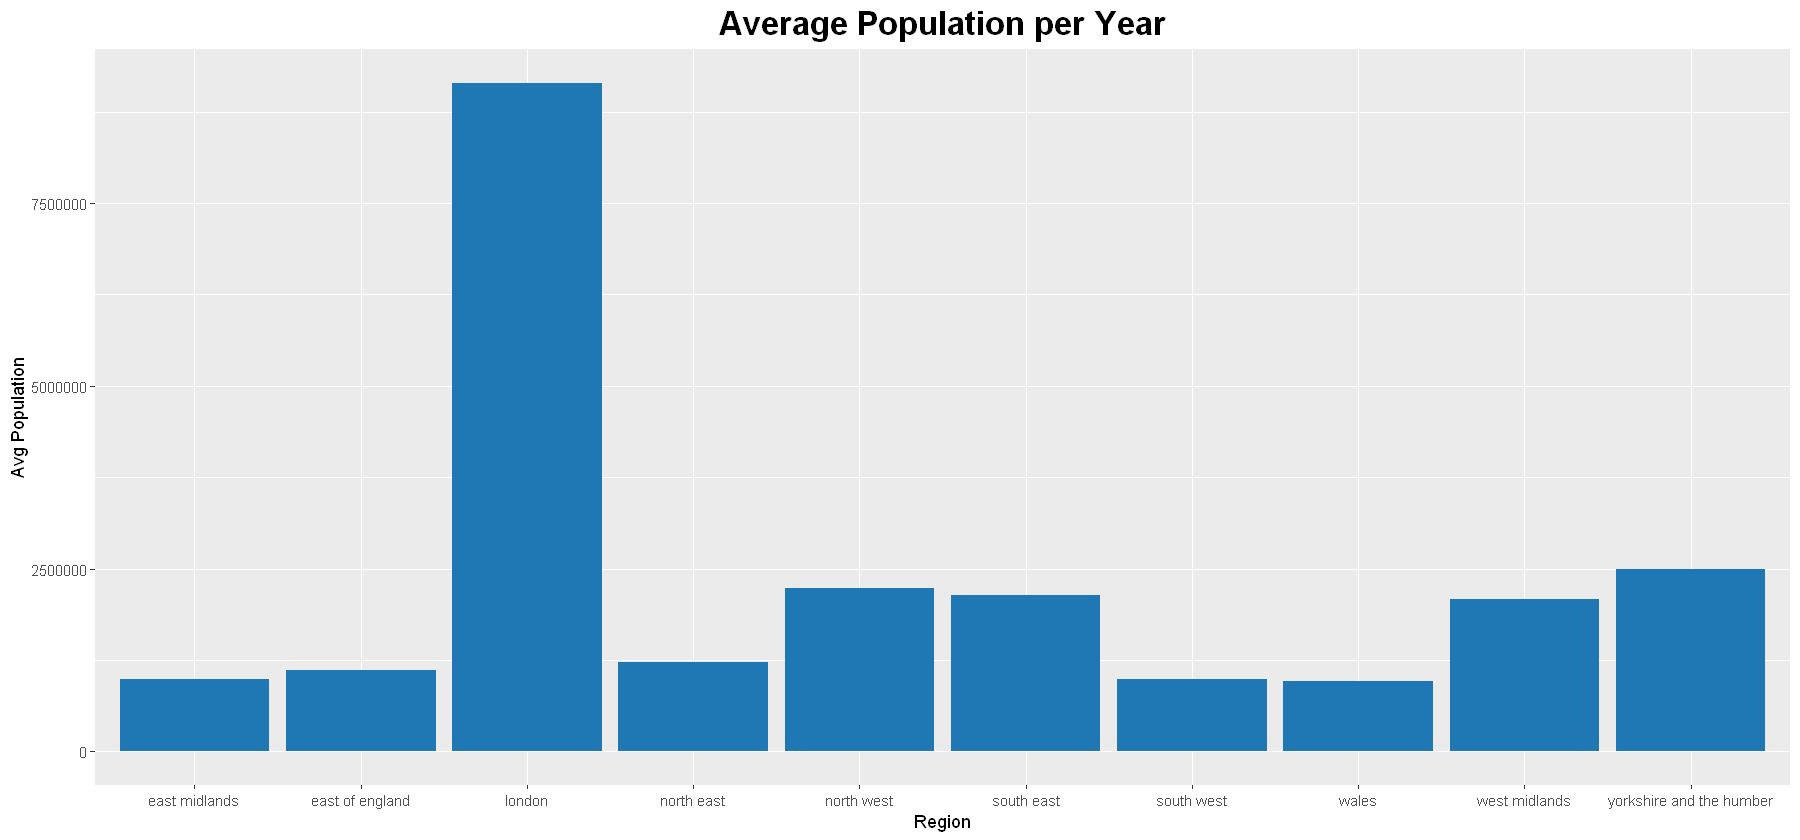

In [389]:
region_pop_plot <- aggregate(population ~ region, data = region_population, FUN = mean)

bar_plot(region_pop_plot, "region", "population", "Average Population per Year", "Region",
 "Avg Population")

We see here that London has the largest population is London, followed by Yorkshire and the Humber

while the South West and Wales have the smallest populations

Hence, there might be some kind of relationship between population and crime rate, but we would need to test this further

Looking at the population density now

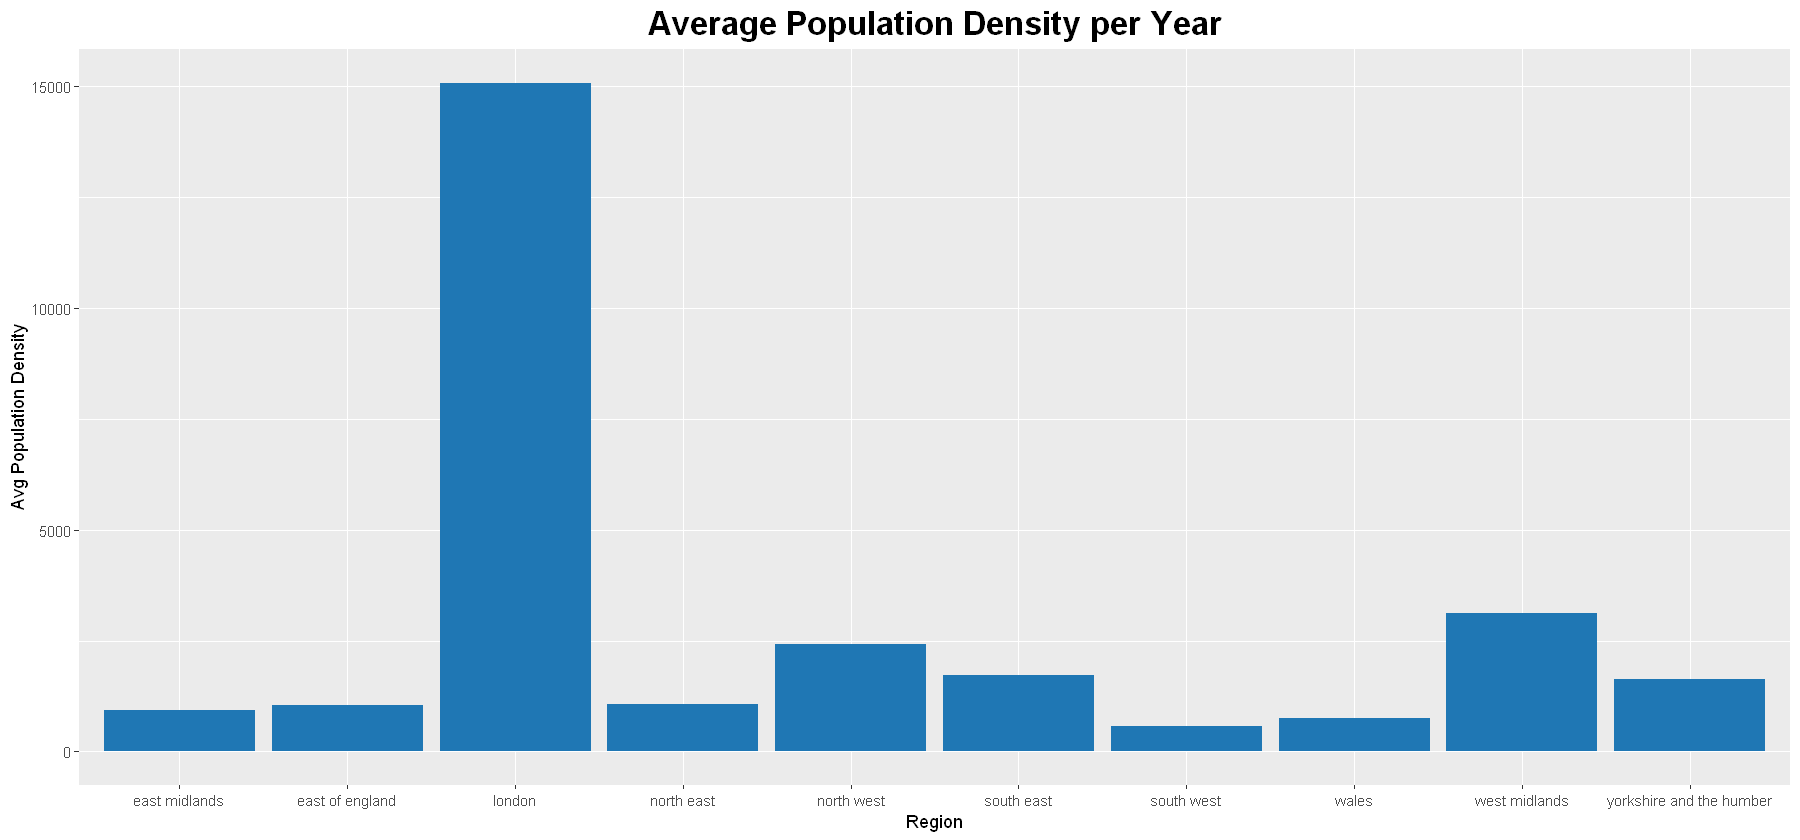

In [390]:
region_pop_den_plot <- aggregate(population_density ~ region, data = region_population, FUN = mean)


bar_plot(region_pop_den_plot, "region", "population_density", "Average Population Density per Year", "Region",
 "Avg Population Density")

From the population density, we can see that the top 3 are:

1. London
2. West Midlands 
3. North West

and the least crowded areas are:

1. South West
2. Wales
3. East Midlands


These more or less matches the avearge crime rate, hence, we suspect a trend of that the higher the population density, the higher the overall crime rate

Finally, regarding the total crime rate by region, let us view it on a granular base -  the police area

In [391]:
total_cols <- grep("total", names(combined_data_df), value = TRUE)

total_df <- combined_data_df %>%
    mutate(total_crime = rowSums(.[total_cols], na.rm = TRUE))

#total_df$total_crime <- rowSums(combined_data_df[total_cols], na.rm = TRUE)

In [392]:
total_crime_region <- total_df %>% select(police_area, region, year, total_crime)

colors_area <- c("#F8766D", "#D39200", "#93AA00", "#00BA38", "#00C19F", "#00B9E8", "#619CFF", "#DB72FB", "#FF61A6", "#FFBE00", "#FFD52E", "#B1B1B1")


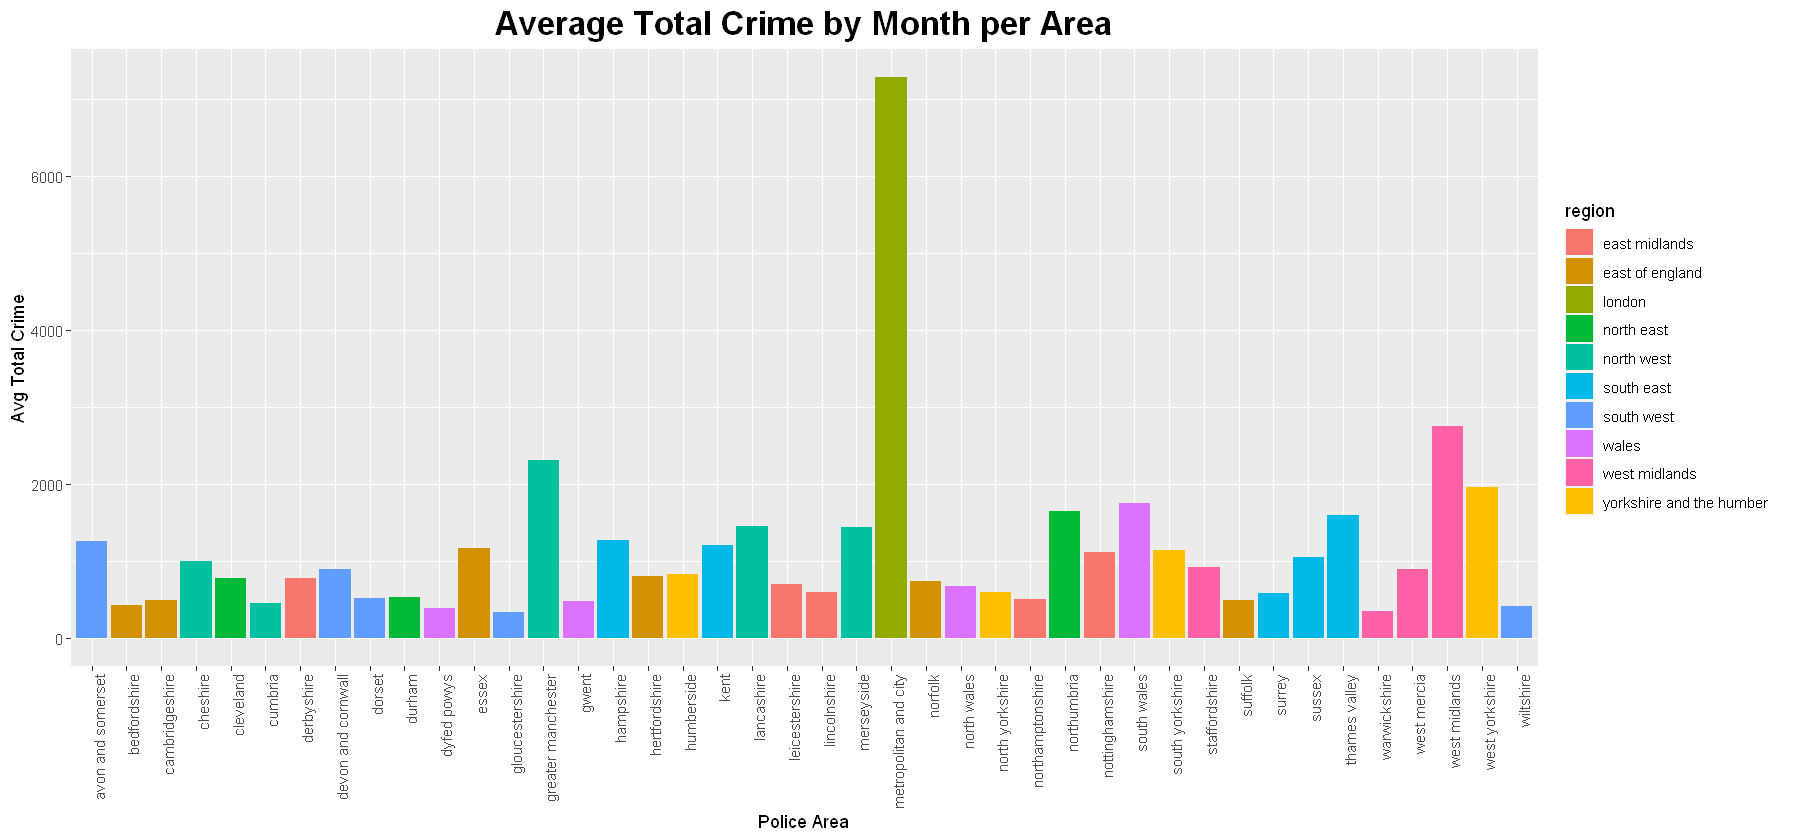

In [393]:
total_crime_region_plt <- aggregate(total_crime ~ police_area + region, data = total_crime_region, FUN = mean)

bar_plot(df = total_crime_region_plt, x = "police_area", y = "total_crime", fill_aes = 'region', 
title = "Average Total Crime by Month per Area", x_label = "Police Area", y_label = "Avg Total Crime", 
scale_fill_manual_value = colors_area, text_angle = 90)

From here, we can see here, that:

1.	London has one area in it’s region (metropolitan and city), which has the highest total crime rate
2.	Followed by West midlands which is in the west midlands region 
3.	Also, greater Manchester (in north west) has a very high crime rate too
4.	Same with West Yorkshire (in Yorkshire and the humber)
These areas are the areas contributing most to the total crime rest in these high crime regions.


Consequently, we also see that:
1.	Gloucestershire (in south west region) has the lowest crime rate
2.	This is followed by Warwickshire(west midlands), wiltshitre(south west) 

It is interesting that Warwickshire( in west midlands) has one of the lowest crime rate although it belongs to a region with one of the highest crime rates. This means there are some hidden trends here.

Although, generally west midlands is a high crime region, some areas in this region are not very dangerous as suspected.


Let us now compare each area by homicide total

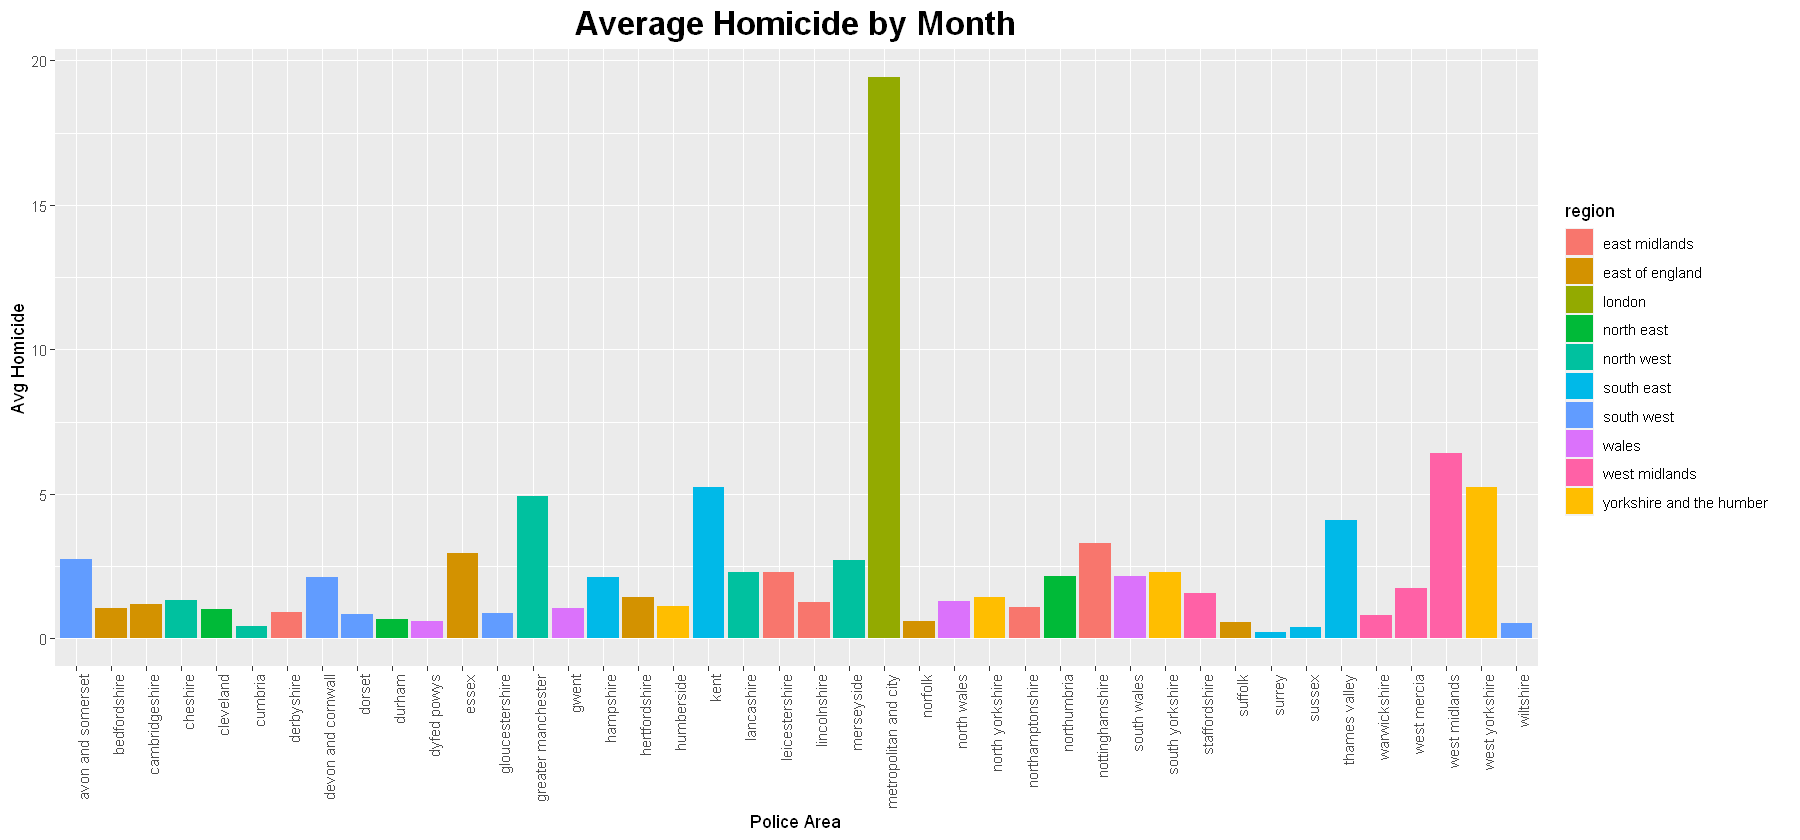

In [394]:
homicide_plot <- aggregate(homicide_total ~ police_area + region, data = combined_data_df, FUN = mean)

bar_plot(df = homicide_plot, x = "police_area", y = "homicide_total", fill_aes = 'region', 
title = "Average Homicide by Month", x_label = "Police Area", y_label = "Avg Homicide", 
scale_fill_manual_value = colors_area, text_angle = 90)

We can see that London as exepcted has the higest homicide rate with homicide case of about 20 per month

Let us exclude London region, so we can visualize properly for other areas

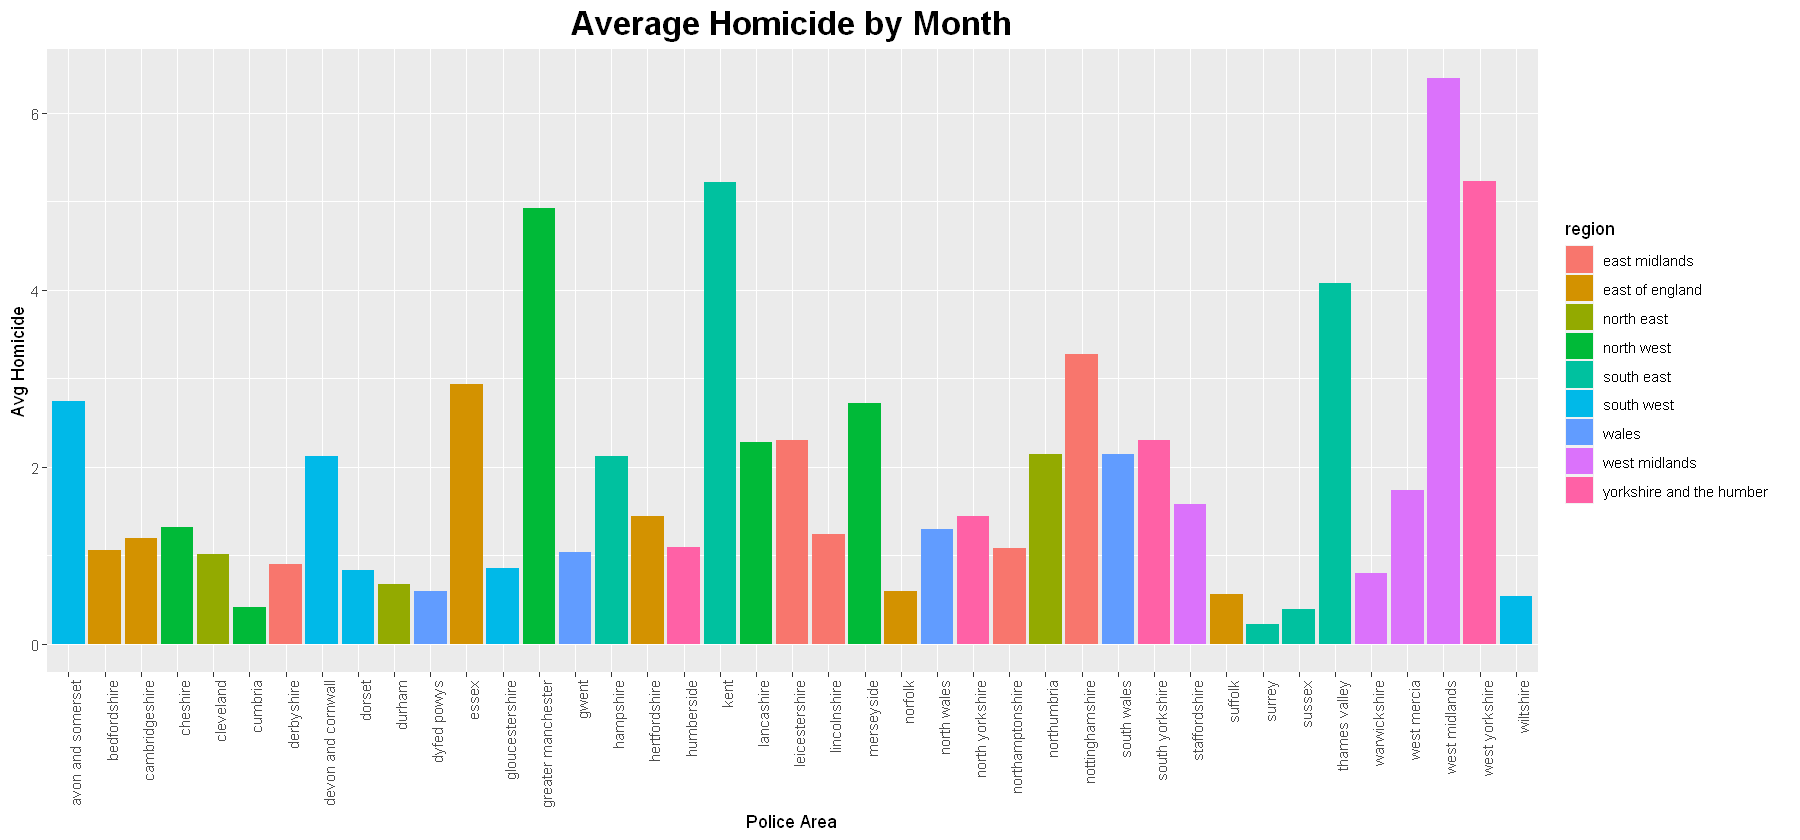

In [395]:
#without london

homicide_plot <- aggregate(homicide_total ~ police_area + region, data = df_no_london, FUN = mean)


bar_plot(df = homicide_plot, x = "police_area", y = "homicide_total", fill_aes = 'region', 
title = "Average Homicide by Month", x_label = "Police Area", y_label = "Avg Homicide", 
scale_fill_manual_value = colors_area, text_angle = 90)

Apart from London,
The west midlands area has the highest homicide rate, next to west Yorkshire(in the Yorkshire and the Humber region). 

Also aread with high relative homicide rate are:

Thames valley (south east)
Kent (south east)
Greater Manchester (north west)


We can see compared to the total crime, the south east regions have comparatively higher homicide rate, despite not being among the top crime rate region when looked at holistically.

This is a new insight for us, which we can explore


Let us now compare the percentage succesful convictions

We can use this to determine how many of the accused cases weee actually ruled in the favour of the prosecutors

First let us look at this by each crime category and on a national scale

In [396]:
total_homicide_conviction_percent <- sum(combined_data_df$homicide_conviction) / sum(combined_data_df$homicide_total) * 100
total_offence_against_person_conviction_percent <- sum(combined_data_df$offence_against_person_conviction) / sum(combined_data_df$offence_against_person_total) * 100
total_sexual_offence_conviction_percent <- sum(combined_data_df$sexual_offence_conviction) / sum(combined_data_df$sexual_offence_total) * 100
total_burglary_conviction_percent <- sum(combined_data_df$burglary_conviction) / sum(combined_data_df$burglary_total) * 100
total_robbery_conviction_percent <- sum(combined_data_df$robbery_conviction) / sum(combined_data_df$robbery_total) * 100
total_theft_conviction_percent <- sum(combined_data_df$theft_conviction) / sum(combined_data_df$theft_total) * 100
total_fraud_conviction_percent <- sum(combined_data_df$fraud_conviction) / sum(combined_data_df$fraud_total) * 100
total_criminal_damage_conviction_percent <- sum(combined_data_df$criminal_damage_conviction) / sum(combined_data_df$criminal_damage_total) * 100
total_drug_conviction_percent <- sum(combined_data_df$drug_conviction) / sum(combined_data_df$drug_total) * 100
total_public_order_conviction_percent <- sum(combined_data_df$public_order_conviction) / sum(combined_data_df$public_order_total) * 100
total_others_conviction_percent <- sum(combined_data_df$others_conviction) / sum(combined_data_df$others_total) * 100
total_motoring_conviction_percent <- sum(combined_data_df$motoring_conviction) / sum(combined_data_df$motoring_total) * 100


In [397]:
percent_conviction <- c(total_homicide_conviction_percent, total_offence_against_person_conviction_percent, total_sexual_offence_conviction_percent, total_burglary_conviction_percent,
                        total_robbery_conviction_percent, total_theft_conviction_percent, total_fraud_conviction_percent, total_criminal_damage_conviction_percent, total_drug_conviction_percent,
                        total_public_order_conviction_percent, total_others_conviction_percent, total_motoring_conviction_percent)

crime_category <- c("homicide", "offence_against_person", "sexual_offence", "burglary", "robbery", "theft", "fraud", "criminal_damage", "drug", "public_order", "others", "motoring")

conviction_percent_df <- data.frame(crime_category, percent_conviction)

conviction_percent_df <- conviction_percent_df %>% arrange(desc(percent_conviction))

conviction_percent_df


crime_category,percent_conviction
<chr>,<dbl>
drug,93.89878
theft,92.21312
motoring,86.70785
fraud,86.37117
burglary,86.26589
public_order,85.81004
criminal_damage,85.68074
others,84.74182
homicide,81.57514


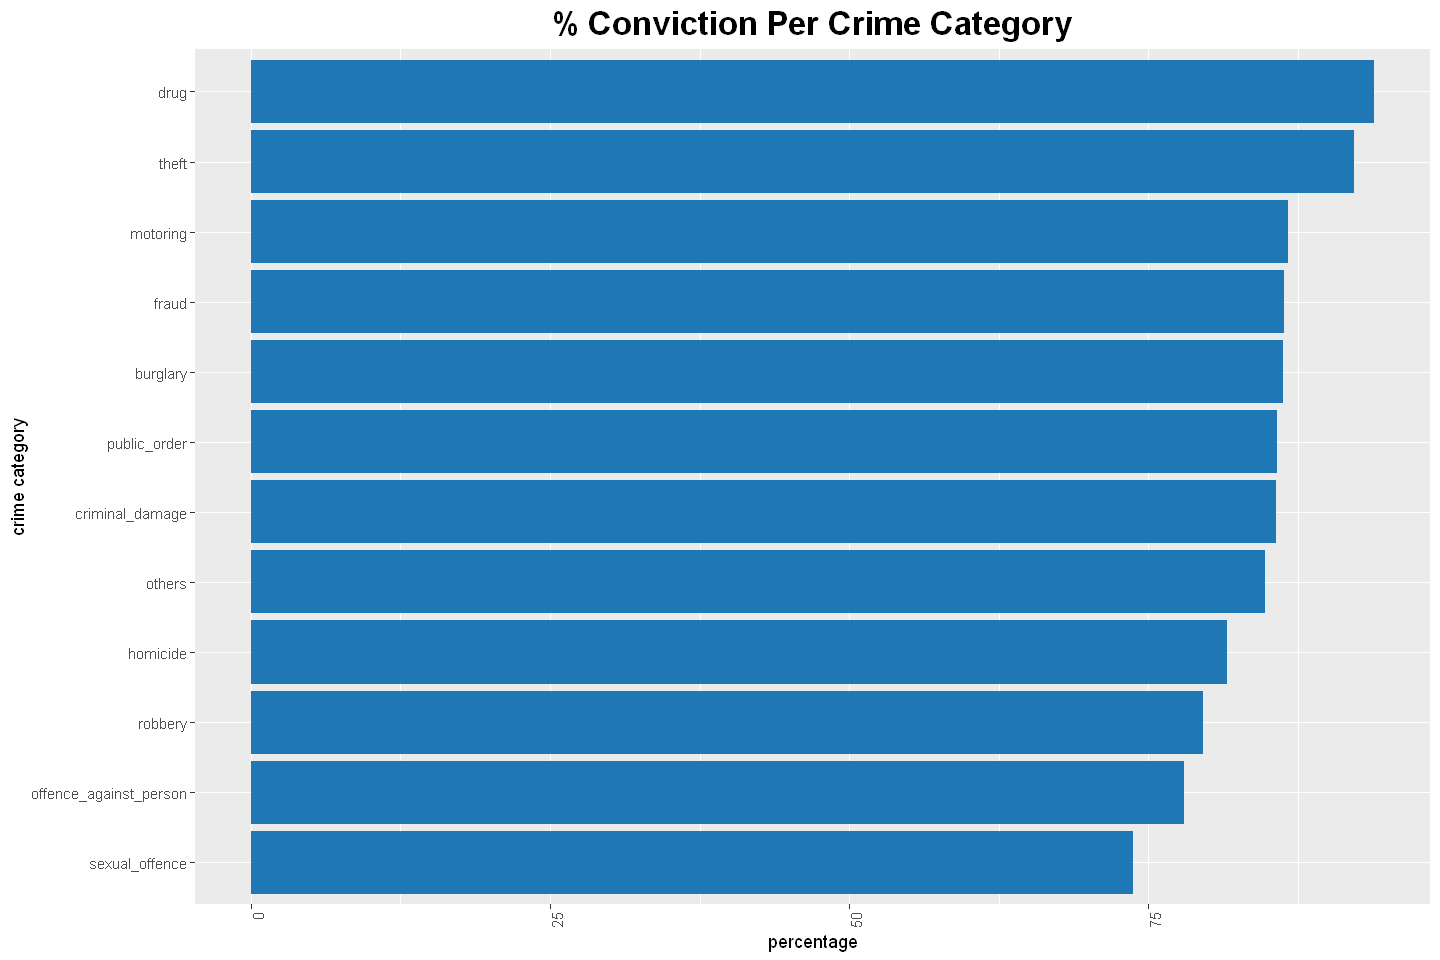

In [398]:
# Plot the sums on a graph

options(repr.plot.width = 12, repr.plot.height = 8)

bar_chart <- ggplot(conviction_percent_df, aes(x = percent_conviction, y = reorder(crime_category, percent_conviction))) +
  geom_bar(stat = "identity", fill = "#1f77b4") +
  labs(title = "% Conviction Per Crime Category", x = "percentage", y = "crime category") +
  theme(plot.title = element_text(hjust = 0.5, face = "bold", size = 20),axis.text.x = element_text(angle = 90, hjust = 1)
  )

# Display the bar chart
print(bar_chart)

# bar_plot(conviction_percent_df, "crime_category", "percent_conviction", "% Conviction", "Crime Category",
#  "Conviction Percentage")


Here, we see that if one is indicted for either theft or drugs, there is a 90% chance of them being convicted of the crime

Followed by motoring, fraud, bulglary, public order and criminal damage with over 85% chance of being convicted.

Homicide, has a 81.57% of being convicted if charged with it.

The lowest probability is sexual offence with 73.7%.


This can indicate how easy it is to be indicted of certain crimes and could point to many factors  around it including 

1. Ease of getting evidence
2. Witnesses etc

To get more insight on these, we would need further information which is nnot available from our data set.

In [399]:
#let us find the mean crime rate per month



In [400]:
total_cols <- grep("total", names(combined_data_df), value = TRUE)

combined_data_df$total_crime <- rowSums(combined_data_df[total_cols], na.rm = TRUE)


In [401]:

crime_by_date <- aggregate(total_crime ~ date, data = combined_data_df, FUN = mean)

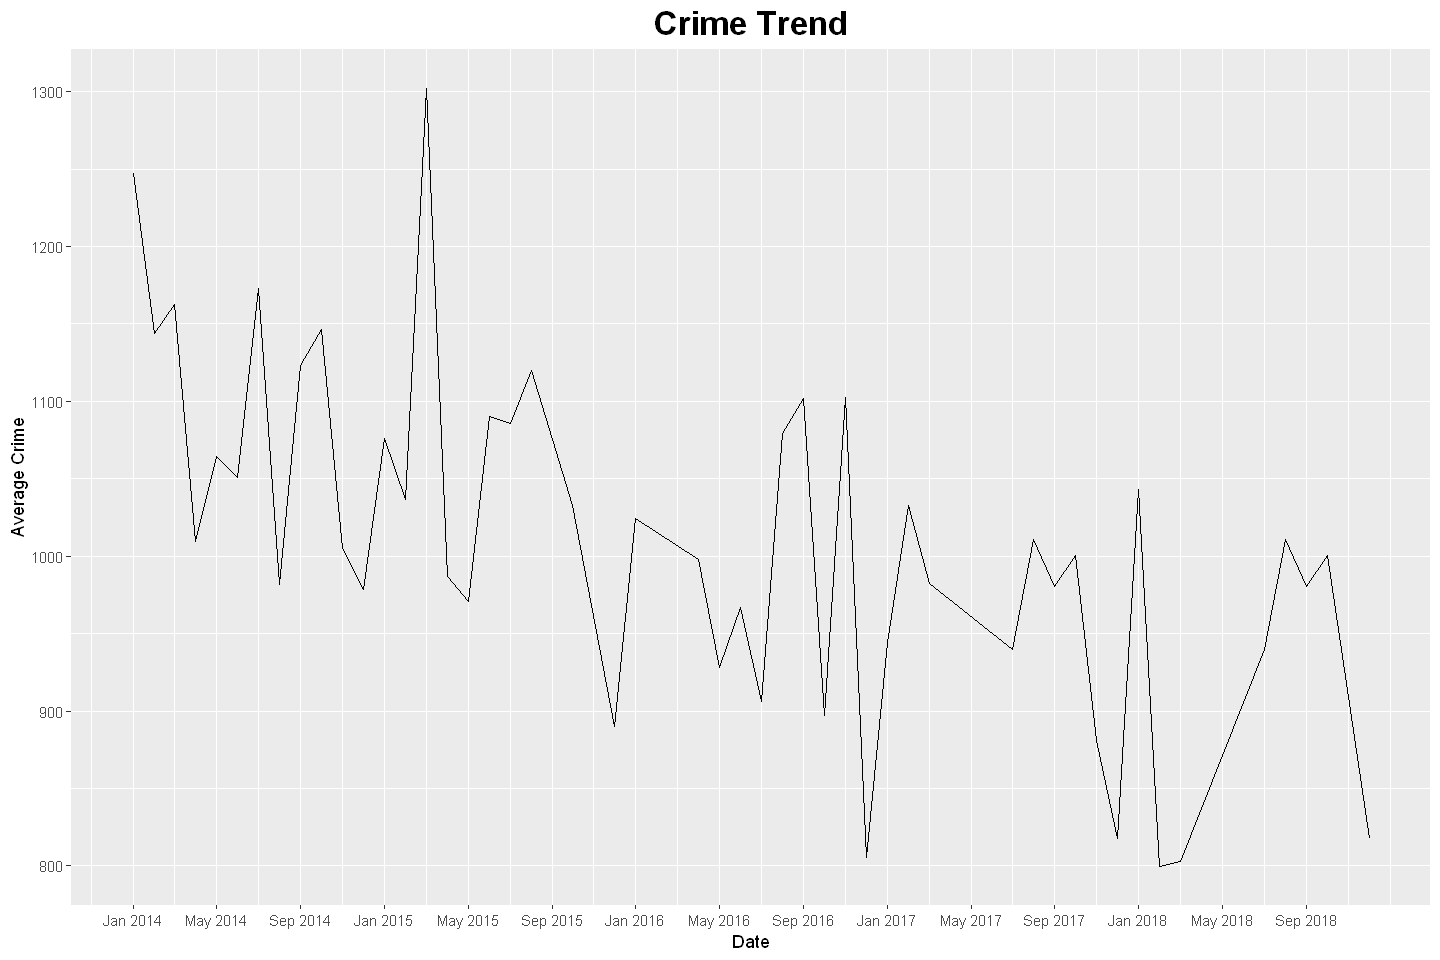

In [402]:

numeric_dates <- as.numeric(as.yearmon(crime_by_date$date))

#excluded_dates <- c("nov 2015", "feb 2016", "mar 2016", "apr 2017", "may 2017", "jun 2017", "apr 2018", "may 2018", "jun 2018", "nov 2018")
#filtered_data <- combined_data_df[!(combined_data_df$date %in% excluded_dates), ]

plot <- ggplot(crime_by_date, aes(x = date, y = total_crime)) +
  geom_line() +
  labs(title = "Crime Trend", x = "Date", y = "Average Crime") +
  theme(plot.title = element_text(hjust = 0.5, face = "bold", size = 20))

# Set custom breaks for every 4 months
custom_breaks <- seq(min(numeric_dates), max(numeric_dates), by = 4/12)

# Convert the numeric breaks back to yearmon format
formatted_breaks <- as.yearmon(custom_breaks)

# Adjust the breaks and labels on the x-axis
plot <- plot + scale_x_yearmon(breaks = formatted_breaks, format = "%b %Y")

# Display the plot
print(plot)


we can see that the crime rate was at its peak in March 2015. With other high months in Jan 2014, March 2014 and July 2014

There was a massive dip in crime rate in Dec 2016, Dec, 2017 and Feb 2018

We can also see a trend,  crime is at its lowest in Decemeber for all the years considered.

This might be attributed to the festive season as every one is jolly or might have travelled out of town for the festivities. This is just a speculation. Further information would be need to perform a causation analysis


In [403]:
#together with the distinct dates in combined_data_df

sort(unique(combined_data_df$date))

 [1] "Jan 2014" "Feb 2014" "Mar 2014" "Apr 2014" "May 2014" "Jun 2014"
 [7] "Jul 2014" "Aug 2014" "Sep 2014" "Oct 2014" "Nov 2014" "Dec 2014"
[13] "Jan 2015" "Feb 2015" "Mar 2015" "Apr 2015" "May 2015" "Jun 2015"
[19] "Jul 2015" "Aug 2015" "Sep 2015" "Oct 2015" "Dec 2015" "Jan 2016"
[25] "Apr 2016" "May 2016" "Jun 2016" "Jul 2016" "Aug 2016" "Sep 2016"
[31] "Oct 2016" "Nov 2016" "Dec 2016" "Jan 2017" "Feb 2017" "Mar 2017"
[37] "Jul 2017" "Aug 2017" "Sep 2017" "Oct 2017" "Nov 2017" "Dec 2017"
[43] "Jan 2018" "Feb 2018" "Mar 2018" "Jul 2018" "Aug 2018" "Sep 2018"
[49] "Oct 2018" "Dec 2018"

NO:

nov 2015
feb 2016
mar 2016
apr 2017
may 2017
jun 2017
apr 2018
may 2018
jun 2018
nov 2018


Let us now focus on Homicide rate each year




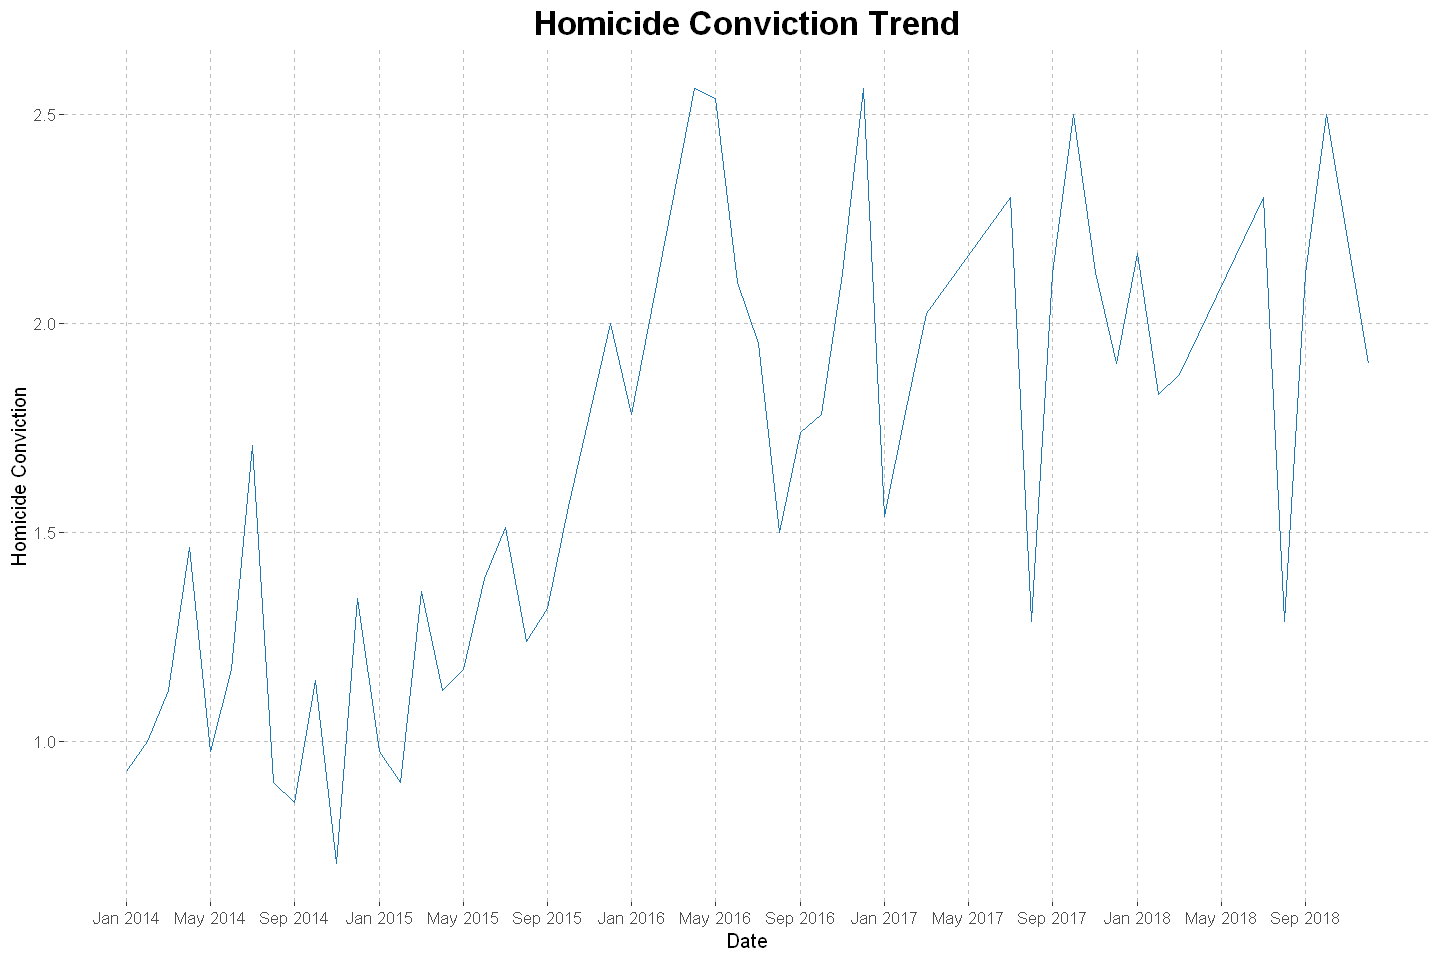

In [404]:
homicide_by_date <- aggregate(homicide_conviction ~ date, data = combined_data_df, FUN = mean)


#numeric_dates <- as.numeric(as.yearmon(crime_by_date$date))

# Set theme options
custom_theme <- theme(
  plot.title = element_text(hjust = 0.5, size = 20, face = "bold"),
  axis.title = element_text(size = 12),
  axis.text = element_text(size = 10),
  legend.title = element_blank(),
  legend.text = element_text(size = 10),
  panel.background = element_rect(fill = "white"),
  panel.grid.major = element_line(color = "gray", linetype = "dashed"),
  panel.grid.minor = element_blank()
)

# Create the plot
plot <- ggplot(homicide_by_date, aes(x = date, y = homicide_conviction)) +
  geom_line(color = "#1f77b4") +
  labs(title = "Homicide Conviction Trend",
       x = "Date",
       y = "Homicide Conviction") +
  custom_theme

# Set custom breaks for every 4 months
custom_breaks <- seq(min(numeric_dates), max(numeric_dates), by = 4/12)

# Convert the numeric breaks back to yearmon format
formatted_breaks <- as.yearmon(custom_breaks)

# Adjust the breaks and labels on the x-axis
plot <- plot + scale_x_yearmon(breaks = formatted_breaks, format = "%b %Y")

# Display the plot
print(plot)


We can see from the graph that the homicide rate has been growing semi steady year on year with various dips within the month.

We need to investigate what other crimes can be causing this too
We also notice here that in December, the homicide conviction rate seems to be on the increase with is different from what we saw with the total crime conviction


Let us now compare the conviction rate of various crime catergories. To see if we can identify any trend.

We will do this in pairs

In [405]:

scatter_plot <- function(df, x, y, title, x_label, y_label){
  
  # Create a scatter plot
  plot <- ggplot(df, aes(x = .data[[x]], y = .data[[y]])) +
    geom_point(color = "#1f77b4") +
    geom_smooth(method = "lm", se = FALSE, formula = 'y ~ x') +
    labs(title = title, x = x_label, y = y_label) +
    #custom_theme
    theme(plot.title = element_text(hjust = 0.5, face = "bold", size = 20))
  
  # Display the plot
  print(plot)
  
}

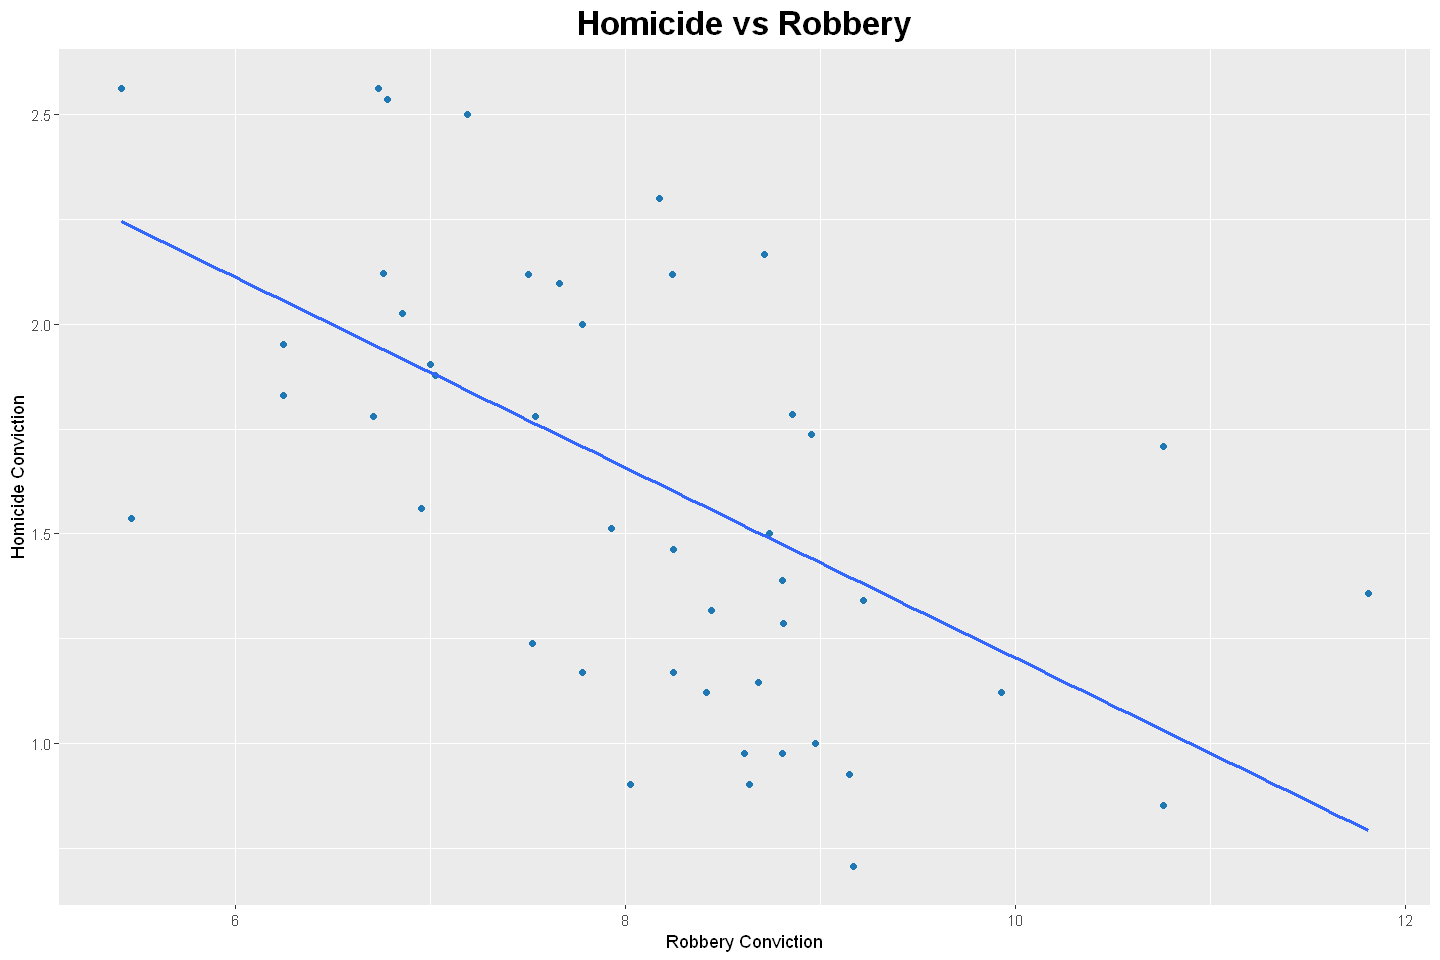

In [406]:
#plotting a scatter plot for homicide and robbery_conviction to see if there is a correlation

aggre <- aggregate(cbind(robbery_conviction, homicide_conviction) ~ date, data = combined_data_df, FUN = mean)

scatter_plot(aggre, "robbery_conviction", "homicide_conviction", "Homicide vs Robbery", "Robbery Conviction", "Homicide Conviction")

There seem to be a very random and no clear correlation between homicide and robbery

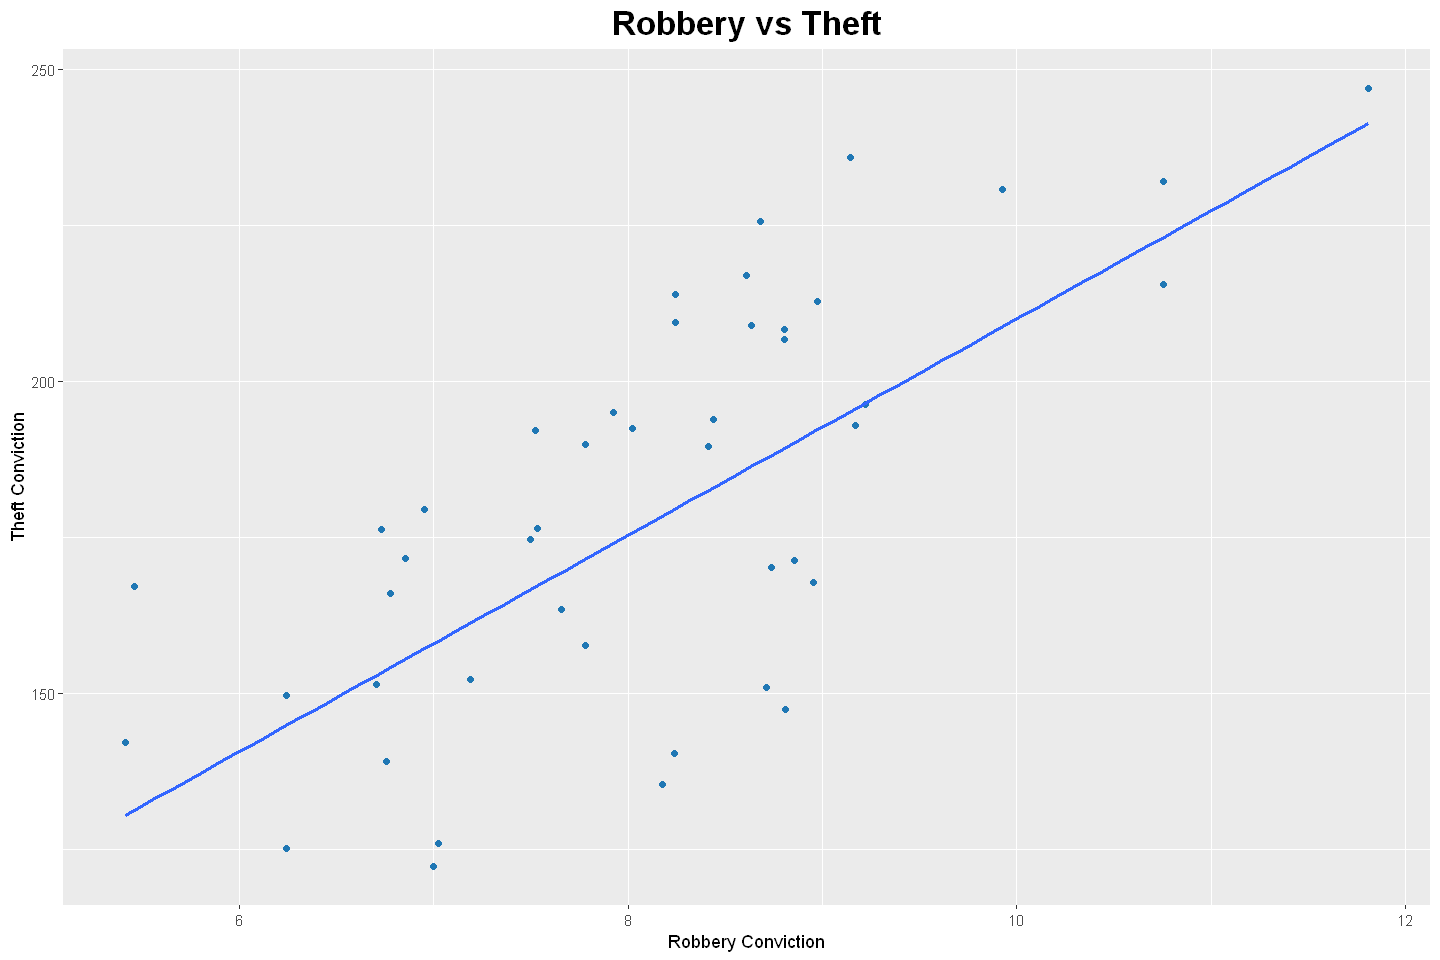

In [407]:
#plotting a scatter plot for theft and robbery_conviction (means)

aggre <- aggregate(cbind(robbery_conviction, theft_conviction) ~ date, data = combined_data_df, FUN = mean)

scatter_plot(aggre, "robbery_conviction", "theft_conviction", "Robbery vs Theft", "Robbery Conviction", "Theft Conviction")

We suspect a correlation between robbery, theft and burglary, let us confirm by plotting some scatter plots

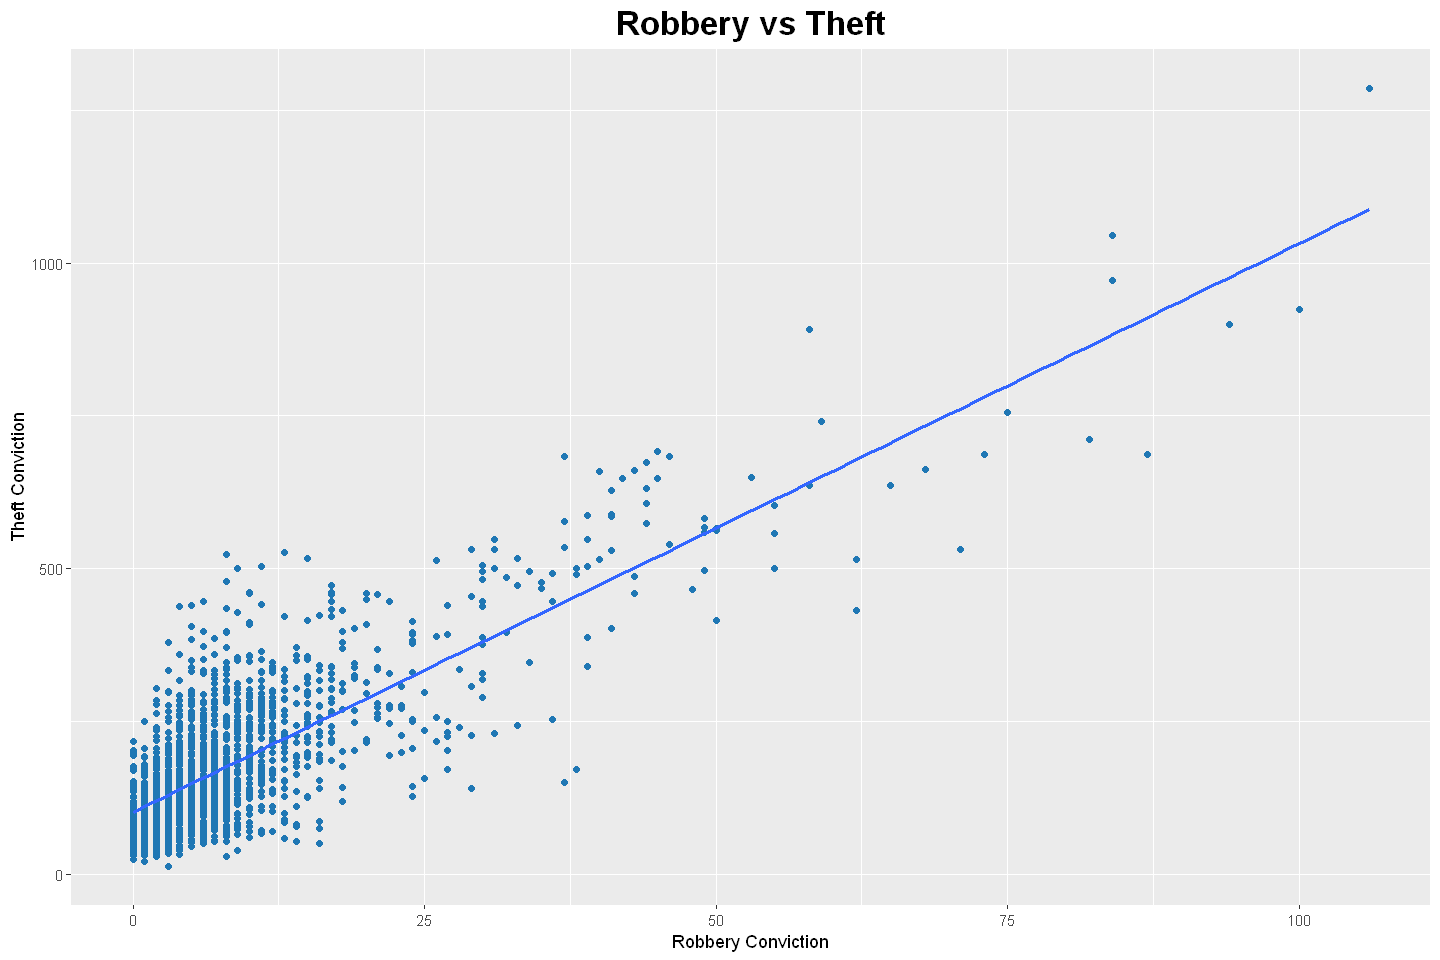

In [408]:
scatter_plot(combined_data_df, "robbery_conviction", "theft_conviction", "Robbery vs Theft", "Robbery Conviction", "Theft Conviction")

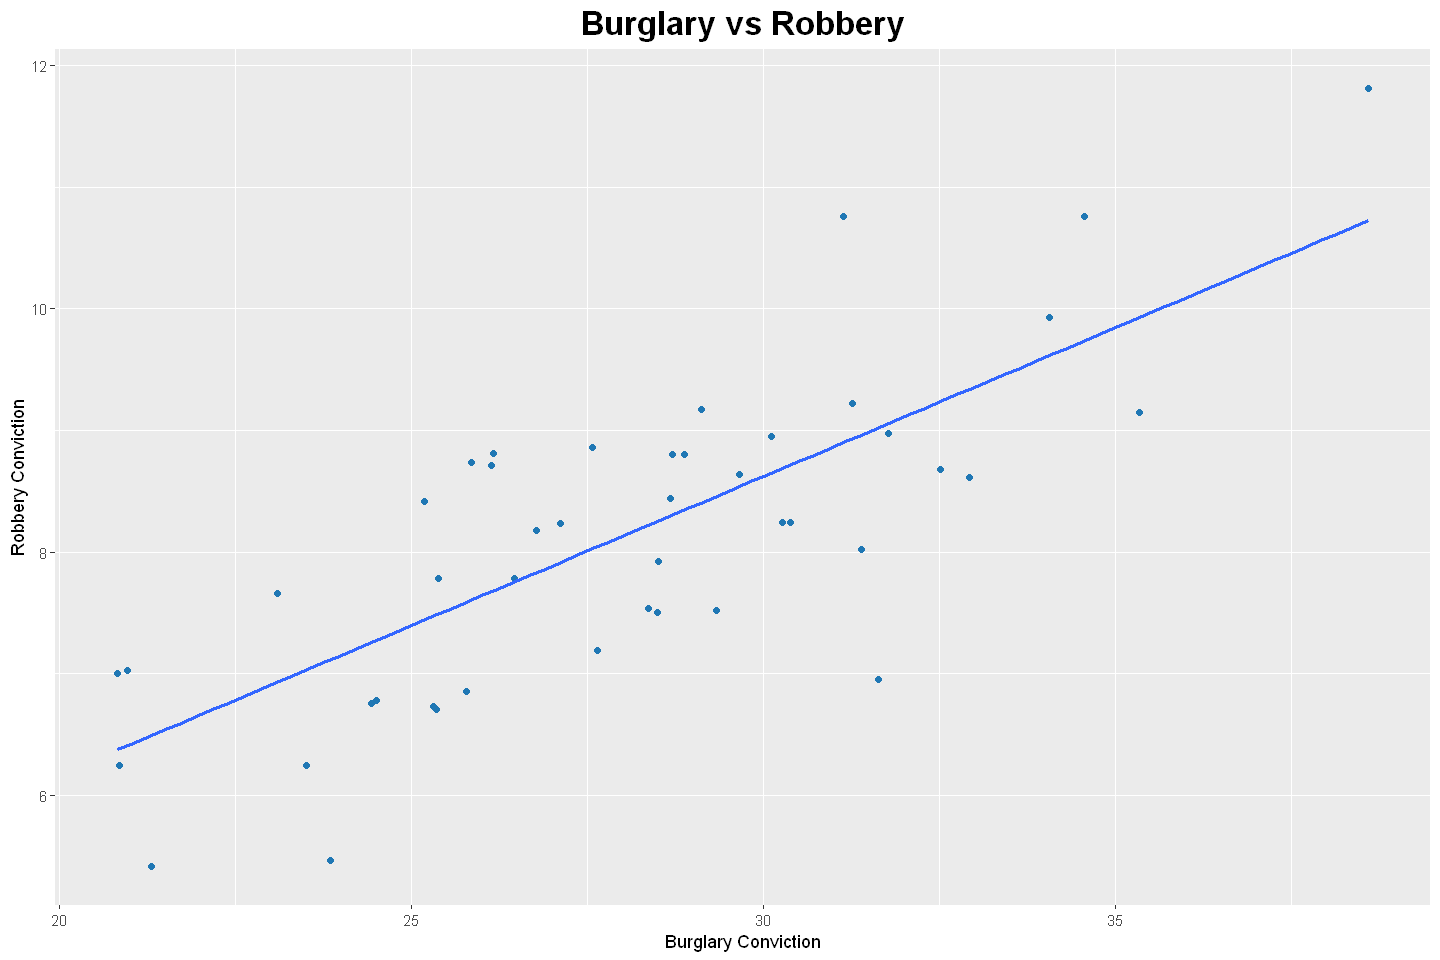

In [409]:
aggre <- aggregate(cbind(robbery_conviction, burglary_conviction) ~ date, data = combined_data_df, FUN = mean)

scatter_plot(aggre, "burglary_conviction", "robbery_conviction", "Burglary vs Robbery", "Burglary Conviction", "Robbery Conviction")

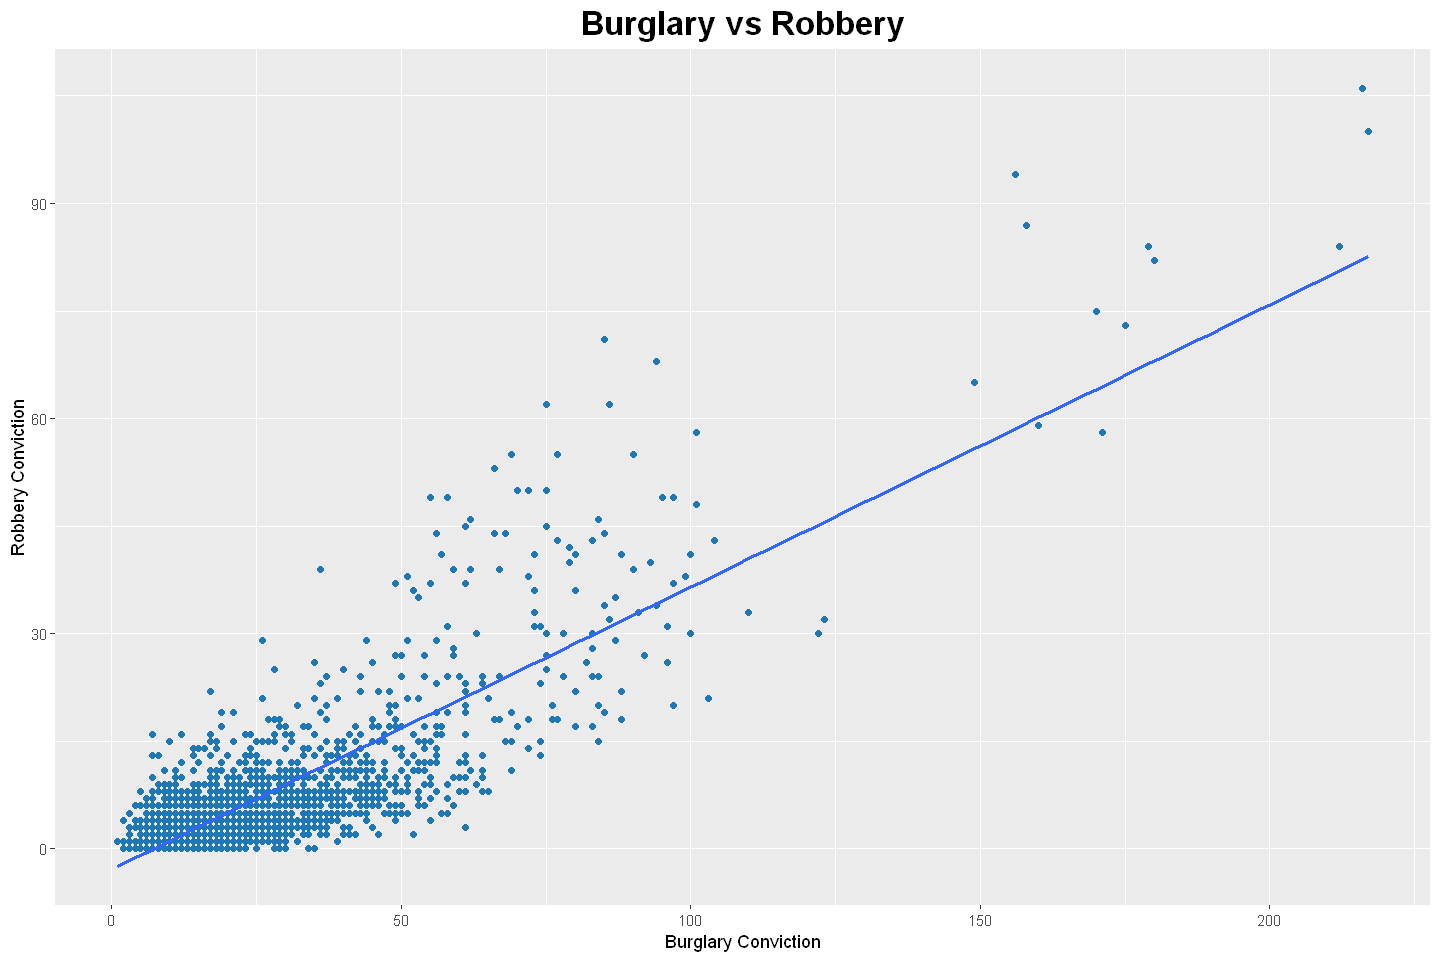

In [410]:
scatter_plot(combined_data_df, "burglary_conviction", "robbery_conviction", "Burglary vs Robbery", "Burglary Conviction", "Robbery Conviction")

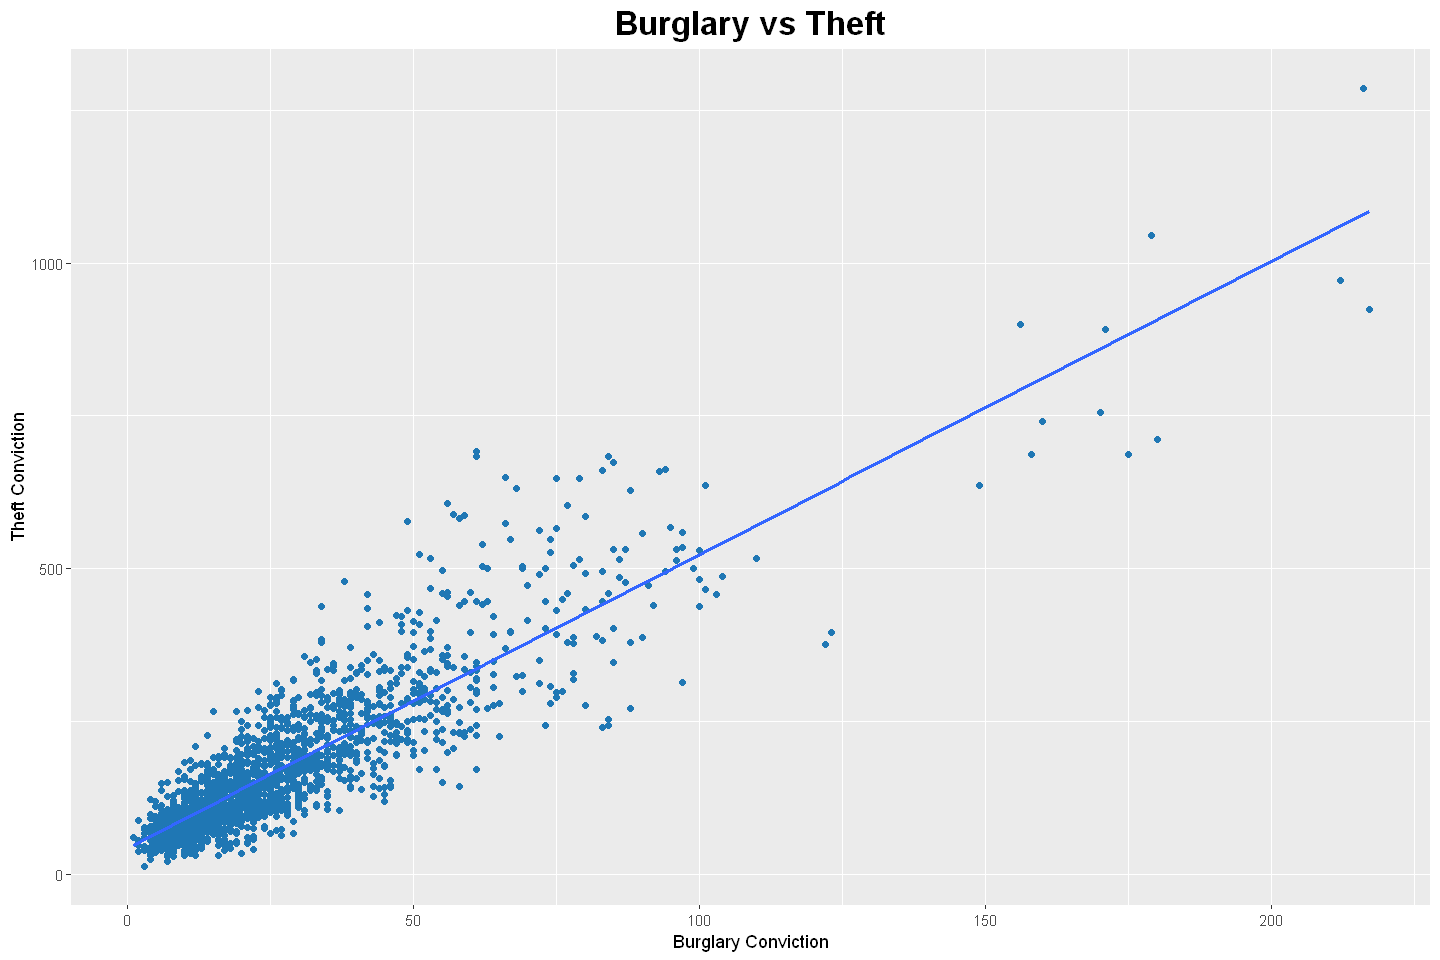

In [411]:
scatter_plot(combined_data_df, "burglary_conviction", "theft_conviction", "Burglary vs Theft", "Burglary Conviction", "Theft Conviction")

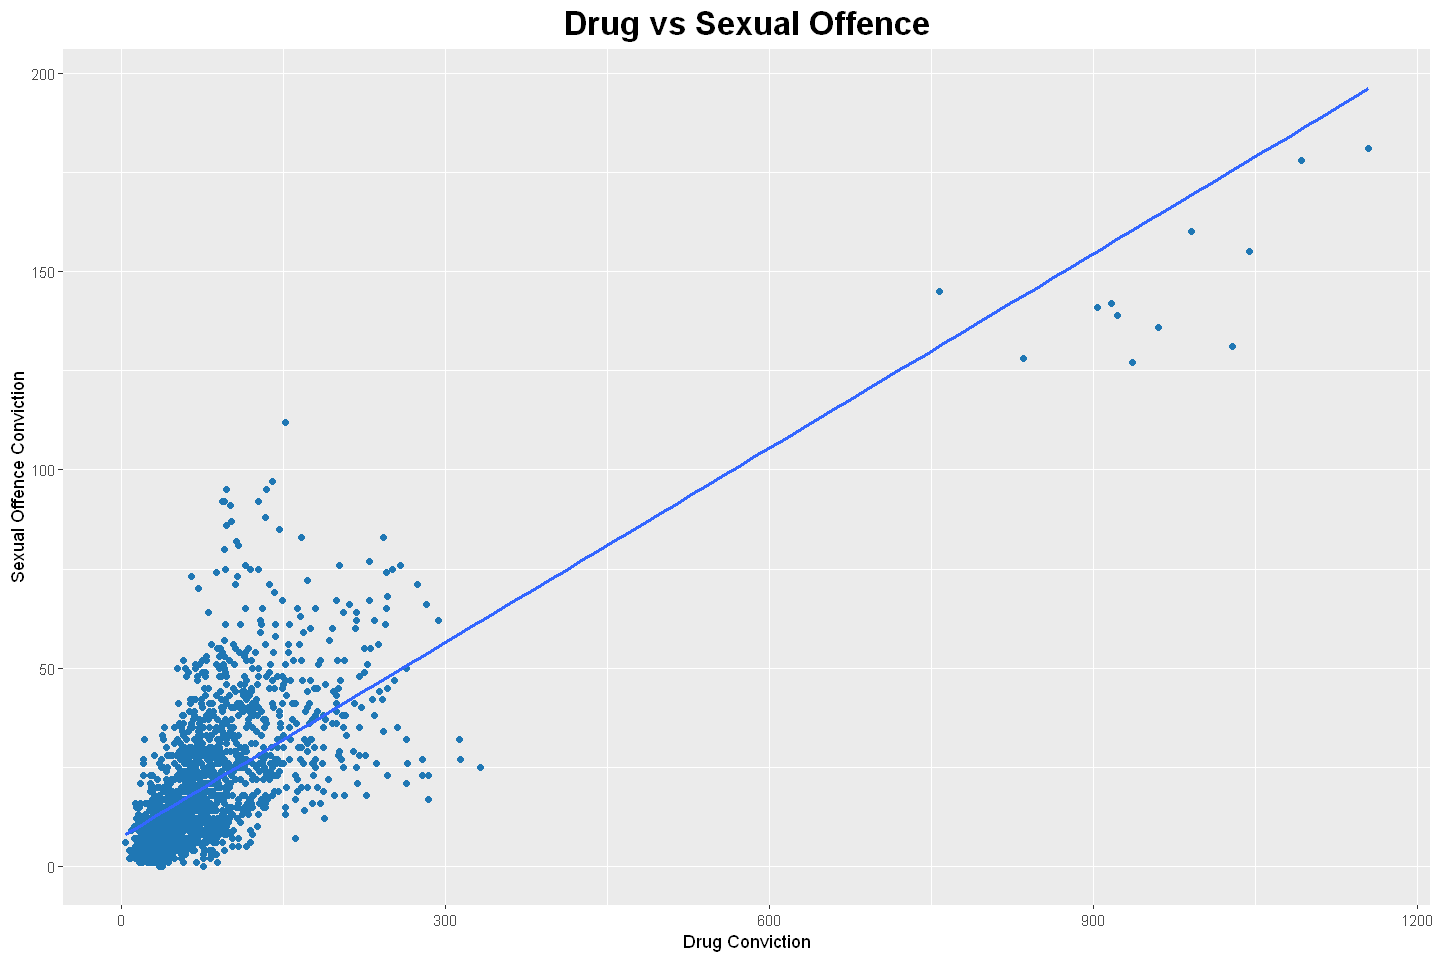

In [412]:
scatter_plot(combined_data_df, "drug_conviction", "sexual_offence_conviction", "Drug vs Sexual Offence", "Drug Conviction", "Sexual Offence Conviction")

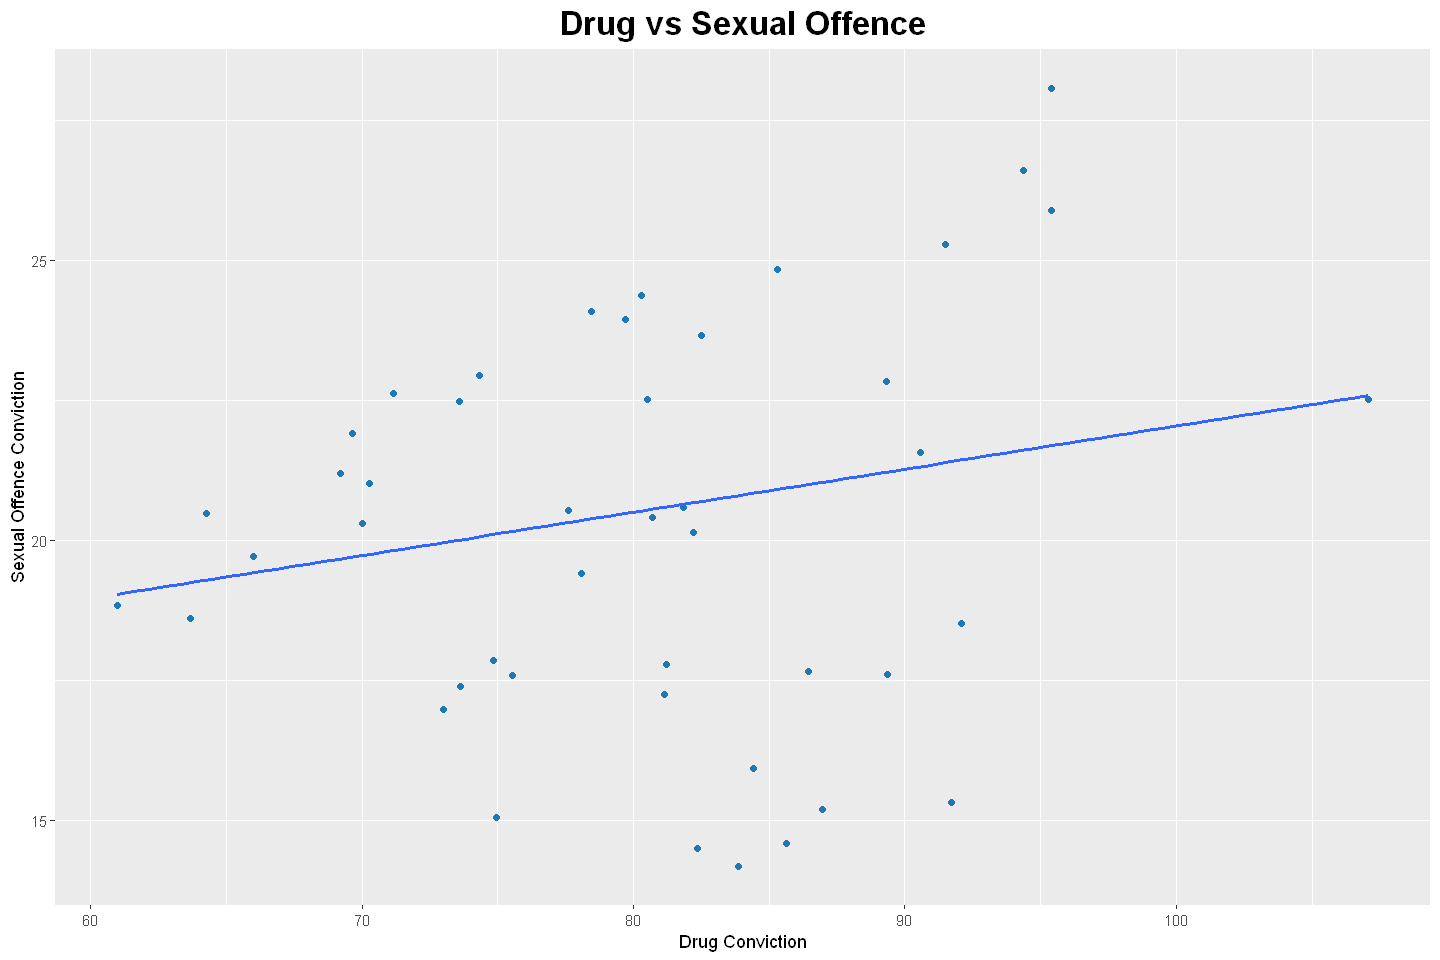

In [413]:
aggre <- aggregate(cbind(sexual_offence_conviction, drug_conviction) ~ date, data = combined_data_df, FUN = mean)
scatter_plot(aggre, "drug_conviction", "sexual_offence_conviction", "Drug vs Sexual Offence", "Drug Conviction", "Sexual Offence Conviction")

In [414]:
grep("conviction", names(combined_data_df), value = TRUE)

[1] "homicide_conviction"               "offence_against_person_conviction"
 [3] "sexual_offence_conviction"         "burglary_conviction"              
 [5] "robbery_conviction"                "theft_conviction"                 
 [7] "fraud_conviction"                  "criminal_damage_conviction"       
 [9] "drug_conviction"                   "public_order_conviction"          
[11] "others_conviction"                 "motoring_conviction"

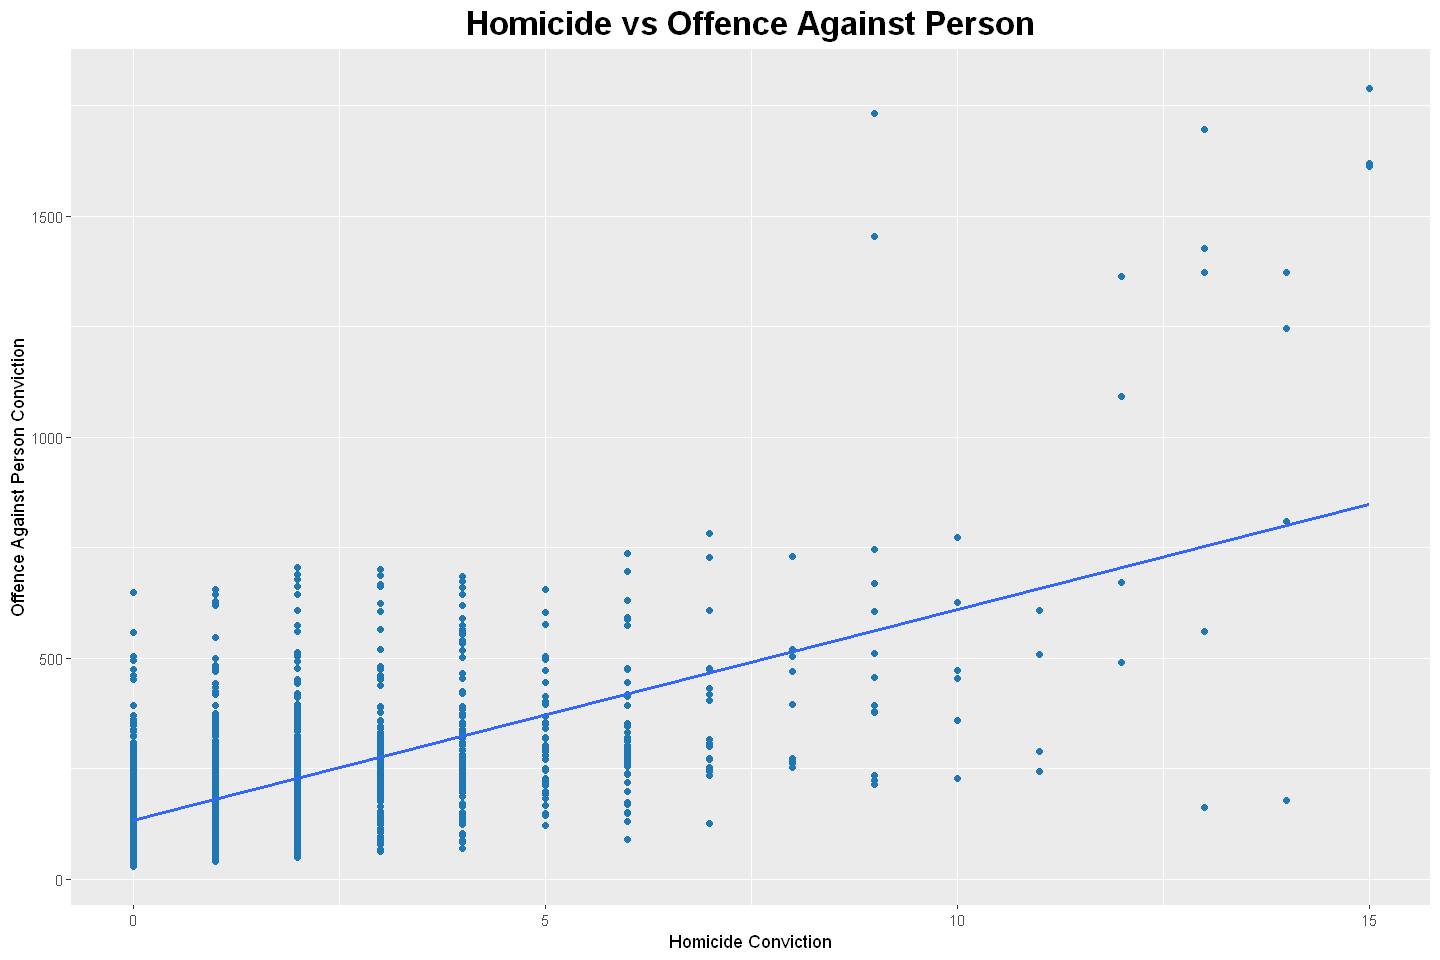

In [415]:
scatter_plot(combined_data_df, "homicide_conviction", "offence_against_person_conviction", "Homicide vs Offence Against Person", "Homicide Conviction", "Offence Against Person Conviction")

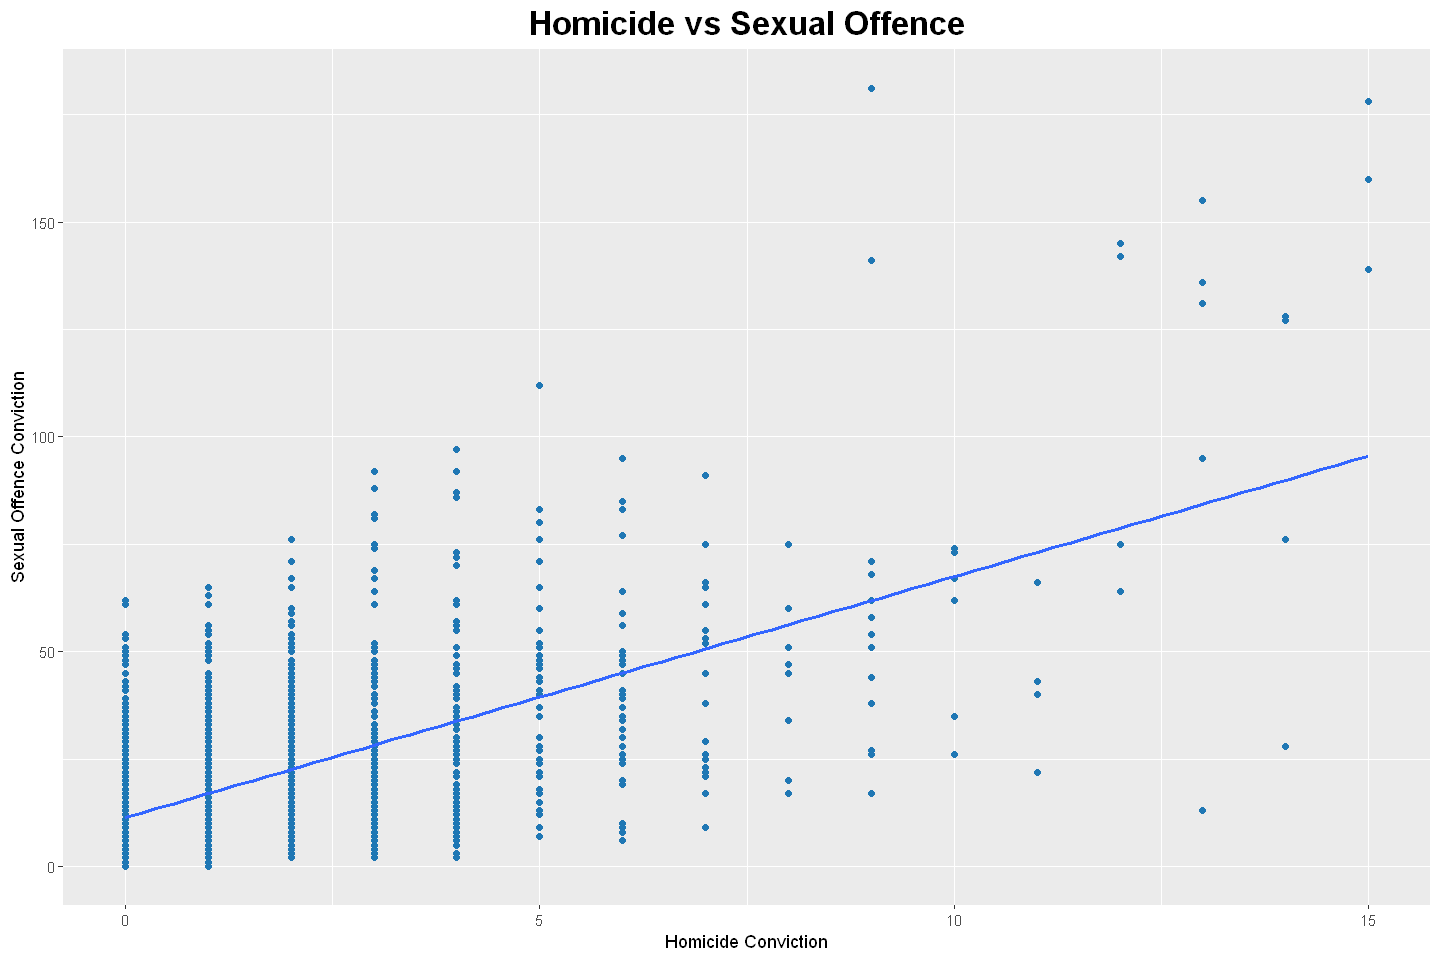

In [416]:
scatter_plot(combined_data_df, "homicide_conviction", "sexual_offence_conviction", "Homicide vs Sexual Offence", "Homicide Conviction", "Sexual Offence Conviction")

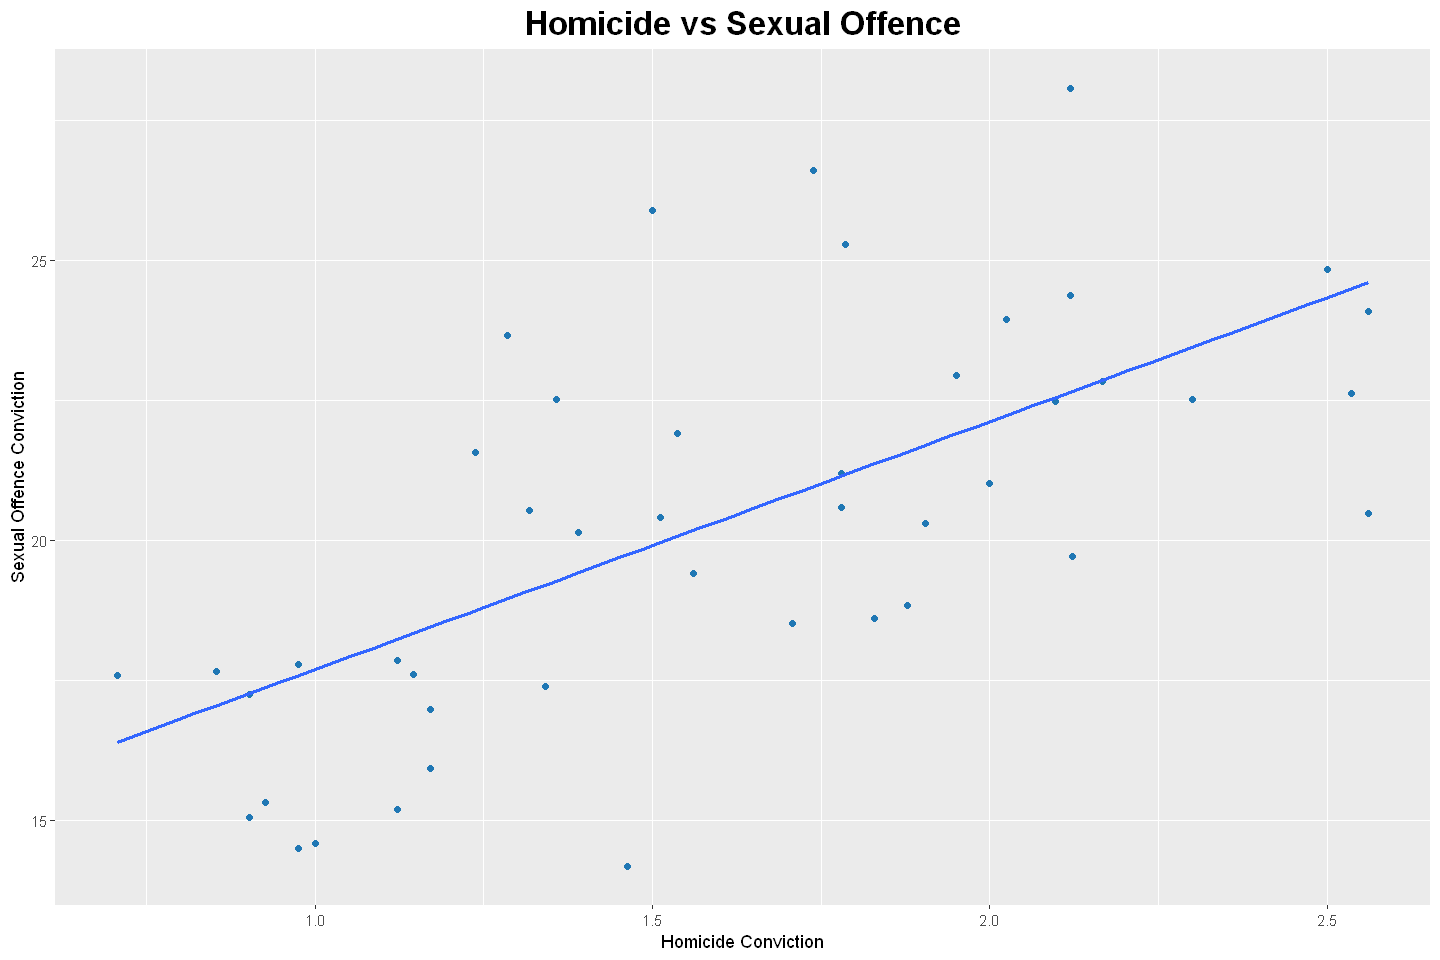

In [417]:
aggre <- aggregate(cbind(homicide_conviction, sexual_offence_conviction) ~ date, data = combined_data_df, FUN = mean)
scatter_plot(aggre, "homicide_conviction", "sexual_offence_conviction", "Homicide vs Sexual Offence", "Homicide Conviction", "Sexual Offence Conviction")

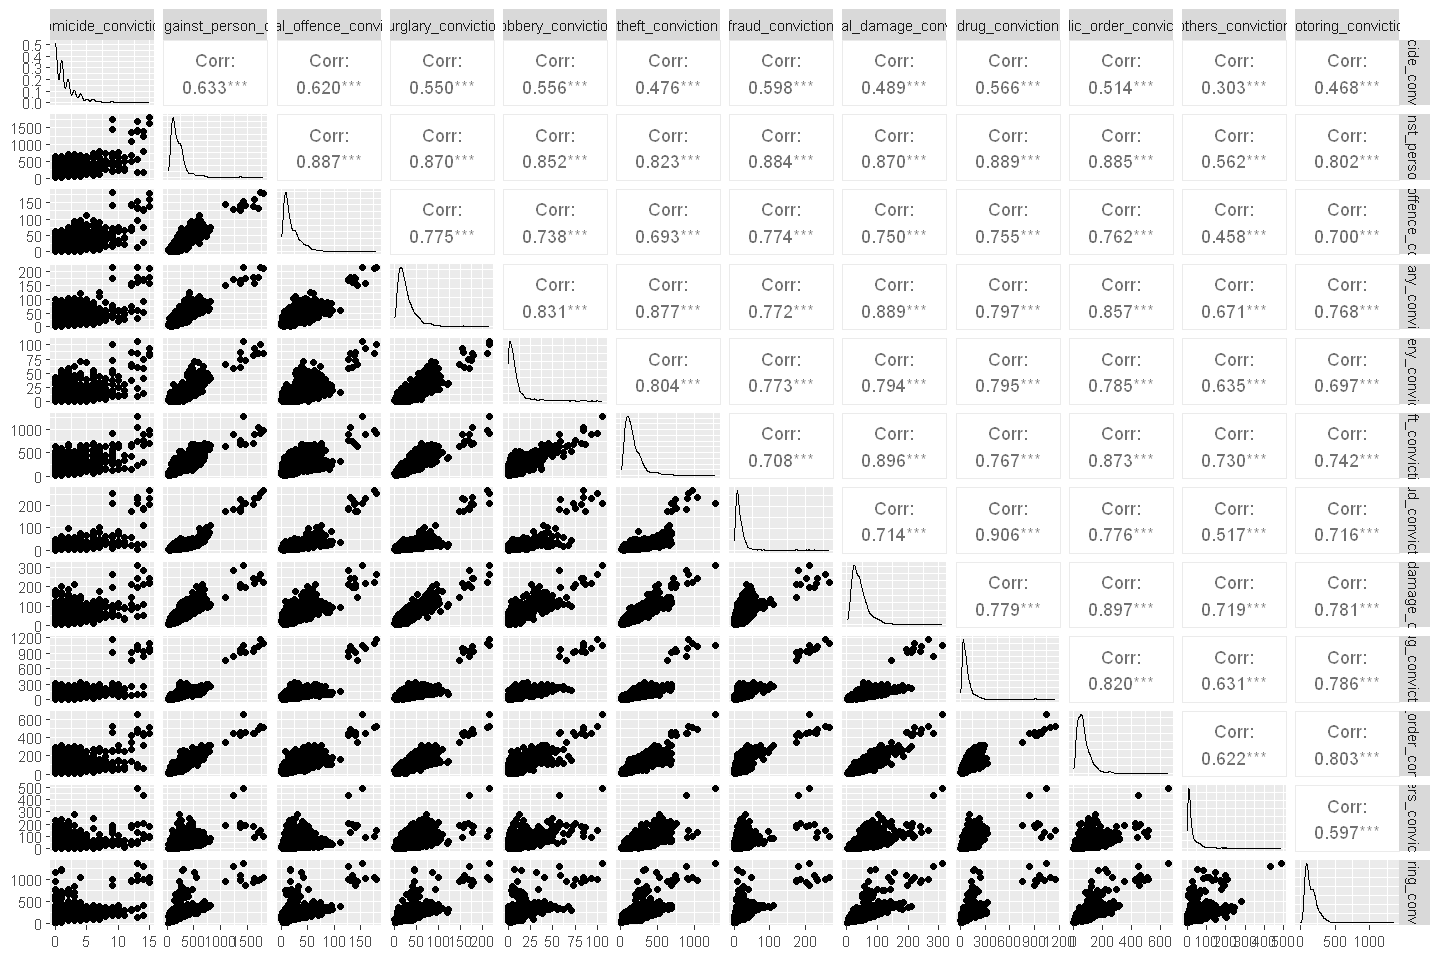

In [418]:
#to show all the conviction columns
convict_cols <- grep("conviction", names(combined_data_df), value = TRUE)
df <- combined_data_df[, convict_cols]

plot <- ggpairs(df)

# Print the scatterplot matrix
print(plot)


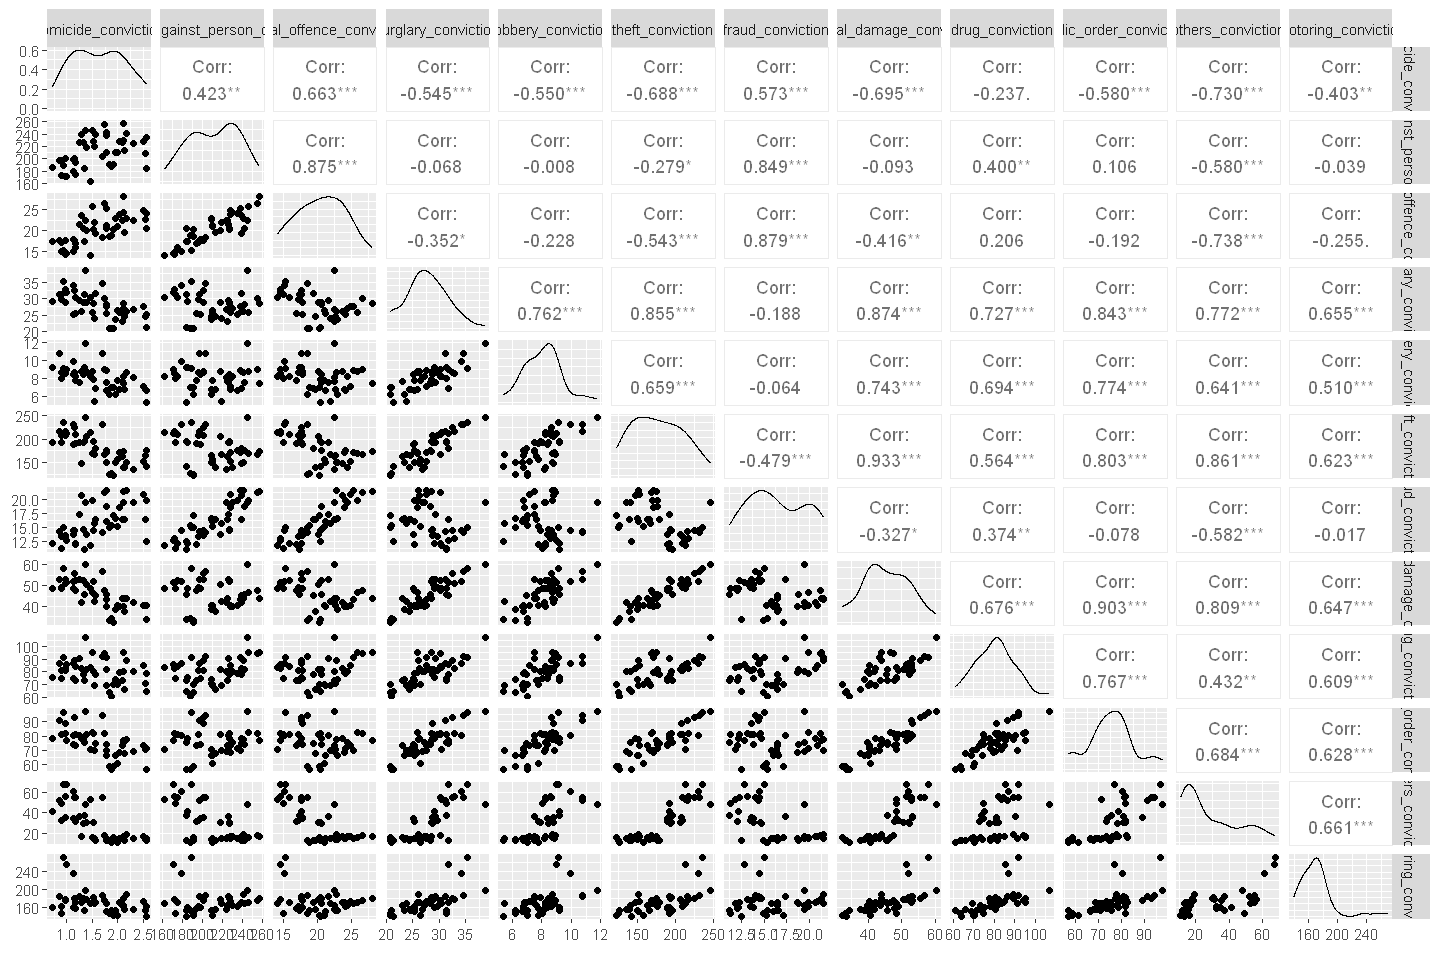

In [419]:
formula <- as.formula(paste("cbind(", paste(convict_cols, collapse = ","), ") ~ date"))

df_mean <- aggregate(formula, data = combined_data_df, FUN = mean)

#drop date
df_mean <- df_mean[, -1]


plot <- ggpairs(df_mean)

# Print the scatterplot matrix
print(plot)

## Correlation Matrix

break this into conviction, unsuccessful and total

keep year in each of them

In [420]:
#let us get only the numeric columns

numeric_cols <- select_if(combined_data_df, is.numeric)

In [421]:
cor_matrix <- cor(numeric_cols, method = "pearson")

# Print the correlation matrix
cor_matrix

,homicide_conviction,homicide_unsuccessful,offence_against_person_conviction,offence_against_person_unsuccessful,sexual_offence_conviction,sexual_offence_unsuccessful,burglary_conviction,burglary_unsuccessful,robbery_conviction,robbery_unsuccessful,⋯,criminal_damage_total,drug_total,public_order_total,others_total,motoring_total,area,year,population,population_density,total_crime
homicide_conviction,1.0000000,0.52004177,0.63323451,0.58616812,0.62048620,0.58475779,0.54951225,0.46644769,0.55649825,0.4673530,⋯,0.49982010,0.56667619,0.52340972,0.30065893,0.49617282,-0.101060871,0.157682212,0.41339801,0.49872748,0.58814189
homicide_unsuccessful,0.5200418,1.00000000,0.57307575,0.59109462,0.51075138,0.51101786,0.49737243,0.45647225,0.49389060,0.4495858,⋯,0.46294801,0.59766068,0.50113065,0.32762485,0.51107586,-0.087474671,0.082881484,0.40639829,0.49944210,0.56893236
offence_against_person_conviction,0.6332345,0.57307575,1.00000000,0.93257223,0.88674319,0.86350511,0.86968769,0.76830147,0.85187777,0.7301039,⋯,0.87685143,0.88903159,0.89575894,0.55761876,0.83513145,-0.102292996,0.069801179,0.64894450,0.74197092,0.95760792
offence_against_person_unsuccessful,0.5861681,0.59109462,0.93257223,1.00000000,0.80821530,0.81832076,0.86013612,0.83413153,0.83381765,0.7743682,⋯,0.86612190,0.93586121,0.88207048,0.63219149,0.84739260,-0.123983025,-0.021676816,0.63376063,0.74835954,0.95918886
sexual_offence_conviction,0.6204862,0.51075138,0.88674319,0.80821530,1.00000000,0.89828737,0.77486808,0.66353947,0.73751656,0.6192206,⋯,0.75569450,0.75559985,0.76923555,0.45337233,0.72980469,-0.087708554,0.113883208,0.57639789,0.61556444,0.83560646
sexual_offence_unsuccessful,0.5847578,0.51101786,0.86350511,0.81832076,0.89828737,1.00000000,0.76487260,0.67798562,0.71621518,0.6290575,⋯,0.74634040,0.76961362,0.77392928,0.47482963,0.73630579,-0.070096773,0.049773431,0.57234620,0.60018965,0.83360165
burglary_conviction,0.5495122,0.49737243,0.86968769,0.86013612,0.77486808,0.76487260,1.00000000,0.78867437,0.83103360,0.7026979,⋯,0.89981635,0.79847649,0.86665089,0.66998017,0.79435563,-0.072211653,-0.117762150,0.64944522,0.65426778,0.91467873
burglary_unsuccessful,0.4664477,0.45647225,0.76830147,0.83413153,0.66353947,0.67798562,0.78867437,1.00000000,0.75464376,0.7178237,⋯,0.77410202,0.77497194,0.76829942,0.60115081,0.69907254,-0.098138190,-0.119301049,0.54863330,0.63666916,0.82588719
robbery_conviction,0.5564982,0.49389060,0.85187777,0.83381765,0.73751656,0.71621518,0.83103360,0.75464376,1.00000000,0.7825370,⋯,0.80270335,0.79689255,0.79788775,0.63237054,0.72510695,-0.194720359,-0.054255328,0.57999817,0.77241587,0.86635461
robbery_unsuccessful,0.4673530,0.44958584,0.73010388,0.77436820,0.61922064,0.62905754,0.70269789,0.71782374,0.78253704,1.0000000,⋯,0.67115638,0.74089434,0.68485576,0.56657065,0.64419809,-0.162875625,-0.049112303,0.50106338,0.70475256,0.76630182


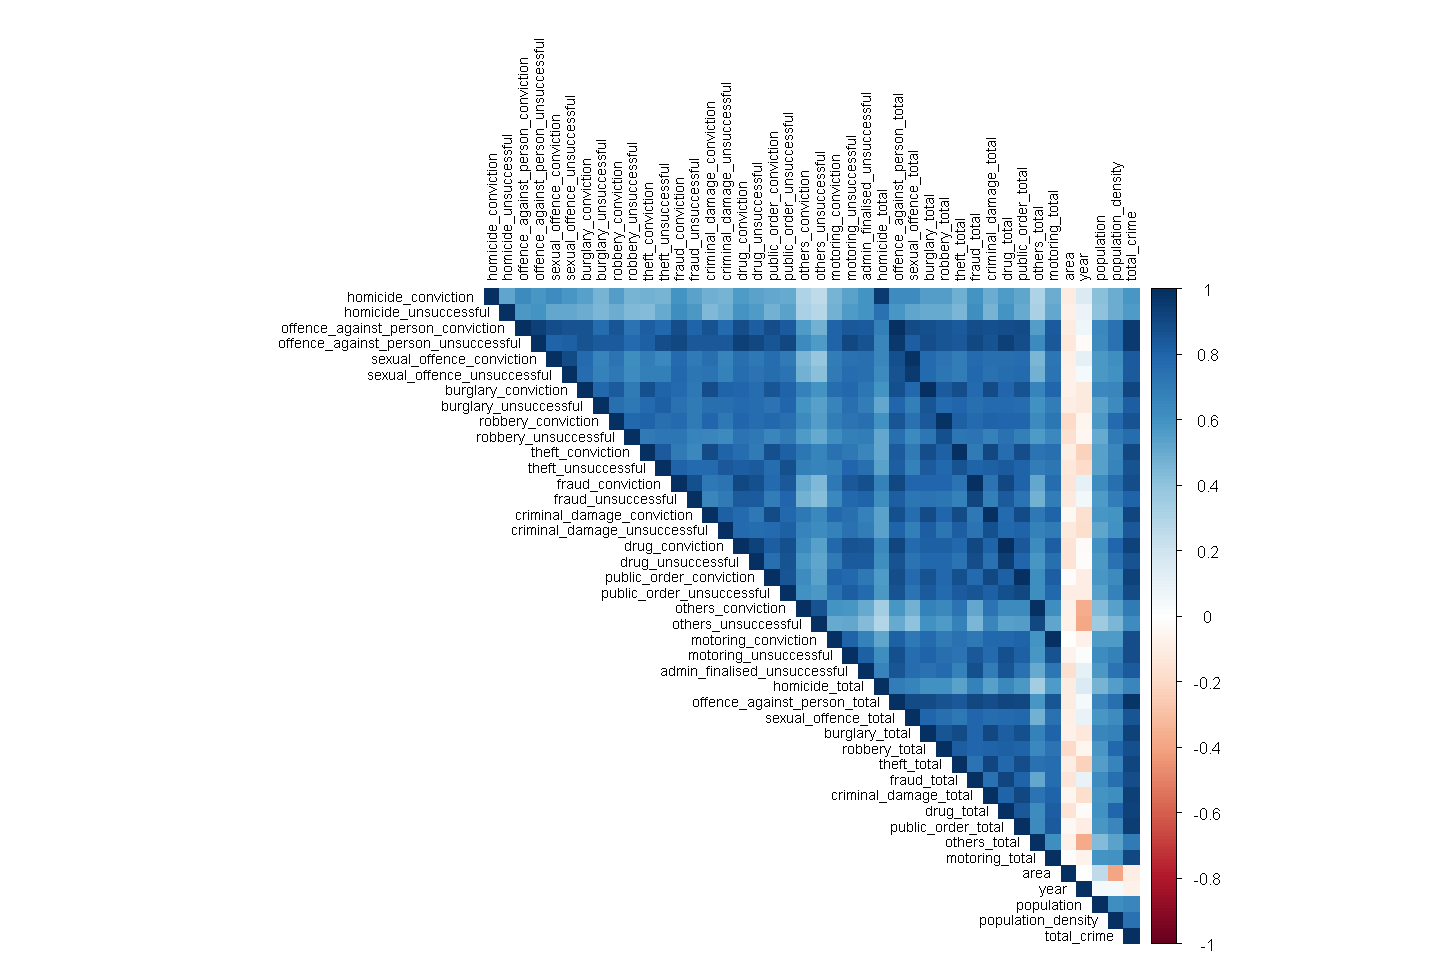

In [422]:
corrplot(cor_matrix, method = "color", type = "upper", tl.cex = 0.7, tl.col = "black")